In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.06
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 1.72510861,  1.62891772,  2.04385398,  1.73129941,  0.9933921 ,
        3.86544005,  2.42055461,  3.39190241,  5.06476798, 10.14169961])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


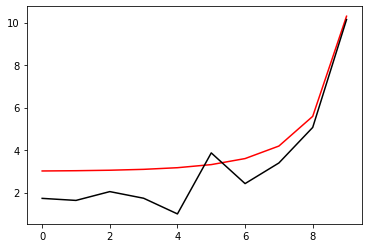

In [4]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F<0.1])):
            Positive.append([phi1[F<0.1][i], pi1[F<0.1][i]])
            if len(Positive)>=batch: break
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F>=0.1])):
            Negative.append([phi1[F>=0.1][i], pi1[F>=0.1][i]])
            if len(Negative)>=batch: break
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    phi=np.array(list1)[:, 0]
    pi=np.array(list1)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, phi, pi)[1]))
    for i in range (len(phi[F<0.1])):
        PP.append([phi[F<0.1][i], pi[F<0.1][i]])
    for i in range (len(phi[F>=0.1])):
        NN.append([phi[F>=0.1][i], pi[F>=0.1][i]])
    return PP, NN

In [7]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(h_real))
    Negative.insert(i, NN_func_n(h_real))

In [8]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

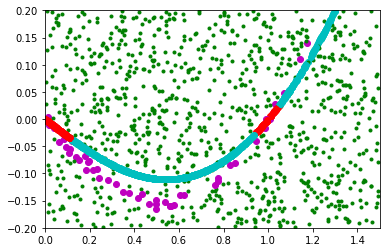

In [9]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [10]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [11]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(0.029671402966125044, shape=(), dtype=float64)
tf.Tensor(0.03710179095824552, shape=(), dtype=float64)
tf.Tensor(0.03422434785735298, shape=(), dtype=float64)
tf.Tensor(0.004241049151261451, shape=(), dtype=float64)
tf.Tensor(0.02576325132195823, shape=(), dtype=float64)
tf.Tensor(0.02441428097868351, shape=(), dtype=float64)
tf.Tensor(0.05668466906211547, shape=(), dtype=float64)
tf.Tensor(0.025723323633361994, shape=(), dtype=float64)
tf.Tensor(0.01837852206503333, shape=(), dtype=float64)
tf.Tensor(0.03388513602004184, shape=(), dtype=float64)
tf.Tensor(0.9557788589056213, shape=(), dtype=float64)
tf.Tensor(0.9978908544933938, shape=(), dtype=float64)
tf.Tensor(0.9684670204354894, shape=(), dtype=float64)
tf.Tensor(0.9785941837635285, shape=(), dtype=float64)
tf.Tensor(0.9301039683075518, shape=(), dtype=float64)
tf.Tensor(1.0378665347587417, shape=(), dtype=float64)
tf.Tensor(0.9055745472604929, shape=(), dtype=float64)
tf.Tensor(0.9485239097508148, shape=(), dtype=float6

0 0.9309907840142134
[ 1.82510529  1.7289168   1.94385562  1.83119057  1.09339123  3.76544108
  2.52054775  3.2919096   4.96477522 10.04176039]


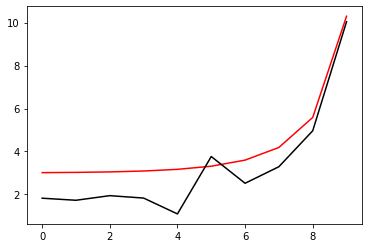

1100 0.07278104754015388
[3.16565873 3.03289519 3.08909533 2.90959958 2.26857679 3.44230901
 3.33940226 2.58505743 3.76765346 8.93165952]


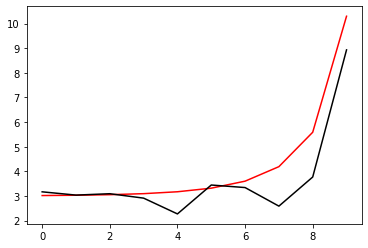

2200 0.04565234131270152
[3.07721214 3.03762748 2.98463523 2.82656246 2.56483472 3.03262143
 3.20799096 3.09252128 3.84635749 7.90584775]


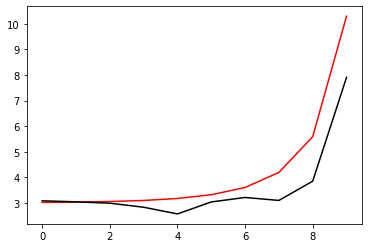

3300 0.001965658122742468
[3.0314383  3.00727865 2.94834553 2.85287659 2.76217011 2.89076335
 3.09062354 3.34878108 3.94076251 6.99322269]


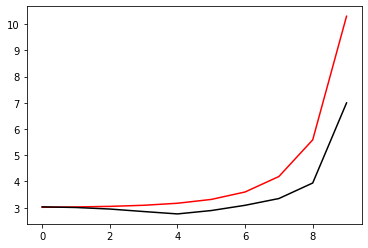

4400 0.04891807272016321
[3.00380238 2.98910648 2.95507699 2.91185766 2.88294108 2.9353922
 3.09768146 3.43981736 4.07295404 6.17398123]


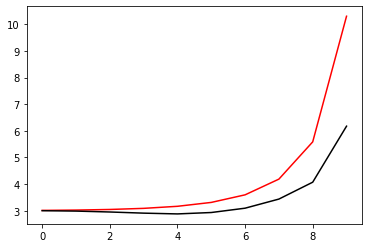

5500 0.030576873175881956
[3.03029459 3.03759726 3.03983818 3.04153101 3.06119632 3.14345449
 3.32712225 3.63905048 4.19984484 5.4651954 ]


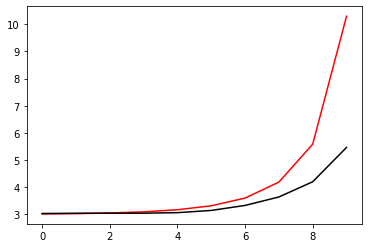

6600 0.051336135192935395
[2.95617973 2.96606583 2.98932346 3.03069827 3.10245522 3.2378344
 3.48129784 3.90261503 4.56093245 4.97215779]


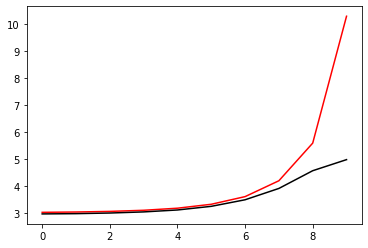

7700 0.019531482456137002
[2.9334774  2.92328147 2.92234057 2.94249696 2.99560511 3.11401297
 3.33017933 3.69300993 4.20503483 4.54483928]


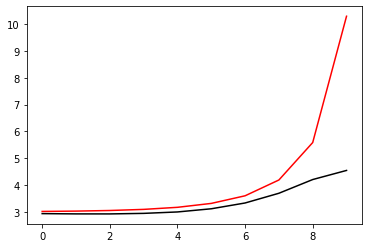

8800 0.019533988432285425
[2.98868108 2.98706612 2.99027163 3.0108214  3.06546855 3.18097114
 3.39559246 3.76169343 4.29414531 4.31565781]


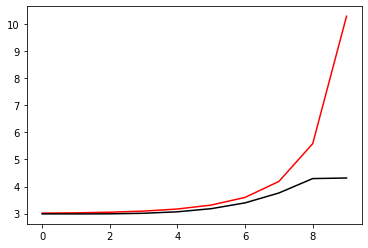

9900 0.03074721144573874
[3.04453922 3.05147981 3.06787219 3.10130506 3.1671254  3.2914825
 3.5163081  3.90221042 4.47855366 4.44434887]


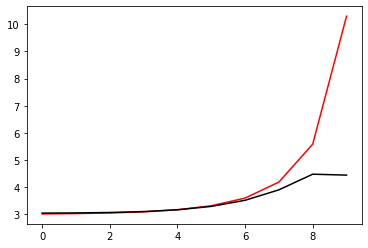

11000 0.06773166855408008
[3.1152692  3.13050385 3.16344425 3.21975503 3.31100376 3.46029744
 3.71024366 4.12972533 4.76554348 4.69954748]


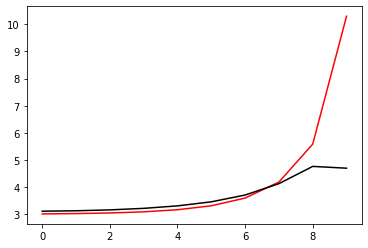

12100 0.049308245269699326
[2.86841758 2.89325489 2.9380121  3.00746914 3.11227463 3.27261555
 3.52653121 3.94041803 4.57393236 4.71066662]


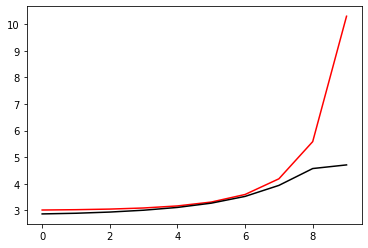

13200 0.03476249291204493
[2.95369833 2.96710613 2.99723398 3.0524187  3.14430098 3.29276996
 3.53400553 3.93164732 4.55120883 4.49344438]


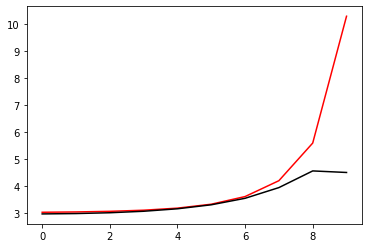

14300 0.0009896418300817057
[2.9185185  2.90423333 2.90982849 2.94610603 3.02633926 3.17281779
 3.4201459  3.80152428 4.31324656 4.36329044]


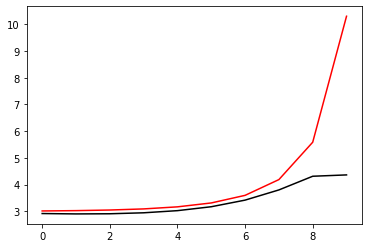

15400 0.042295123203543054
[2.98893466 2.98288625 2.98677766 3.01828489 3.09414022 3.237302
 3.48270437 3.86975936 4.39904615 4.3720873 ]


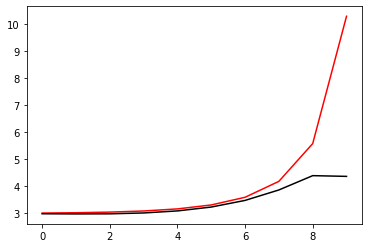

16500 0.021239301892585664
[3.05417772 3.0603682  3.0762241  3.11434315 3.19324155 3.33850429
 3.58732275 3.98735262 4.54830476 4.55273591]


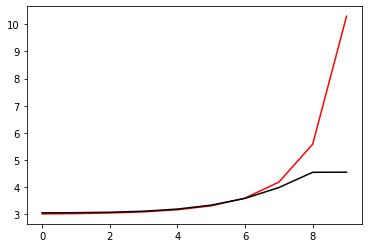

17600 0.06230913118318499
[3.04720766 3.0613004  3.0935957  3.1520778  3.2524346  3.42197056
 3.70439639 4.16116677 4.81773346 4.70752161]


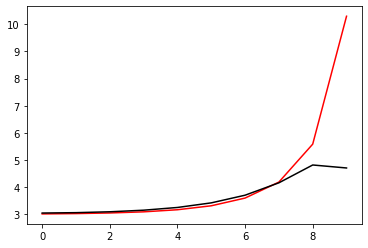

18700 0.02581827980274638
[3.00741063 3.02331498 3.05927073 3.12050603 3.21878536 3.37645517
 3.63313597 4.05332723 4.68412956 4.70912766]


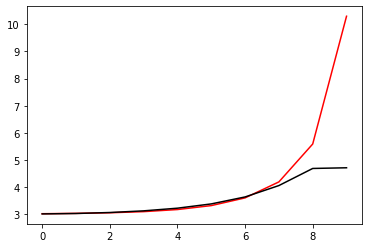

19800 0.016225004698643623
[2.94216629 2.96330252 3.01119277 3.09393468 3.22604174 3.43495629
 3.76940663 4.30496233 5.07920854 5.00283454]


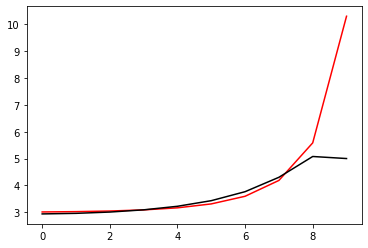

20900 0.03157878674488798
[3.00618489 3.02738157 3.07243329 3.14787829 3.2669202  3.45243015
 3.74365292 4.21021659 4.93897437 5.0074556 ]


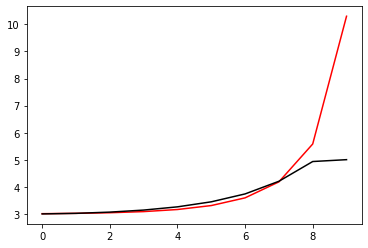

22000 0.030359228838569906
[3.01623236 3.00933785 3.02697315 3.07868355 3.17806969 3.3501479
 3.63862163 4.08820171 4.62278538 4.74007353]


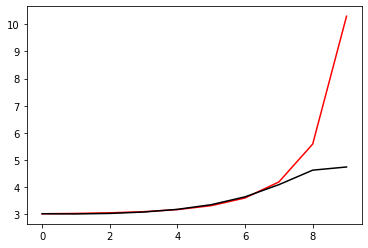

23100 0.036672613087792884
[2.99131101 3.00123534 3.02866891 3.08759679 3.19588243 3.38032664
 3.68418039 4.15962596 4.76010262 4.71598031]


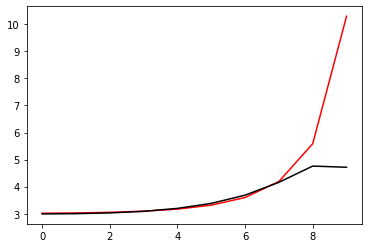

24200 0.03161411838801647
[3.00688675 3.02336134 3.06081526 3.12881042 3.24455802 3.43640158
 3.74947967 4.24489741 4.9131101  4.94349788]


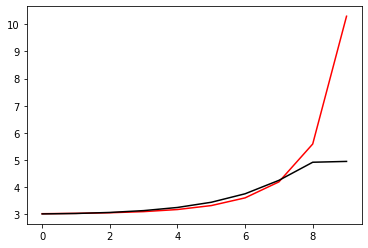

25300 0.0018568174983409095
[2.95695271 2.977764   3.02128944 3.09710667 3.22176421 3.42301872
 3.74760547 4.26643385 5.0083029  5.04290516]


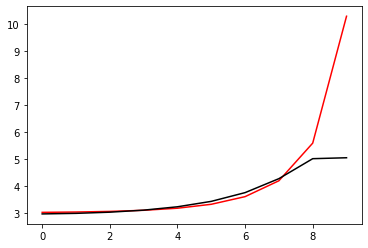

26400 0.05025215879722183
[2.8584795  2.87532956 2.91763768 2.99184198 3.11087774 3.29866046
 3.59780453 4.07829046 4.78742604 4.82687213]


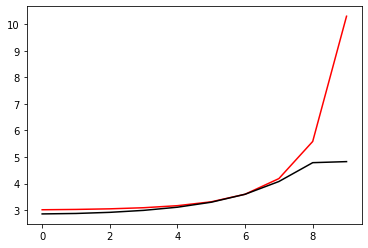

27500 0.021695432231133
[3.01351959 3.03227951 3.07331269 3.14565945 3.26417285 3.45351487
 3.7567252  4.24513697 4.9736037  4.98058799]


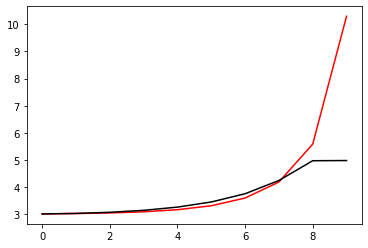

28600 0.052681155057108554
[2.95620872 2.97320875 3.01620911 3.09503547 3.22648039 3.43981058
 3.78578519 4.34753361 5.19166291 5.14580933]


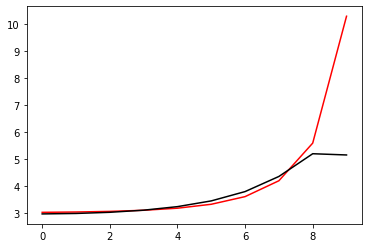

29700 0.01892885063903275
[2.91251564 2.89939486 2.90440342 2.94590156 3.04093103 3.21480748
 3.5056932  3.96472532 4.67788914 4.67278776]


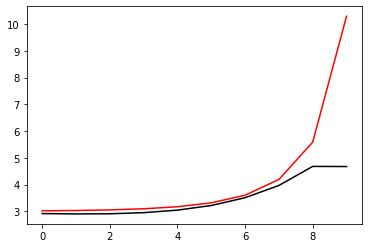

30800 0.018335483599779257
[2.98210826 2.98103144 2.98936068 3.02816036 3.11975026 3.29212614
 3.58655714 4.06248557 4.79731232 4.78574003]


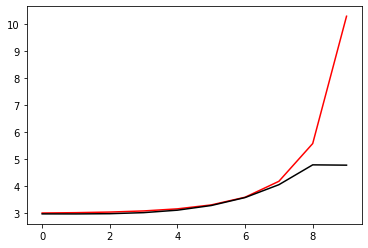

31900 0.023668628095292757
[2.93735988 2.94683383 2.97167725 3.02494967 3.12888486 3.31657172
 3.63736559 4.16409959 4.96866195 4.98862349]


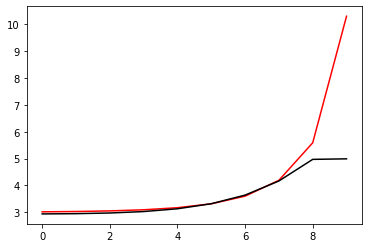

33000 0.06752834271521002
[3.09361183 3.1109918  3.14857911 3.21467018 3.32671405 3.51582445
 3.83456343 4.36624611 5.18531001 5.12431531]


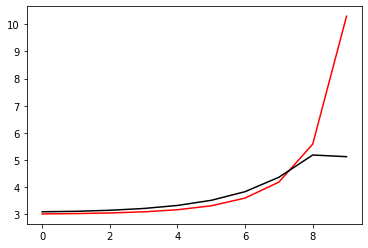

34100 0.03425309987192799
[2.99415195 3.01610356 3.05989535 3.13552443 3.25906486 3.46011663
 3.7913454  4.3368874  5.16280768 4.97558339]


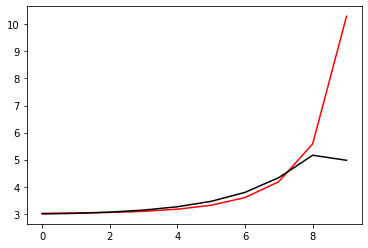

35200 0.0319449527128282
[2.96710275 2.97638547 3.00473613 3.06545839 3.17598707 3.36487926
 3.68300705 4.22397402 5.0975964  5.10034846]


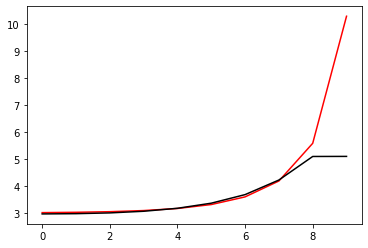

36300 0.0014066085911169797
[2.95172007 2.97639252 3.02205191 3.09563258 3.21034414 3.3872622
 3.65563874 4.05570669 4.70206903 4.87821593]


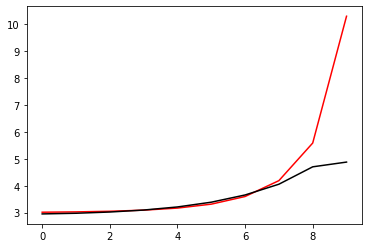

37400 0.02354001234028956
[2.9878051  3.01008699 3.056708   3.13366003 3.25429056 3.44161317
 3.73147345 4.17248407 4.81967592 4.78665229]


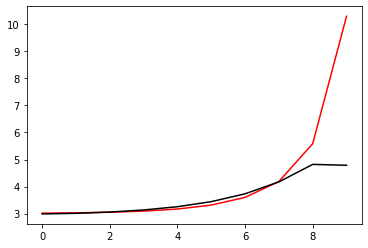

38500 0.02176746470021003
[3.00761289 3.02786588 3.07365574 3.15261094 3.27861443 3.47662032
 3.7888728  4.27443455 4.95217507 4.96996195]


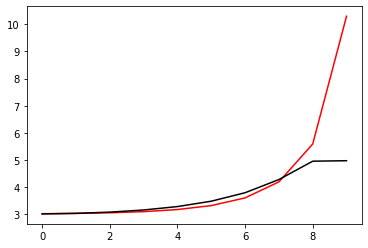

39600 0.053033273125098215
[2.95600597 2.9764683  3.02424564 3.10883795 3.24655975 3.4668217
 3.82182441 4.39091838 5.17869209 5.12812433]


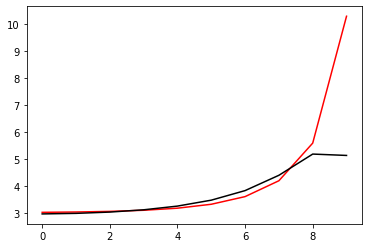

40700 0.01783212735576025
[2.86821481 2.8870233  2.9340334  3.02139977 3.16896355 3.41155641
 3.81214416 4.47154626 5.41357177 5.39858322]


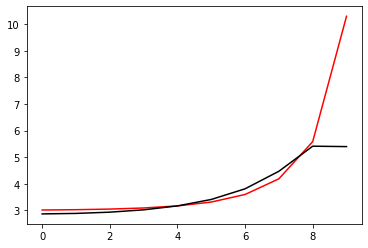

41800 0.01501839130298742
[3.03469745 3.05007273 3.08722257 3.15801447 3.28158695 3.48897881
 3.83226415 4.39642163 5.25123537 5.20384423]


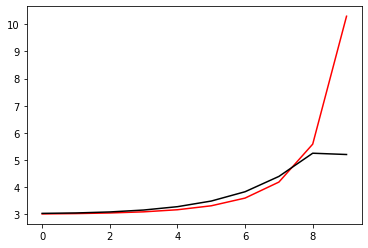

42900 0.023997443439620295
[2.86549021 2.88253019 2.92865689 3.01423051 3.15830158 3.39511379
 3.7843844  4.42261706 5.38453486 5.3464402 ]


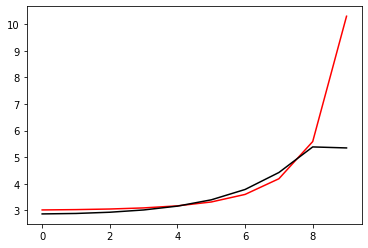

44000 0.03248015114427649
[2.90788792 2.92076949 2.95706556 3.03071536 3.16239819 3.38699104
 3.76637045 4.40687947 5.40196736 5.44569475]


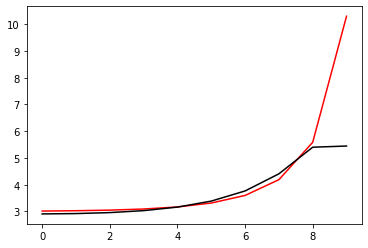

45100 0.23969760217026911
[2.66060453 2.68848029 2.74382151 2.83734053 2.9875849  3.22702154
 3.61283135 4.24311192 5.21396332 5.69121301]


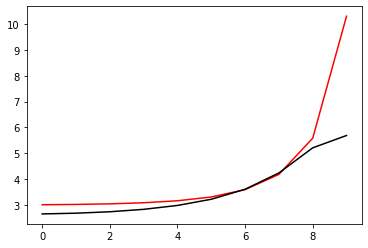

46200 0.03441984389554817
[2.90318259 2.92326457 2.96937476 3.0499559  3.18025708 3.38682876
 3.71615344 4.25039756 5.08677115 5.0678472 ]


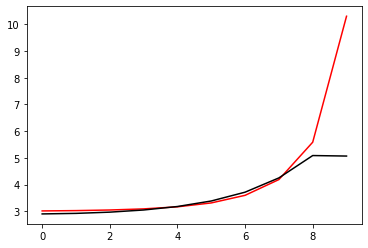

47300 0.002173190098201958
[2.93390891 2.95464312 3.00200331 3.08530259 3.22053003 3.43555251
 3.7791154  4.33358594 5.18310241 5.1927188 ]


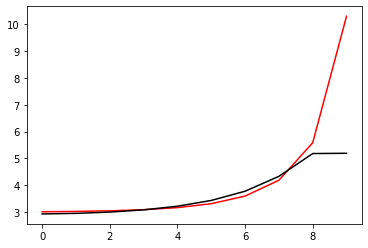

48400 0.02272904966840943
[2.97756992 2.99707346 3.04362365 3.12754034 3.26582624 3.4877642
 3.84440206 4.41977099 5.2885171  5.24656711]


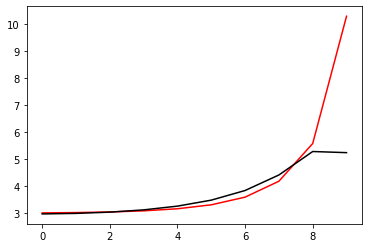

49500 0.02250685043936272
[2.98470877 3.00417603 3.05109821 3.13669448 3.27936622 3.5105385
 3.88484509 4.49255894 5.4073706  5.43419592]


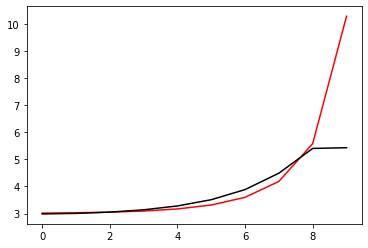

50600 0.052875114785633746
[2.90024358 2.92009346 2.96703256 3.05412977 3.20206761 3.44600094
 3.84813877 4.51285661 5.52318172 5.46678554]


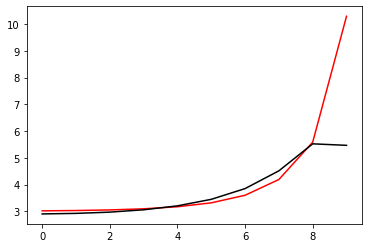

51700 0.018218193129110345
[2.91149832 2.89129611 2.89405096 2.93780851 3.04221171 3.23927214
 3.58349644 4.16253626 5.0505244  5.04676939]


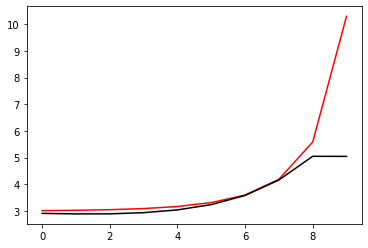

52800 0.01729048298643106
[3.0135519  2.99853653 2.99599737 3.03164391 3.12835952 3.31860722
 3.65687466 4.23143101 5.11739009 5.10633307]


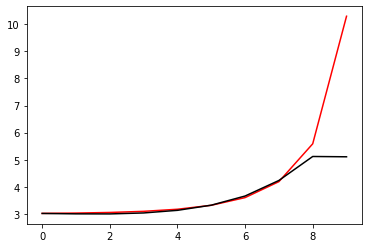

53900 0.027899505648039682
[2.97987275 2.97946281 2.98902177 3.03029598 3.130391   3.32555277
 3.67334267 4.26659844 5.18549344 5.21354786]


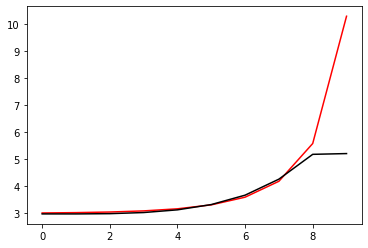

55000 0.03206849899786373
[2.94143817 2.95040692 2.97414002 3.02715497 3.13494856 3.33730503
 3.69742558 4.31582197 5.28092266 5.26778   ]


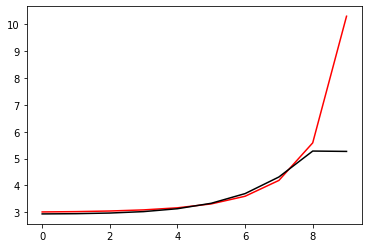

56100 0.034624192901934095
[2.99895987 3.00105446 3.02192872 3.07585159 3.18389015 3.3833461
 3.73909464 4.35956344 5.34903862 5.35173815]


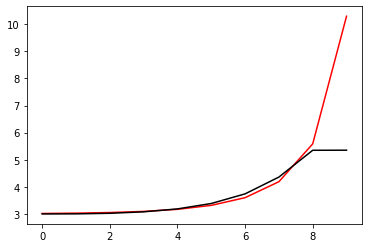

57200 0.04023409665727393
[2.90464371 2.92186082 2.95522891 3.01086914 3.10301348 3.25596201
 3.5114847  3.94879056 4.70672883 4.73809159]


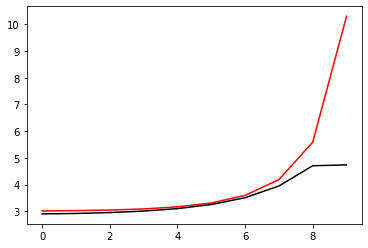

58300 0.0015502847773225489
[2.96461587 2.98331518 3.02126395 3.08576003 3.1912713  3.36412581
 3.65183789 4.13886955 4.92822575 4.95451119]


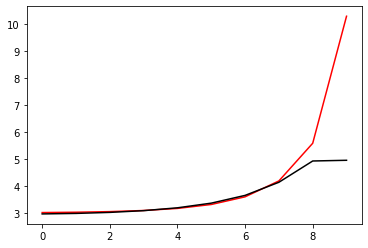

59400 0.022187384072182244
[3.0019139  3.02304052 3.06852851 3.14651492 3.27338938 3.478772
 3.8161676  4.37808207 5.25377781 5.25708943]


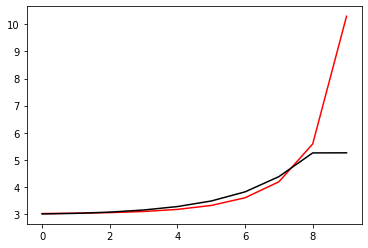

60500 0.02233970945347764
[3.03203944 3.0517971  3.09498156 3.17163977 3.3006937  3.51416104
 3.86821078 4.46109297 5.39541219 5.45950949]


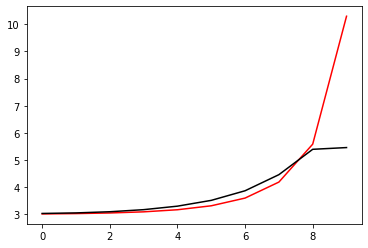

61600 0.061017716385962
[3.04334075 3.05772245 3.09245718 3.15916582 3.27629181 3.47411947
 3.80583486 4.36368262 5.24397354 5.19794466]


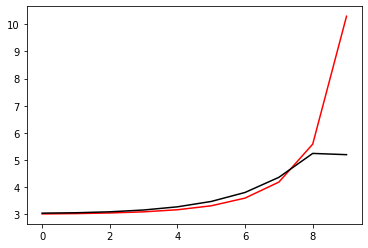

62700 0.020924883549992456
[2.96266073 2.9724188  3.0014388  3.06045731 3.165845   3.34614178
 3.65240355 4.17441723 5.0087956  5.00927098]


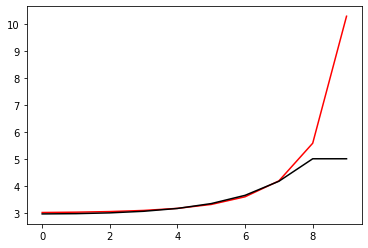

63800 0.01524003382098272
[2.93057623 2.94877002 2.99046744 3.06664573 3.19658335 3.4139362
 3.77769356 4.38715178 5.33621621 5.27463349]


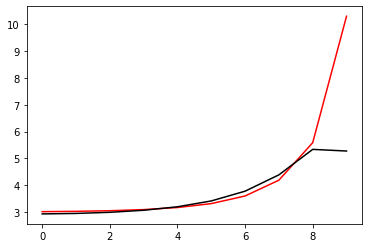

64900 0.021763333336645197
[2.93035816 2.9192159  2.92245636 2.95920837 3.04822619 3.21774153
 3.51202001 3.99365122 4.76591038 4.76443912]


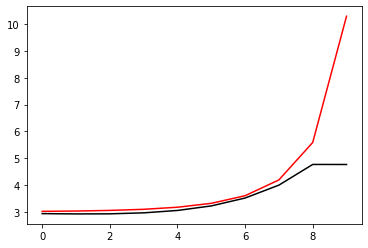

66000 0.031454263233125244
[2.96152783 2.96546049 2.98133525 3.02515503 3.11915471 3.29433148
 3.59815719 4.10262131 4.90090539 4.91056069]


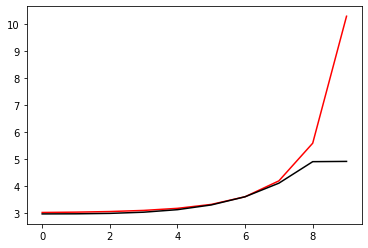

67100 0.03468921828661724
[3.01535624 3.03554527 3.07133545 3.13296431 3.23979149 3.42408143
 3.73802666 4.26380643 5.08856448 5.12475186]


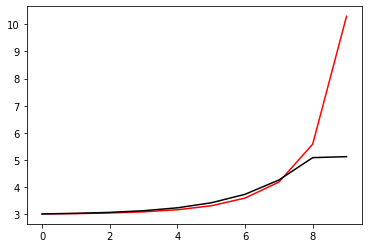

68200 0.032114725319269136
[3.0332903  3.05464592 3.10014164 3.17806825 3.30467571 3.50964999
 3.84680864 4.40731497 5.27989403 5.34947562]


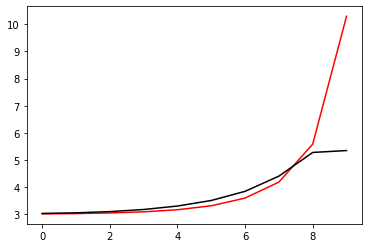

69300 0.007483532382104666
[2.8510387  2.86350819 2.89815434 2.96223615 3.06920218 3.24372425
 3.53171806 4.01777092 4.79663239 4.89994958]


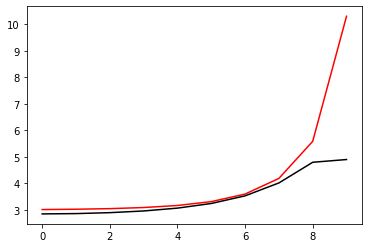

70400 0.036871938143673795
[2.96302579 2.96770454 2.9918913  3.04686573 3.14648348 3.31509779
 3.59789752 4.07745756 4.84588507 4.82256412]


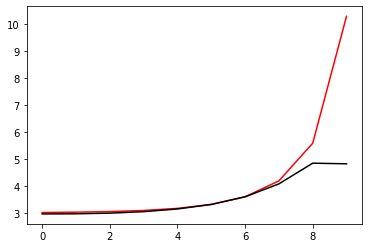

71500 0.021663429274189287
[3.0160256  3.02649004 3.05473612 3.11242986 3.215613   3.38993822
 3.68135581 4.17201278 4.95082761 4.96391485]


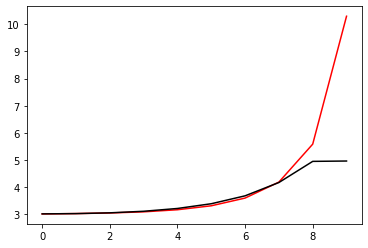

72600 0.05754425108684377
[3.01061896 3.02444706 3.05824542 3.12237959 3.23409308 3.42211336
 3.73630922 4.26259973 5.08843205 5.03279523]


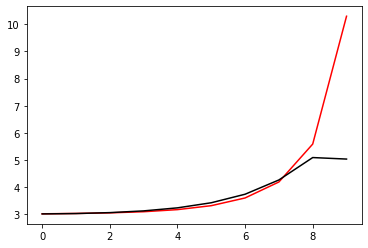

73700 0.031777067026376046
[3.02405295 3.04402039 3.08895635 3.16802258 3.2974946  3.50702617
 3.84981847 4.41643095 5.29369608 5.34824424]


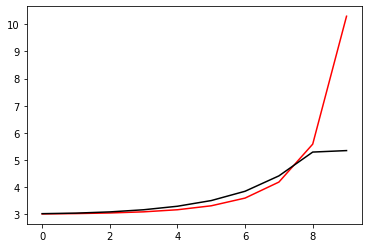

74800 0.017161886373196336
[2.99761975 3.01163308 3.04669116 3.11169328 3.22030341 3.3965859
 3.68397384 4.15921678 4.90631853 4.88008919]


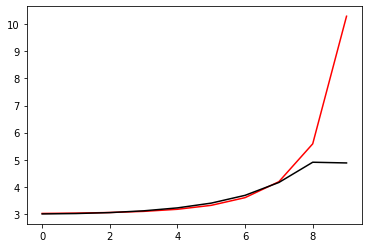

75900 0.02233625769230696
[2.89250373 2.91089173 2.95236312 3.02578476 3.14725981 3.3451256
 3.67082776 4.21302279 5.04963509 5.04912204]


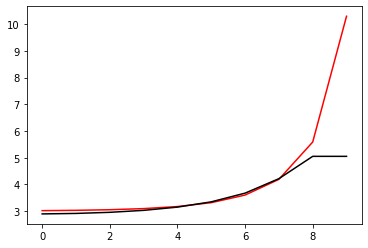

77000 0.03218176809922562
[2.93026891 2.94315794 2.98171365 3.05750372 3.18877701 3.40766033
 3.77154698 4.37648477 5.29717607 5.32647227]


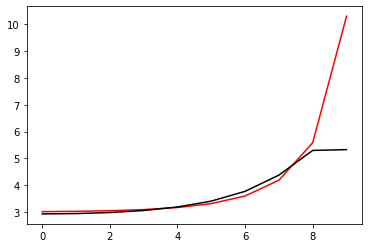

78100 0.03706436256802805
[2.92305117 2.9347838  2.96880417 3.0401928  3.16915715 3.38970167
 3.76264416 4.39821781 5.4009601  5.39166773]


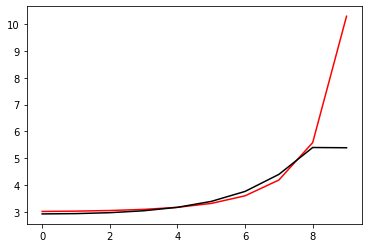

79200 0.03309390833572929
[2.98013282 3.00420705 3.0573133  3.15128438 3.3082832  3.56497835
 3.98531599 4.67635637 5.72964156 5.77695926]


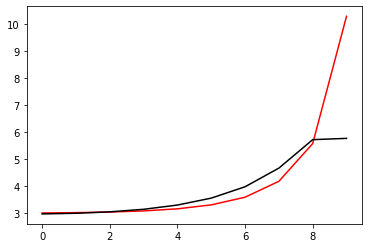

80300 0.006167521387993431
[2.88368409 2.86523798 2.87071714 2.91956123 3.03356332 3.24817102
 3.61704022 4.19544953 5.10653515 5.1256337 ]


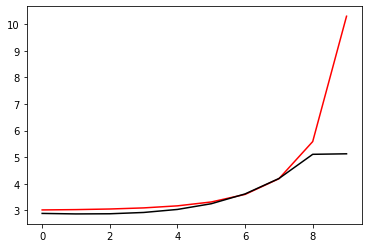

81400 0.03520394460214296
[2.97405678 2.96373226 2.96578933 3.0064553  3.11164456 3.31700265
 3.6762389  4.25520568 5.16440594 5.1344922 ]


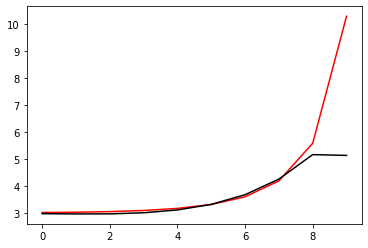

82500 0.021999942669039325
[3.03475535 3.03765708 3.05276688 3.09922744 3.20489908 3.40826937
 3.76584962 4.35681572 5.28014556 5.31214141]


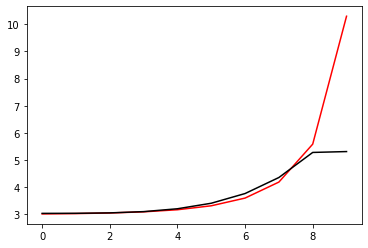

83600 0.05551892494635716
[3.0028762  3.01464795 3.04448593 3.10593079 3.22309863 3.43592865
 3.80782718 4.43482203 5.41185649 5.35562294]


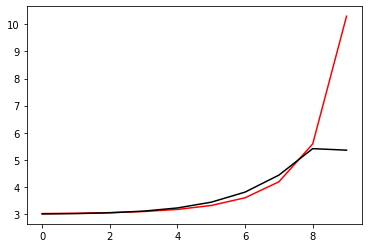

84700 0.01825498296776459
[2.91015445 2.90451283 2.91068999 2.94710259 3.03595579 3.21317783
 3.53971369 4.11719539 5.05868876 5.04414932]


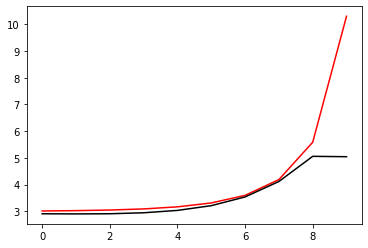

85800 0.014533191705614502
[2.92608116 2.93241517 2.94998716 2.99440003 3.09048375 3.27695333
 3.61894253 4.22591195 5.21222874 5.16795812]


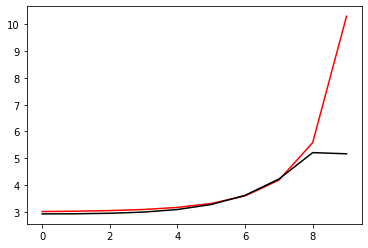

86900 0.023069046344587785
[2.88774829 2.89812448 2.92975675 2.9947769  3.11535648 3.33144984
 3.71401347 4.38237702 5.45192967 5.45576182]


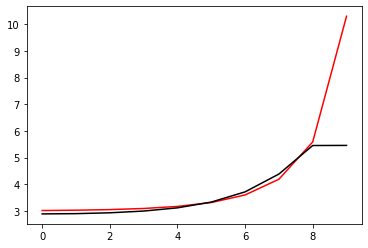

88000 0.0320979861531041
[2.95331089 2.96191671 2.98818028 3.0467847  3.16008463 3.36608619
 3.73294213 4.38279018 5.44846365 5.4751617 ]


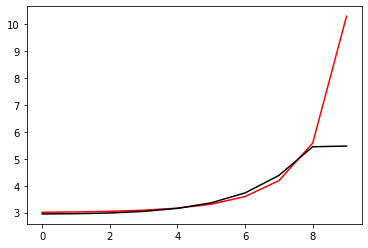

89100 0.17755603361012234
[2.69670483 2.71287653 2.75251145 2.8308198  2.96806798 3.19838778
 3.57679661 4.20258197 5.24962294 5.63022949]


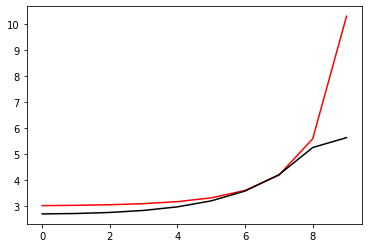

90200 0.03173266701797545
[3.01716313 3.04297611 3.09238052 3.17419988 3.30505291 3.50847302
 3.81169002 4.25336668 4.95151163 4.94559094]


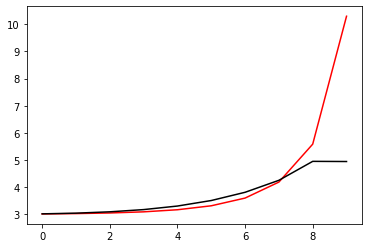

91300 0.0020114912313667897
[2.97065615 2.99788309 3.05214599 3.13971856 3.27511028 3.48317628
 3.80720576 4.32482184 5.05133899 5.070035  ]


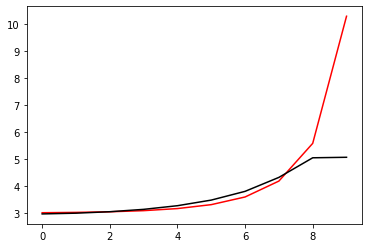

92400 0.02245339511862657
[2.98552579 3.00767426 3.05872234 3.14791269 3.29178623 3.52153665
 3.89349873 4.48732922 5.28162426 5.27965549]


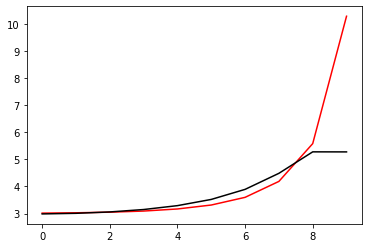

93500 0.03183210457684385
[2.92491926 2.90861094 2.91547175 2.96318507 3.07018612 3.26859881
 3.61165539 4.11590318 4.82217031 4.81814418]


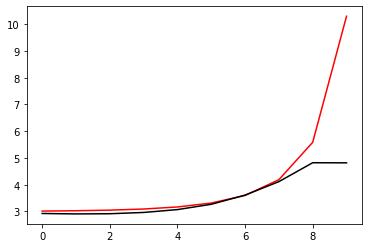

94600 0.05236193699521912
[2.9900731  2.98842993 3.00001742 3.04695047 3.15283257 3.35058379
 3.69004846 4.20910741 4.93923514 4.94124417]


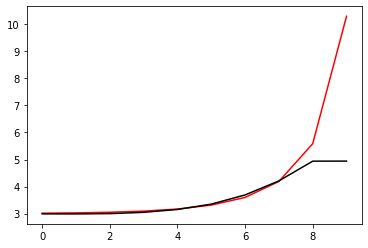

95700 0.02048580687207404
[2.92903524 2.94697751 2.97993772 3.04334666 3.16188994 3.37182595
 3.72567873 4.28442257 5.07927478 5.07749464]


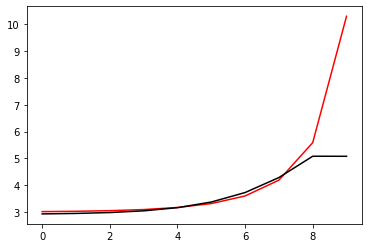

96800 0.015395898932095538
[2.94595769 2.96506684 3.00818181 3.08647042 3.22022299 3.44476601
 3.81770536 4.42075987 5.29720514 5.23391925]


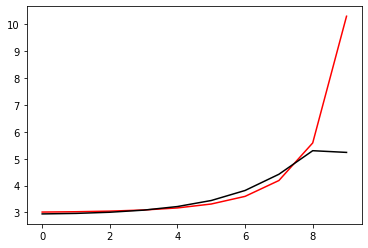

97900 0.03139926277203719
[3.02350272 3.0211129  3.04257422 3.09724339 3.20238438 3.38622601
 3.69354533 4.1885908  4.94859208 5.32017154]


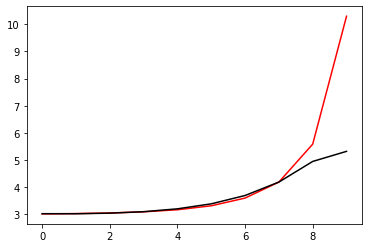

99000 0.03191050259900149
[2.90997957 2.9201733  2.94998786 3.01320842 3.12954358 3.3294416
 3.66214515 4.20269975 5.02450571 5.03614868]


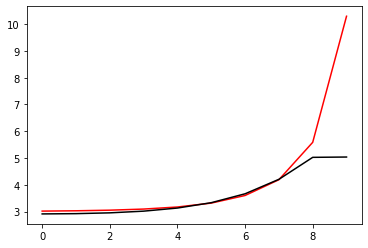

100100 0.03436329331157007
[2.97684989 2.98928248 3.02392912 3.09478001 3.22214085 3.43931764
 3.80122813 4.39342253 5.28565045 5.19948108]


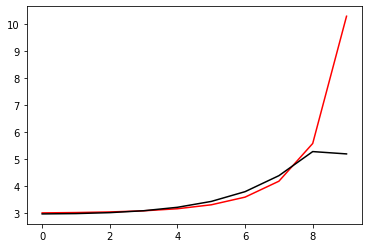

101200 0.03261005887029631
[3.01365075 3.03778139 3.08857292 3.17615708 3.32042586 3.55540057
 3.93958055 4.56777876 5.51638054 5.6001783 ]


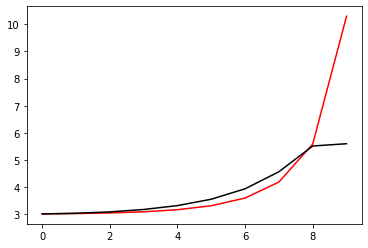

102300 0.0022616425008324084
[2.97428905 2.99662932 3.046699   3.13225397 3.26783735 3.48113278
 3.82447753 4.39380187 5.29464211 5.32500885]


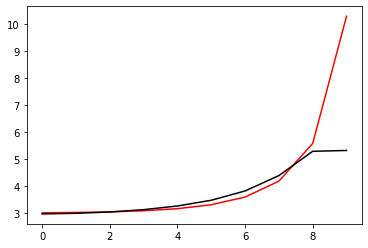

103400 0.022552406572347278
[2.99918939 3.02155694 3.0729312  3.16194096 3.30513049 3.53420721
 3.90592081 4.51930922 5.47513337 5.50347724]


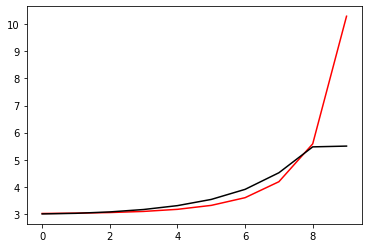

104500 0.021567211040446184
[3.04963316 3.04798479 3.06333753 3.11499679 3.22421448 3.41996318
 3.73679005 4.18204302 4.97618823 4.97324718]


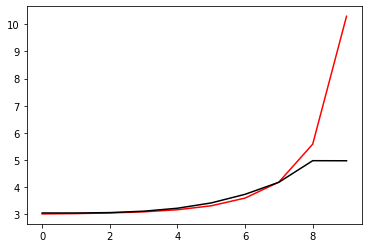

105600 0.05233681623930286
[2.9532887  2.96549462 2.99902846 3.06779161 3.19471747 3.41299412
 3.76768107 4.31280965 5.17669309 5.15543738]


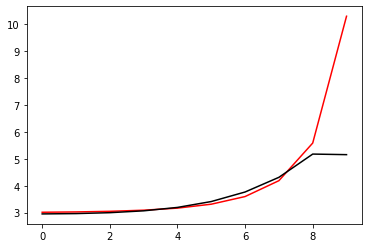

106700 0.053519095791175725
[2.78953623 2.81729017 2.86663332 2.94923601 3.08575626 3.30958861
 3.67491351 4.26593613 5.1728111  5.37145455]


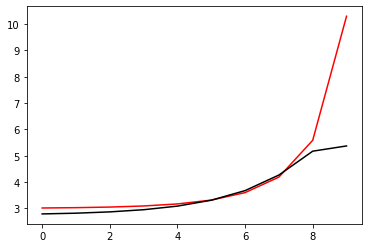

107800 0.011952263566558593
[2.88919279 2.90599059 2.9504059  3.03439317 3.17595341 3.40752758
 3.78622101 4.40363865 5.33822885 5.25935123]


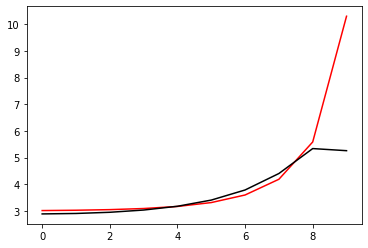

108900 0.03162088989725262
[3.08770632 3.07039026 3.07490307 3.1157964  3.21175146 3.39322901
 3.70851388 4.21766581 4.97448717 5.38825488]


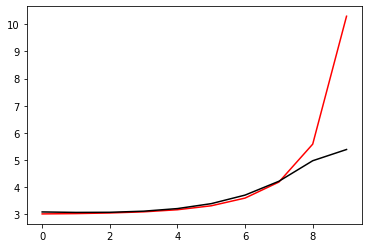

110000 0.03203146744223982
[2.91390009 2.91987848 2.94304087 3.00017756 3.11476809 3.32126189
 3.67323744 4.24662232 5.09416286 5.10658079]


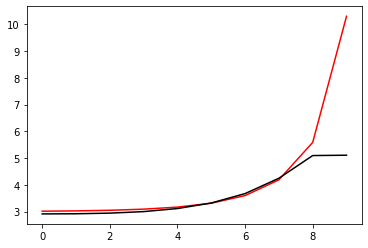

111100 0.03381587300776745
[2.98871071 3.00456601 3.0414837  3.11443944 3.24583859 3.47216064
 3.85264721 4.47622377 5.39947138 5.28259885]


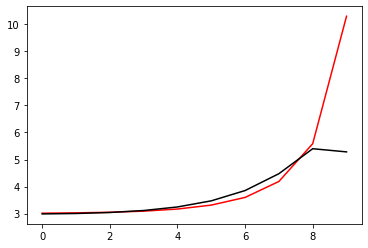

112200 0.03250402597645013
[2.97573328 2.98961181 3.0248876  3.09661554 3.22821952 3.45670888
 3.84482961 4.49622742 5.4932083  5.54888934]


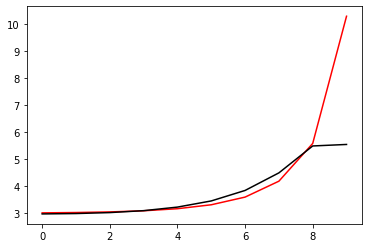

113300 0.00260223220370717
[3.05921543 3.08851991 3.14037835 3.22346269 3.35278841 3.55168093
 3.83947523 4.1224195  4.78537095 5.00546222]


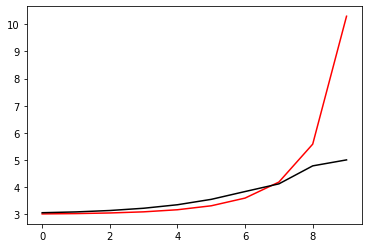

114400 0.021955480264732388
[2.99546604 3.02620336 3.08359004 3.17170637 3.30361686 3.4991109
 3.77675224 4.16084556 4.81389762 4.81416978]


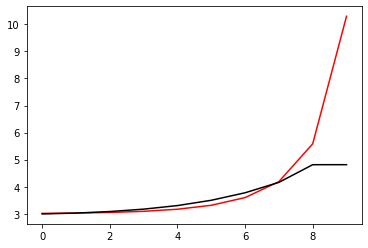

115500 0.022091797963887355
[2.9864935  3.01409925 3.07241818 3.16612443 3.30757864 3.5217828
 3.85870597 4.38629821 5.00476097 5.01557889]


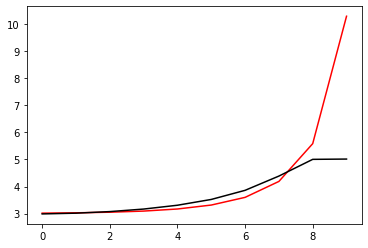

116600 0.05851762346406727
[3.01533234 3.0391766  3.09343614 3.18801237 3.33974509 3.58145669
 3.9748963  4.58272253 5.26761782 5.17841069]


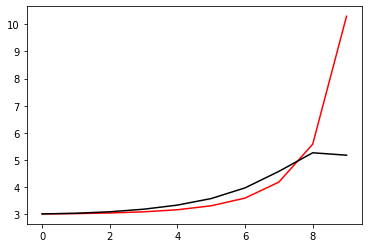

117700 0.021090374277077103
[2.92584056 2.94948615 3.0007738  3.08797794 3.22661221 3.444568
 3.78844634 4.30370303 4.91556855 4.91142982]


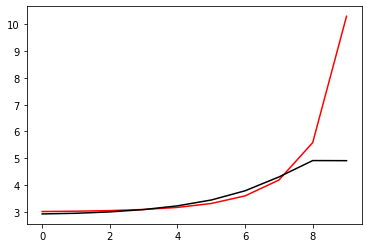

118800 0.015483563012432137
[2.93296336 2.95565748 3.00790786 3.09981817 3.24873804 3.48500363
 3.85851005 4.43046702 5.15505571 5.11975578]


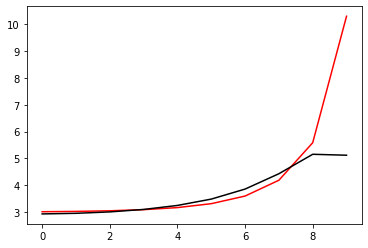

119900 0.023108016201323543
[2.87123454 2.89262239 2.94419254 3.03854472 3.19562907 3.44920731
 3.85627553 4.49887816 5.37471718 5.4095719 ]


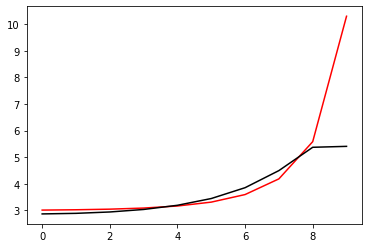

121000 0.03201241211428037
[2.9466715  2.91859669 2.91949455 2.96441842 3.07288235 3.27668363
 3.62716368 4.19481562 5.0063679  5.13927217]


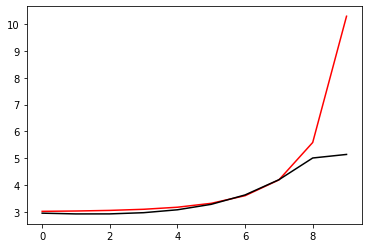

122100 0.03590080802270424
[2.99251065 2.98766243 2.99638395 3.04311916 3.15257101 3.35824818
 3.71292708 4.29189697 5.12872124 5.09600312]


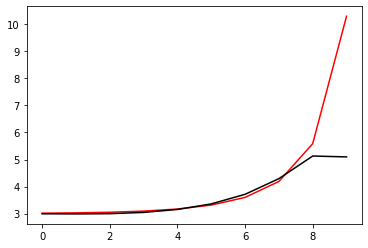

123200 0.03204579555943938
[2.98839145 2.99666507 3.02010586 3.07560027 3.18942438 3.39941419
 3.76282779 4.36311851 5.24559918 5.28492999]


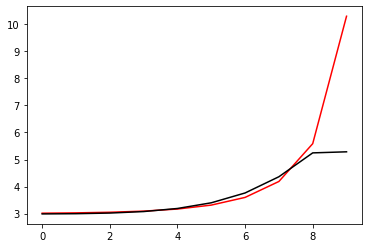

124300 0.001699591025543763
[2.94738167 2.95228551 2.9740525  3.02480419 3.12466268 3.30745842
 3.62906908 4.18028089 5.03858768 5.05920539]


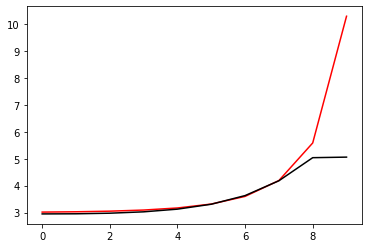

125400 0.022206397812330907
[3.00887956 3.02634636 3.06412705 3.13329409 3.25381808 3.45965953
 3.8089228  4.39659608 5.3035158  5.26694897]


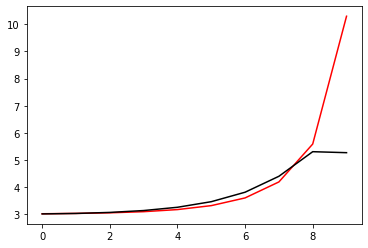

126500 0.022362242611681266
[3.01252717 3.02948565 3.06966385 3.14395995 3.27210402 3.48850472
 3.85378129 4.4714246  5.43740081 5.46000836]


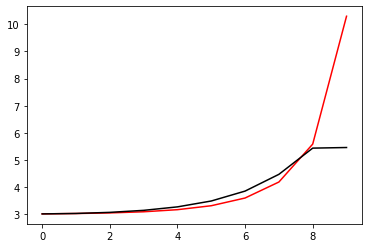

127600 0.05251890239655403
[2.95808354 2.97026523 3.00229402 3.06802411 3.18916897 3.40031163
 3.76176584 4.37984248 5.37473183 5.37319413]


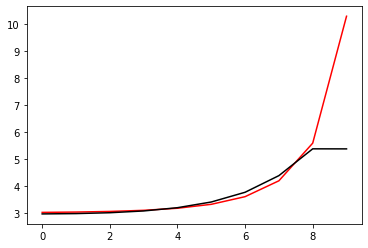

128700 0.020137981757621652
[2.93067724 2.93972787 2.97089941 3.0384445  3.16599429 3.39415391
 3.79451603 4.48674121 5.57080624 5.56203184]


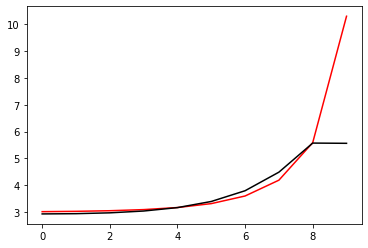

129800 0.0850723943791666
[2.8106949  2.82066962 2.85724809 2.9377983  3.08877275 3.35776117
 3.83081523 4.63601931 5.83972207 5.71481597]


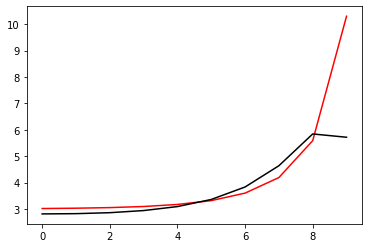

130900 0.024714682232950272
[2.92186268 2.940693   2.98094722 3.05670221 3.18984662 3.41201938
 3.76551898 4.30889606 5.19213684 5.17971774]


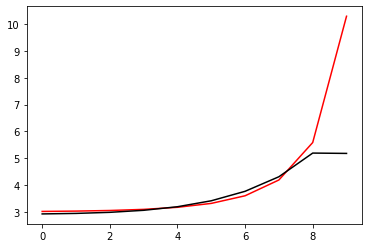

132000 0.03198087607093837
[2.93416289 2.95247992 2.99482842 3.0733185  3.20907739 3.43458592
 3.79789033 4.37074584 5.25746921 5.26277114]


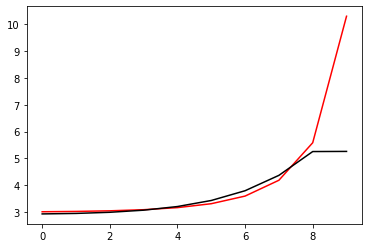

133100 0.034438167337244786
[2.93797644 2.95674713 3.00110905 3.08317558 3.22352249 3.45623389
 3.83721414 4.45212544 5.36403027 5.32836746]


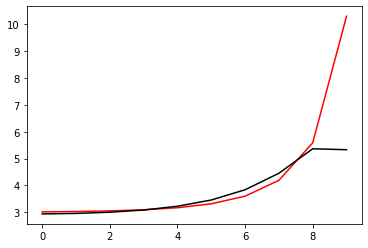

134200 0.03269102332115786
[2.94923998 2.96470301 3.00623388 3.08809752 3.23171554 3.47363239
 3.87665783 4.53837253 5.51146332 5.58457382]


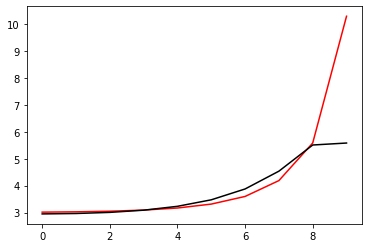

135300 0.0029648906591703376
[2.94464688 2.96364261 3.01028815 3.09774332 3.24730716 3.49549822
 3.90567796 4.58595349 5.62686254 5.64256144]


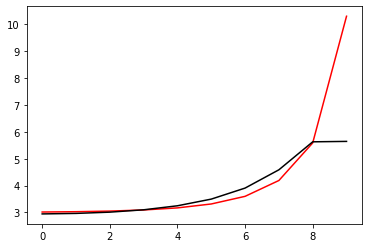

136400 0.02289047320770753
[3.0007434  3.01966763 3.0665104  3.15405159 3.30262955 3.54694807
 3.94906179 4.61967147 5.68808013 5.62357531]


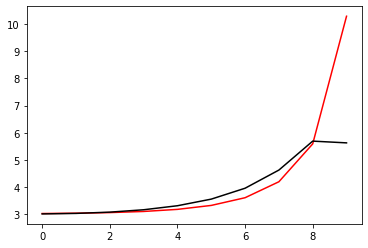

137500 0.02232437620831057
[2.95065105 2.98273074 3.04598411 3.14546283 3.29544206 3.52056949
 3.85535786 4.34245971 5.11467498 5.10934892]


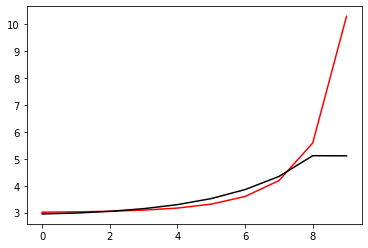

138600 0.05289321703335066
[2.93240473 2.95728677 3.0145098  3.11264592 3.26675658 3.50421219
 3.87359735 4.45421705 5.30022142 5.26811365]


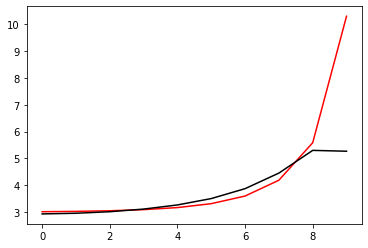

139700 0.03194199797591569
[3.00246531 3.02660745 3.08041097 3.17622248 3.33408346 3.58715548
 3.99185244 4.63392242 5.54740377 5.58531376]


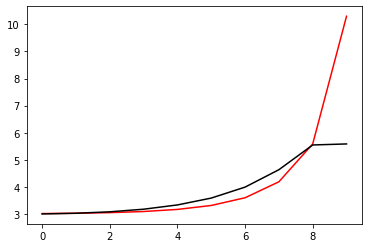

140800 0.01652381202116172
[2.93085933 2.95561413 3.00773044 3.0961558  3.23657297 3.45323708
 3.78005633 4.25960959 4.96190362 4.94997411]


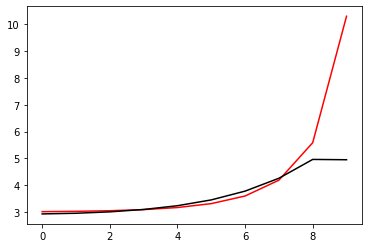

141900 0.028748084833998114
[2.93203163 2.95533513 3.00719818 3.09656192 3.23920031 3.46076373
 3.80079049 4.31394319 5.03858683 5.03312968]


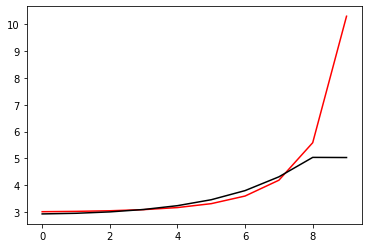

143000 0.03190585649054446
[2.92746335 2.94919932 2.99960838 3.08872199 3.23289926 3.45962407
 3.81489451 4.3680494  5.13751103 5.14180429]


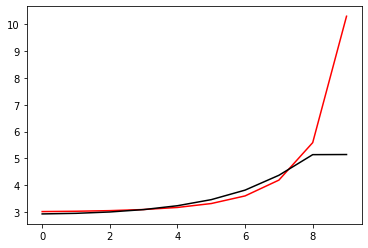

144100 0.03380951902252675
[2.95025541 2.97313226 3.02572157 3.12044229 3.27725823 3.53039042
 3.93821409 4.57687124 5.42445277 5.2843016 ]


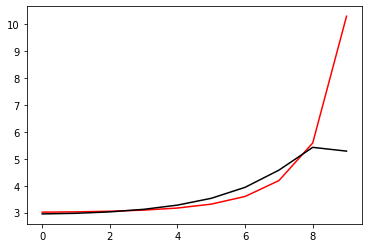

145200 0.04483124188172824
[2.8840886  2.86752943 2.8790069  2.93340421 3.04996395 3.25998097
 3.61007228 4.14221608 4.92124768 4.93882633]


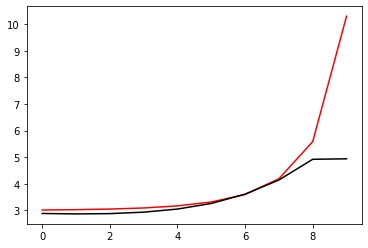

146300 0.001681212398996182
[2.98330866 2.97339961 2.97780085 3.02104621 3.12621809 3.32483928
 3.66366612 4.19543862 4.97794826 4.98532693]


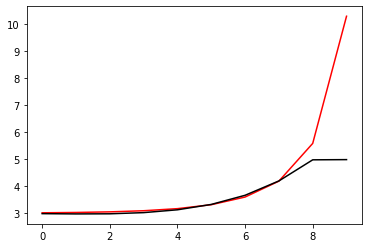

147400 0.02196870519308274
[3.03657046 3.04192548 3.06079415 3.11118678 3.2189126  3.41912938
 3.76238492 4.31548944 5.1331427  5.08796833]


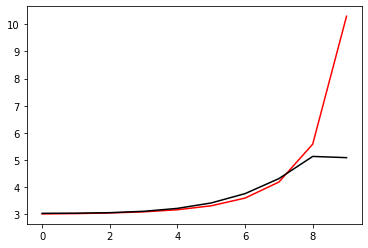

148500 0.022151692571209747
[3.02300447 3.03821439 3.07442102 3.14293559 3.26510774 3.47713439
 3.83648081 4.42709837 5.30971479 5.36586634]


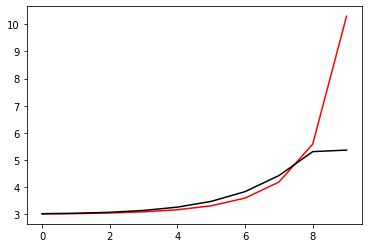

149600 0.05245627768929698
[2.9455061  2.95798887 2.99337771 3.06411598 3.1910228  3.4087576
 3.77719086 4.39366022 5.33842559 5.31019977]


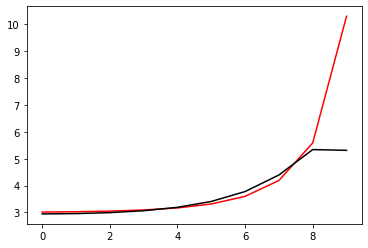

150700 0.019399236377963824
[2.90658404 2.91942521 2.95843788 3.0368377  3.17577894 3.41267635
 3.81313928 4.48494014 5.51742287 5.51812432]


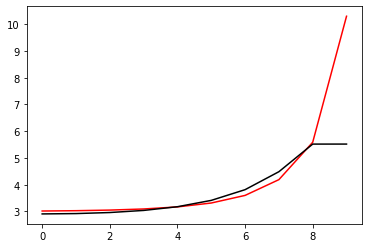

151800 0.015777304391483084
[2.93865044 2.95108642 2.9836613  3.04983731 3.16973999 3.37534258
 3.72227709 4.31046057 5.26204054 5.21255363]


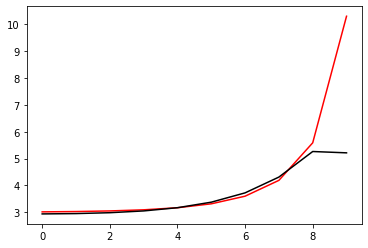

152900 0.022982480530868116
[2.89114943 2.90424563 2.94145842 3.01694325 3.15306943 3.38819433
 3.78908067 4.46663349 5.5220992  5.55441517]


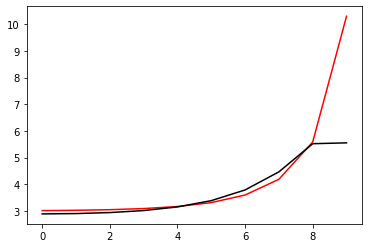

154000 0.4928445177340576
[3.20083503 3.20680092 3.23947157 3.31297219 3.44850814 3.67968455
 4.05367431 4.61043306 5.50563291 5.71106384]


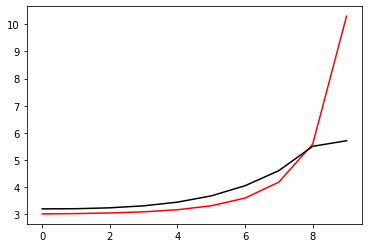

155100 0.046266461457034676
[2.94107444 2.93347182 2.94087836 2.98620111 3.0926283  3.2927533
 3.63425179 4.1739814  5.05707215 5.03827403]


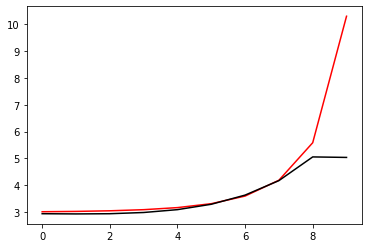

156200 0.03194494991461165
[2.99034989 2.99785414 3.0200577  3.07407111 3.18527482 3.38930263
 3.73828299 4.30636174 5.21265312 5.23862668]


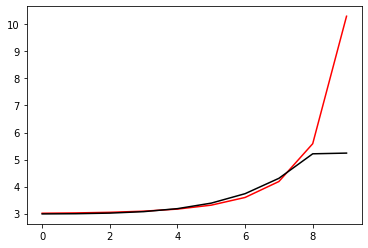

157300 0.0022826195188396037
[2.99290909 3.01028863 3.04985813 3.12206435 3.24777036 3.4629514
 3.82616178 4.42884361 5.37403377 5.35699421]


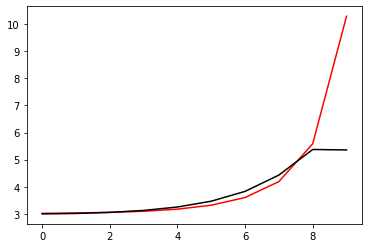

158400 0.03241323183843857
[2.96445922 2.97745284 3.00871689 3.06838058 3.17239926 3.3460511
 3.63354826 4.12811869 4.99095983 5.14341997]


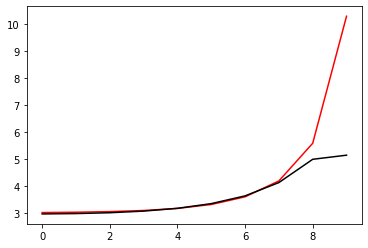

159500 0.02202001730538411
[3.00837707 3.02872935 3.07231952 3.14766079 3.2712706  3.47203231
 3.80103772 4.34843867 5.22075319 5.24103601]


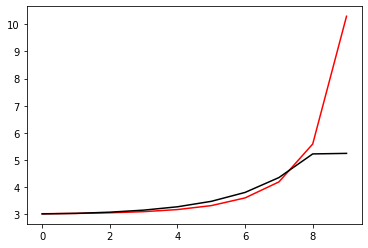

160600 0.05411082172266373
[2.97712065 2.99319472 3.0351276  3.11409208 3.24964849 3.47626245
 3.85487102 4.48722369 5.46282635 5.39459935]


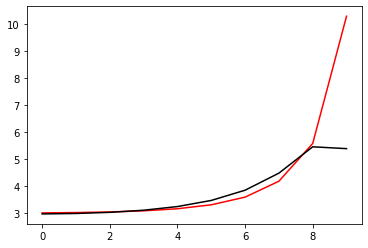

161700 0.01855274672889404
[2.90883813 2.90045846 2.90950818 2.95595003 3.06046261 3.25430654
 3.58287769 4.08998381 4.90687538 4.90031457]


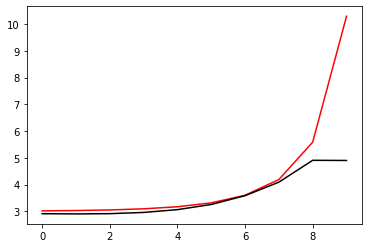

162800 0.017240724338202448
[2.98458245 2.98629436 2.9999371  3.04514848 3.14710706 3.33963181
 3.67144369 4.20564543 5.04836739 5.02721866]


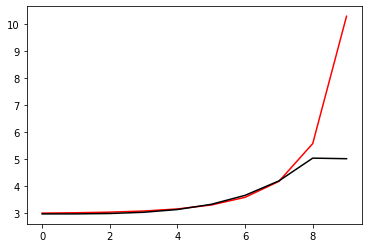

163900 0.029937859539135227
[2.97074705 2.9806676  3.01101318 3.07216114 3.18640607 3.38989192
 3.73864373 4.31553465 5.21061057 5.26989928]


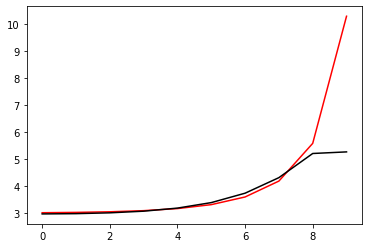

165000 0.5084873912667671
[3.24423055 3.24625277 3.26921648 3.32483933 3.43181921 3.61971062
 3.93144472 4.42005877 5.18950596 5.30902887]


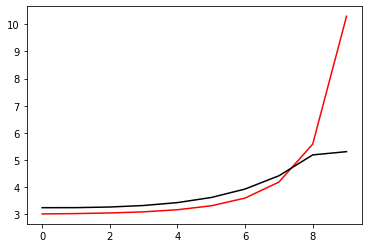

166100 0.04854776726335109
[2.95492675 2.94603113 2.9475317  2.97932051 3.06194326 3.22469853
 3.5124971  3.9902076  4.76463224 4.75264715]


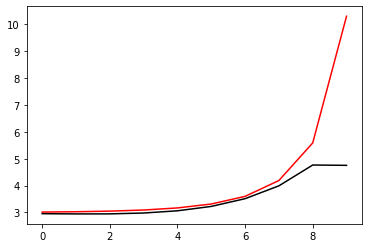

167200 0.03152014183926965
[3.00280527 3.00952968 3.02777375 3.07156536 3.16297777 3.33423132
 3.63449521 4.13890953 4.94238478 4.98616722]


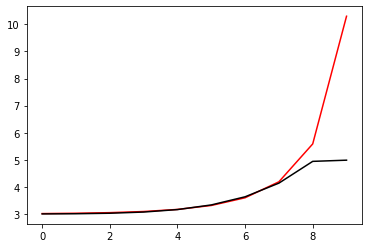

168300 0.001768264779533832
[2.98132726 2.99977968 3.038037   3.10282641 3.2117862  3.39681591
 3.71187103 4.2438964  5.08370983 5.07422096]


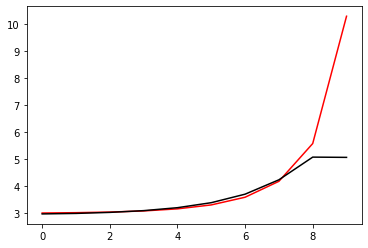

169400 0.021233450588890142
[3.05989176 3.07304553 3.10634756 3.16371478 3.25474624 3.39795604
 3.62792794 4.0203705  4.71815761 4.85313671]


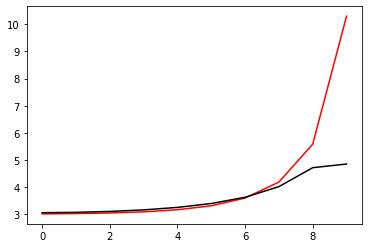

170500 0.02168653433632498
[3.01830386 3.04134698 3.08674285 3.16077408 3.27716453 3.46117418
 3.75838076 4.24388002 4.99072625 5.01858138]


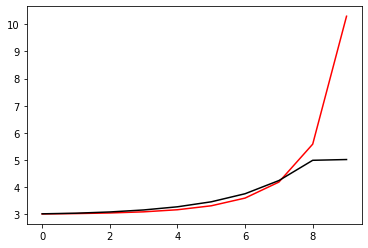

171600 0.055055706720491746
[2.97929067 2.99837601 3.04529233 3.1289222  3.26572556 3.48594626
 3.84328999 4.42366148 5.28401987 5.22309864]


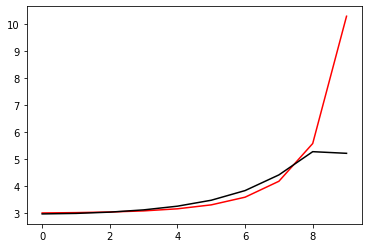

172700 0.020837351792163467
[2.93328251 2.95317175 2.99673305 3.07401107 3.19979382 3.39650271
 3.69575952 4.14134781 4.81148083 4.81040534]


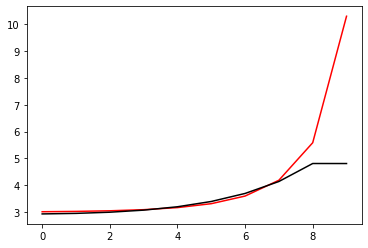

173800 0.016781971615818975
[2.95444823 2.97481444 3.0204328  3.10086635 3.23181386 3.43791884
 3.75660453 4.23875703 4.92713036 4.90912861]


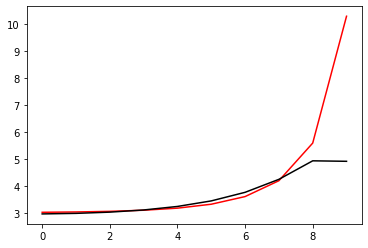

174900 0.027531026335684536
[2.9329894  2.95299271 2.99914606 3.08144557 3.21632895 3.43100848
 3.77044184 4.30105375 5.04499363 5.05466727]


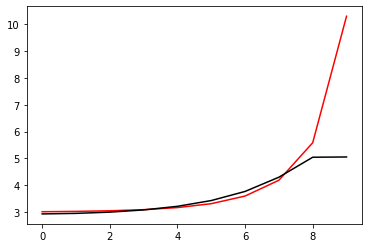

176000 0.0321766466354853
[2.91909404 2.93916851 2.9861024  3.0705558  3.21037442 3.43582278
 3.79883844 4.3797888  5.20007151 5.20028236]


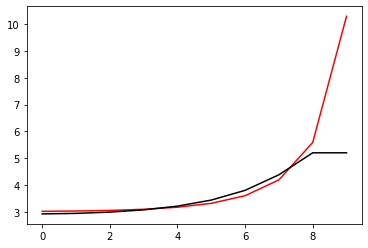

177100 0.047550897785967425
[2.87981862 2.89402098 2.93491422 3.00957794 3.13251218 3.3285991
 3.6393789  4.14079079 4.92941678 5.00229102]


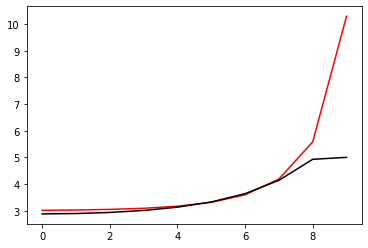

178200 0.032304717880728986
[2.96223962 2.98675117 3.03861314 3.12770129 3.27069793 3.49581186
 3.85112599 4.41510694 5.25817642 5.26465569]


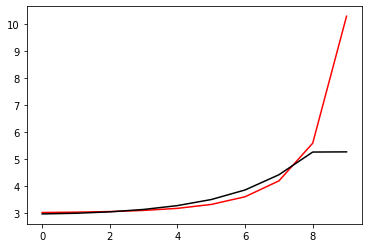

179300 0.0021786135209496595
[3.01361371 3.02748915 3.0646375  3.13866776 3.26836366 3.48379362
 3.8371074  4.41787814 5.31090507 5.32945838]


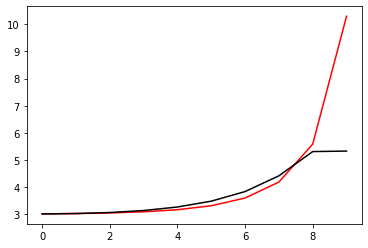

180400 0.045226442793098134
[2.93299193 2.91196237 2.90984331 2.94481275 3.03736956 3.21931432
 3.53711705 4.02505016 4.77680892 4.76688282]


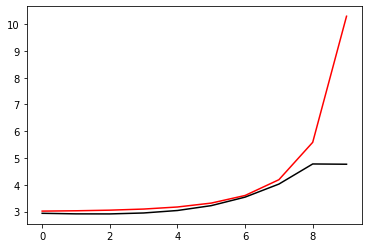

181500 0.022823253497748917
[3.02292143 3.01718554 3.01982469 3.05358325 3.14290192 3.32034774
 3.63267097 4.12986014 4.89085822 4.86386125]


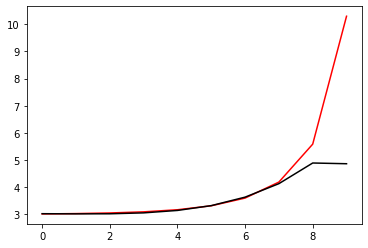

182600 0.060143921221085334
[3.04359927 3.04934274 3.06714853 3.1114942  3.20647291 3.38749184
 3.70592396 4.22999536 5.02953029 4.99719212]


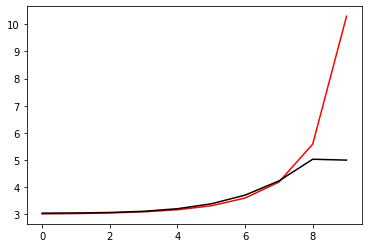

183700 0.02062804751766701
[2.92679336 2.94447971 2.98663517 3.0615119  3.18743439 3.39928664
 3.75563797 4.34466725 5.23726708 5.27809273]


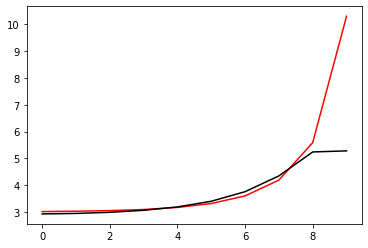

184800 0.021554220646770025
[2.8528215  2.88400342 2.93717229 3.01983986 3.1484278  3.35152089
 3.68005196 4.22358785 5.0729046  5.1874226 ]


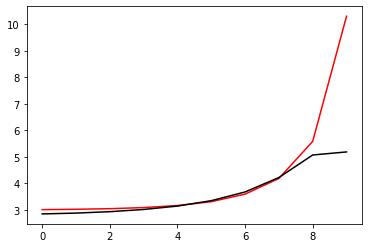

185900 0.023352762596806662
[2.91106598 2.92715029 2.96970934 3.04761497 3.17638584 3.38558881
 3.73047295 4.30626733 5.19572409 5.18572931]


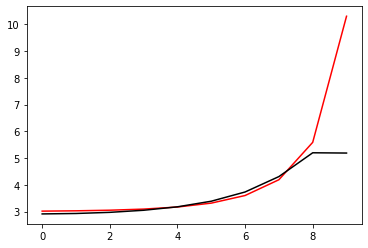

187000 0.2771123699967441
[3.1720642  3.17842003 3.20950246 3.2780664  3.4019964  3.60989475
 3.94723674 4.48442022 5.32576702 5.43564569]


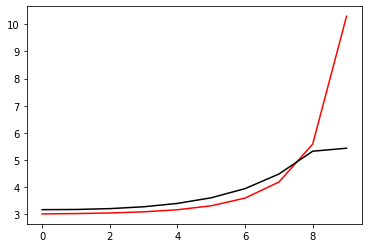

188100 0.048546029437037876
[2.94089677 2.9292955  2.93529821 2.97696431 3.07140048 3.24448443
 3.53840007 4.02137868 4.79212079 4.78373355]


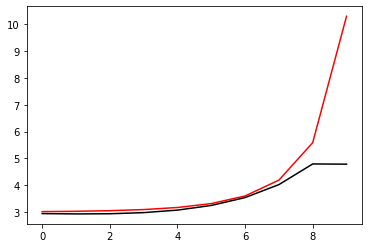

189200 0.03414708855681033
[2.96231099 2.96236496 2.97476674 3.01822071 3.11366391 3.28925589
 3.58970054 4.0879456  4.87773371 4.86479758]


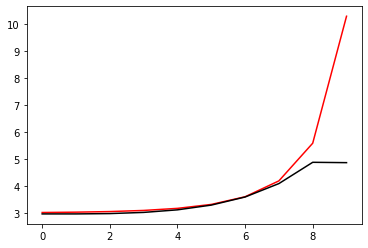

190300 0.0016450493438599162
[3.00353404 3.01342228 3.038728   3.09231247 3.19538372 3.37958402
 3.69440835 4.21970491 5.04458279 4.99179833]


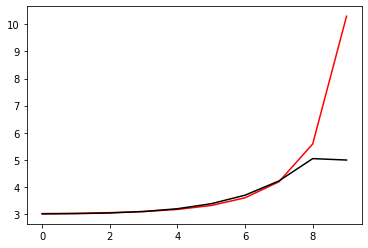

191400 0.022051060671121385
[3.03666955 3.05347958 3.09257    3.16311711 3.28322541 3.48542064
 3.82507207 4.39233984 5.27619891 5.22551456]


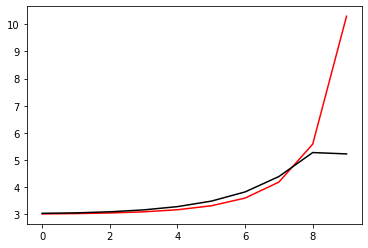

192500 0.031613258010371216
[2.89152108 2.91153559 2.95284741 3.01967431 3.12392975 3.28918736
 3.55939009 4.01572985 4.7594364  4.7499716 ]


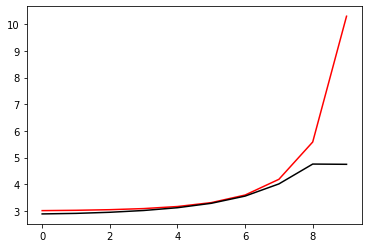

193600 0.052664242220210634
[2.96515793 2.98235788 3.02300345 3.09464269 3.21251406 3.40441426
 3.72107113 4.2497573  5.07429624 5.03561751]


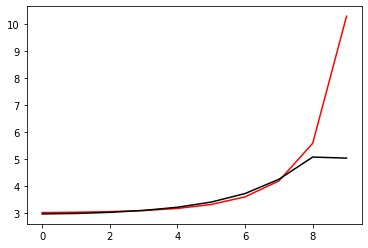

194700 0.020271650332365825
[2.92218309 2.93518096 2.97371363 3.04904086 3.17946157 3.39778211
 3.76276508 4.37336618 5.31327738 5.31853102]


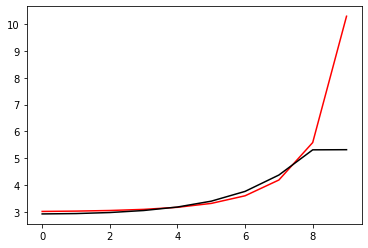

195800 0.081963720218555
[2.80895329 2.82644377 2.87418644 2.96588844 3.12459763 3.39064447
 3.83392071 4.55921037 5.63130212 5.50713361]


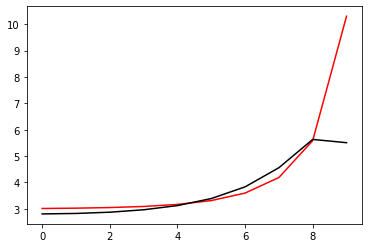

196900 0.07472947979997913
[2.74670143 2.74360561 2.76580846 2.83060282 2.96022599 3.19157494
 3.5787036  4.17495697 5.10581745 5.55497315]


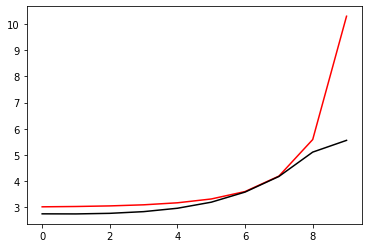

198000 0.03202337514361013
[2.94042726 2.92274539 2.92178866 2.9611091  3.06313527 3.26175384
 3.60757014 4.15744556 5.02468607 5.02780896]


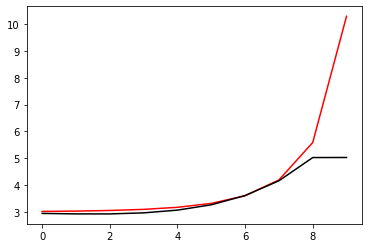

199100 0.039808743027392596
[2.96285055 2.96051811 2.9694294  3.01289788 3.11776439 3.31988783
 3.6721084  4.24309785 5.13523521 5.09770338]


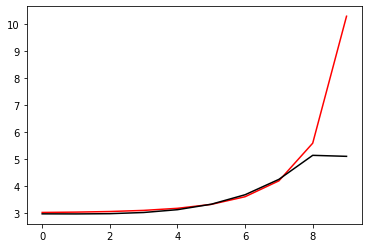

200200 0.03202448131758123
[2.99051833 2.99858356 3.021068   3.07398793 3.18376016 3.38918936
 3.74786456 4.34250631 5.26652089 5.33380522]


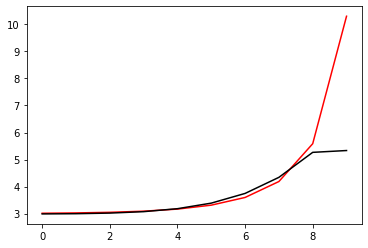

201300 0.0023679364850087204
[2.99331471 3.01032354 3.04981125 3.12185403 3.24737361 3.46419244
 3.83520461 4.45842131 5.42717317 5.41038697]


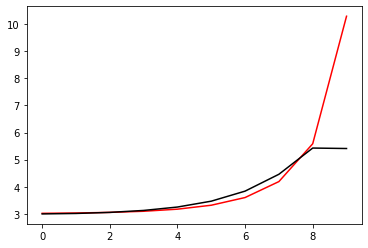

202400 0.03899238463189546
[2.9907975  2.97006895 2.96555747 2.99579175 3.07934192 3.2473163
 3.55445708 4.09773063 4.99523746 4.95156684]


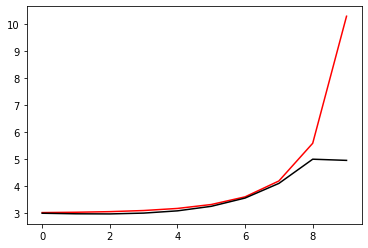

203500 0.021776432071486104
[3.03744634 3.0385404  3.04888455 3.0866395  3.1755496  3.34951942
 3.66548054 4.22279358 5.13604727 5.14969118]


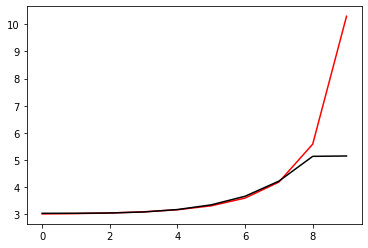

204600 0.060835789263590505
[3.05483103 3.06636334 3.09372107 3.14873703 3.25347773 3.44513654
 3.78663274 4.38438352 5.35233424 5.29629335]


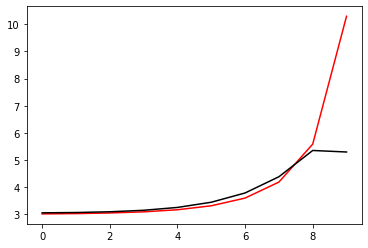

205700 0.020956200867546824
[2.94818908 2.96254582 2.9989611  3.06591432 3.18086921 3.37740677
 3.71726016 4.30894468 5.27019437 5.27507849]


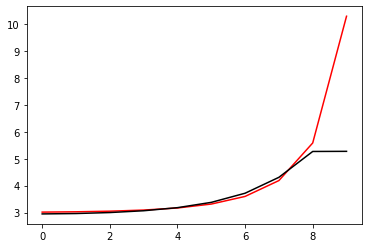

206800 0.01521745425898734
[2.93487325 2.94720786 2.98100979 3.04854259 3.16982192 3.37967203
 3.74095868 4.36384733 5.36544896 5.30212697]


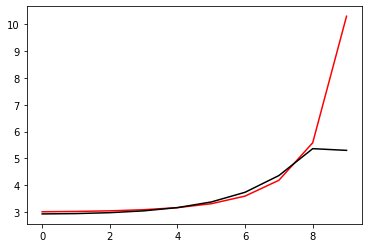

207900 0.0249972063454486
[2.94026462 2.94630812 2.97427371 3.04047344 3.16798116 3.39599402
 3.79367578 4.47970289 5.56563679 5.66374247]


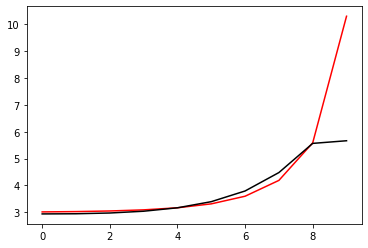

209000 0.025681160804495104
[3.00509389 3.03383513 3.08156175 3.15253537 3.25804107 3.41679524
 3.65561781 4.01931427 4.68923214 4.87181897]


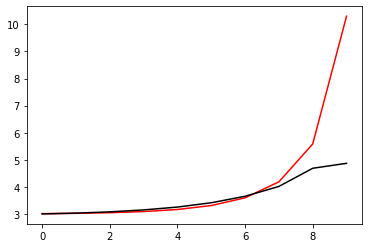

210100 0.03509432337692097
[2.9739042  3.00106689 3.05290724 3.13419266 3.25695237 3.44536768
 3.74664387 4.24513161 4.9766772  4.86915757]


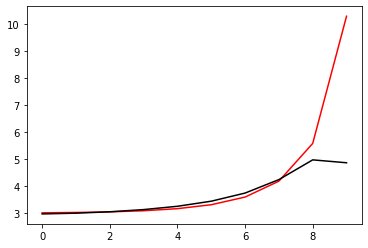

211200 0.032397354613646116
[2.9225766  2.95034574 3.0072964  3.09968773 3.24191662 3.46230624
 3.8144011  4.38857634 5.22423165 5.2638097 ]


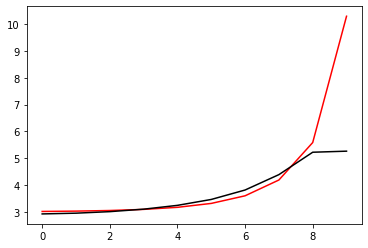

212300 0.0015605364204263846
[2.93724355 2.93498576 2.95461359 3.0098671  3.11631441 3.30003084
 3.60567746 4.10381333 4.90493833 4.97867375]


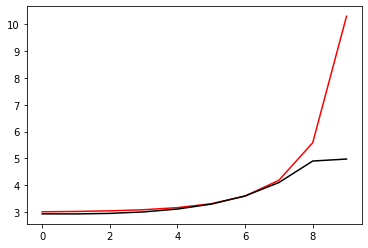

213400 0.02214091080453289
[3.0142732  3.03124868 3.0694327  3.14155966 3.26791574 3.47989581
 3.82885718 4.39764769 5.26638363 5.22605446]


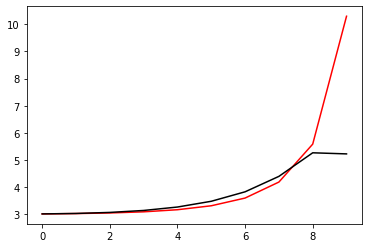

214500 0.0220957333897536
[3.02497418 3.04117231 3.07791705 3.14789891 3.27090117 3.4784412
 3.82408947 4.3982867  5.29459647 5.35300963]


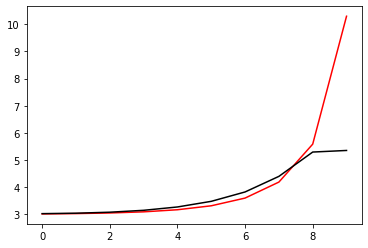

215600 0.052506285581617865
[2.94822146 2.95850274 2.9923875  3.06162775 3.18594737 3.39970733
 3.76700142 4.40373592 5.41428975 5.33370642]


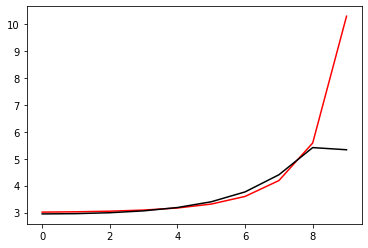

216700 0.021681403913646254
[2.97114421 2.9933884  3.03472955 3.10708148 3.22972124 3.43019056
 3.73908398 4.17603178 4.90911324 4.90146582]


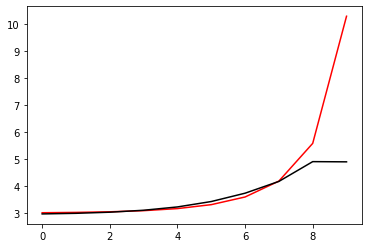

217800 0.016430109105830523
[2.96238125 2.98340853 3.0276335  3.10432642 3.23186589 3.43911918
 3.76773772 4.27646086 5.01616533 4.99122549]


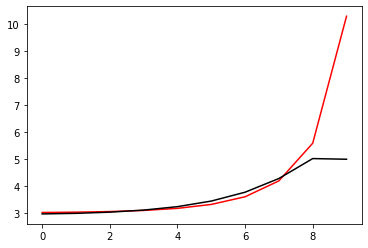

218900 0.027782343998091874
[2.93532431 2.95558839 3.0011253  3.0815583  3.21455464 3.43092791
 3.78411574 4.36125274 5.15577329 5.16466554]


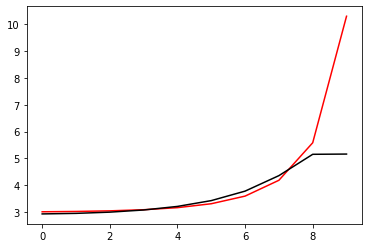

220000 0.11273957814492666
[2.81453945 2.83042016 2.87398869 2.95294638 3.08398282 3.29712977
 3.64417138 4.20060906 5.04445186 5.31289185]


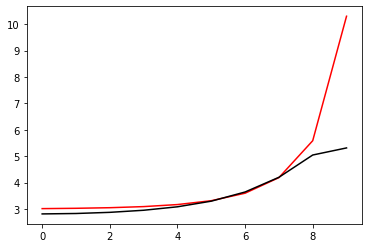

221100 0.03398961425635139
[2.94756177 2.97184101 3.0235932  3.11422541 3.26253509 3.50089973
 3.88354825 4.49049509 5.36567421 5.24518532]


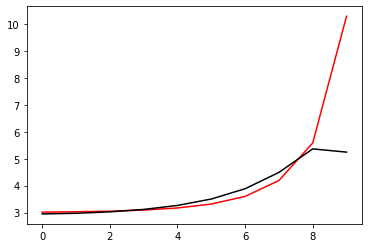

222200 0.03290615295892372
[2.98021269 3.00586931 3.05994581 3.15478252 3.31145915 3.56481816
 3.97379258 4.63038612 5.59065596 5.65637581]


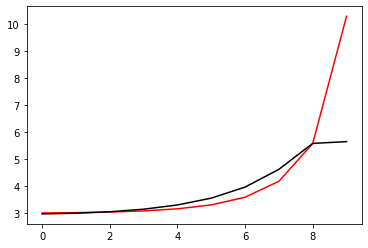

223300 0.0027074897587964254
[2.94267886 2.95748378 2.99577379 3.07244492 3.20986958 3.44318139
 3.83408851 4.49834939 5.55816738 5.59554466]


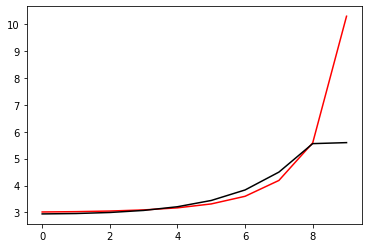

224400 0.02240137055691373
[2.97824255 3.02322543 3.09711955 3.20619283 3.37034541 3.61920034
 3.97008407 4.31193628 5.03222627 5.0431541 ]


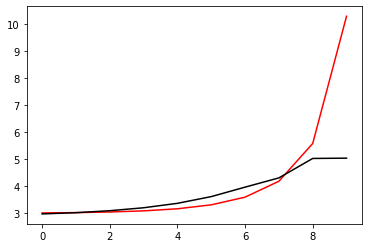

225500 0.022350060753667095
[2.9870502  3.02247493 3.09304189 3.20223067 3.36500717 3.60501299
 3.94036229 4.38024018 5.06790481 5.07787271]


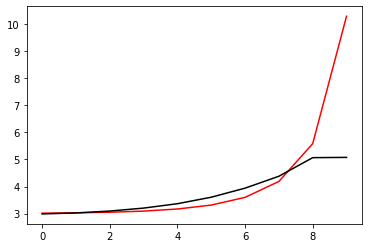

226600 0.05496944432576866
[2.95220041 2.98280054 3.04914573 3.15711967 3.31871921 3.55515671
 3.89999692 4.42685488 5.18643666 5.13325862]


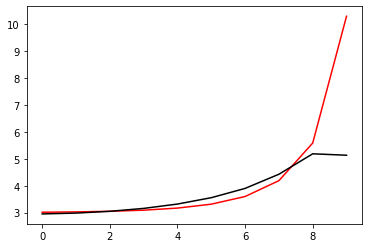

227700 0.018044141858001787
[2.83201979 2.87398373 2.94648619 3.05922738 3.22734868 3.47907258
 3.87160821 4.51321254 5.33816586 5.51790553]


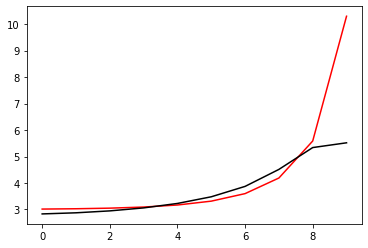

228800 0.014327356562141305
[2.90690476 2.93331043 2.99418148 3.09859435 3.26291691 3.51750141
 3.91701333 4.5469568  5.42816231 5.37322502]


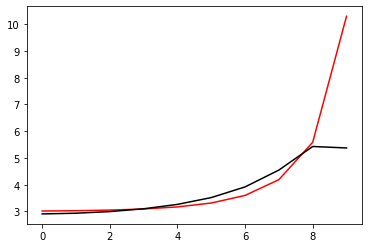

229900 0.02534698136311333
[2.86156261 2.87551465 2.91989266 3.00935736 3.16637497 3.43001421
 3.87208494 4.61354852 5.69328084 5.67175932]


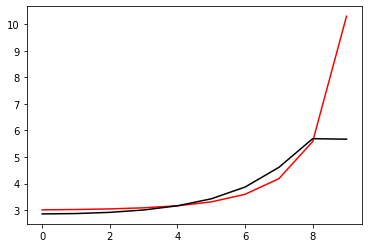

231000 0.03205215389009312
[2.9241473  2.9140978  2.92642136 2.97986233 3.09405841 3.29990286
 3.64612017 4.18861119 5.0012176  5.00439381]


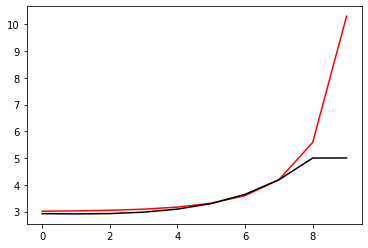

232100 0.03752820611172094
[2.95457222 2.95749303 2.97729439 3.03466394 3.15300592 3.36508568
 3.72136419 4.28791144 5.13326748 5.08833642]


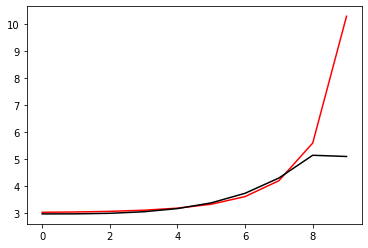

233200 0.032118021260137776
[2.96880239 2.97968593 3.00884546 3.07197437 3.19325343 3.40814849
 3.77068831 4.3588747  5.24013596 5.29290105]


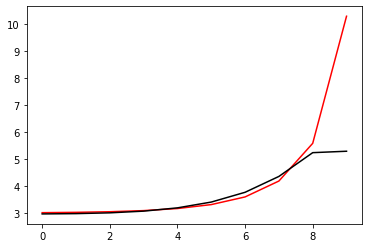

234300 0.0023847935734109126
[2.98723179 3.00333121 3.04191515 3.11515054 3.24496347 3.46789566
 3.84358157 4.46403971 5.40342199 5.39063978]


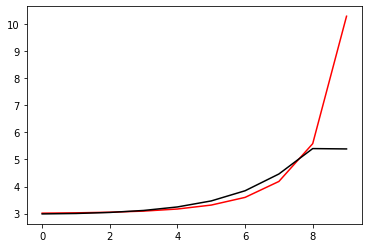

235400 0.04193970018344588
[2.98048123 2.95454268 2.94946609 2.98111872 3.06823375 3.24137536
 3.54941555 4.06981894 4.90493497 4.89455148]


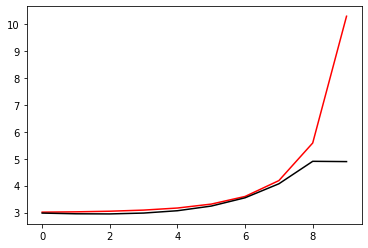

236500 0.02278686852298639
[3.02142316 3.01449866 3.01741063 3.05228294 3.14154944 3.31666858
 3.62810868 4.15694168 5.00161057 4.98157199]


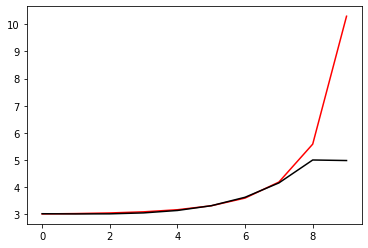

237600 0.05500555406370401
[3.01793102 3.02205193 3.03769595 3.08079051 3.17546519 3.35656379
 3.67864085 4.22932463 5.10455097 5.06637722]


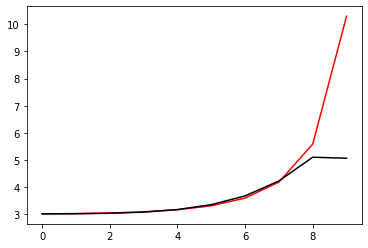

238700 0.02070506349930592
[2.94179124 2.95463202 2.98728208 3.05118675 3.16762765 3.37356235
 3.73079772 4.33857551 5.29306955 5.36540592]


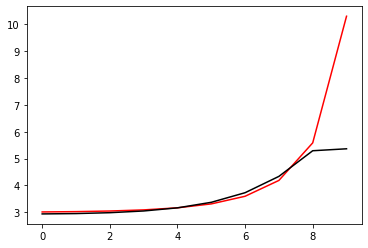

239800 0.01476011072835777
[3.00042993 3.01850009 3.05836059 3.13095738 3.25701372 3.47244539
 3.84027856 4.46719663 5.45711824 5.3942711 ]


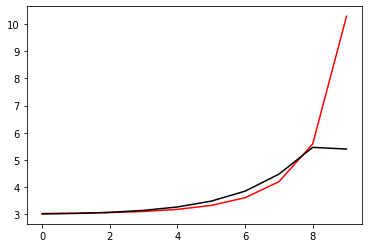

240900 0.03179282528088949
[3.03105466 3.04985003 3.09121764 3.16235381 3.27753772 3.46413537
 3.77347115 4.29874271 5.14802577 5.17448293]


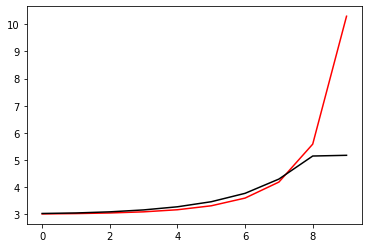

242000 0.20293314811779634
[3.16261798 3.17364404 3.21044407 3.28117658 3.40006741 3.59219289
 3.89853601 4.38094939 5.14033654 5.26259342]


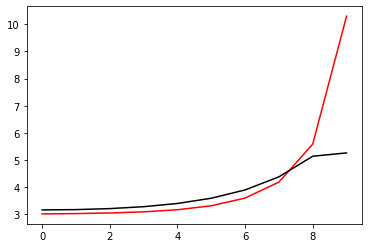

243100 0.04904669069253497
[2.94749384 2.93721381 2.94441822 2.98478863 3.07207953 3.22854788
 3.49191028 3.92287627 4.61690191 4.6088311 ]


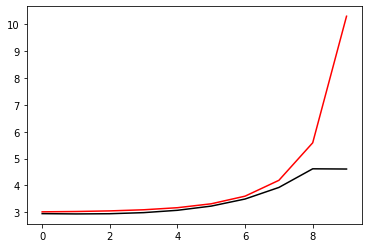

244200 0.03596892741687586
[2.96089527 2.96215231 2.97543176 3.01720215 3.10561122 3.26521372
 3.53594835 3.98377169 4.69829048 4.68550104]


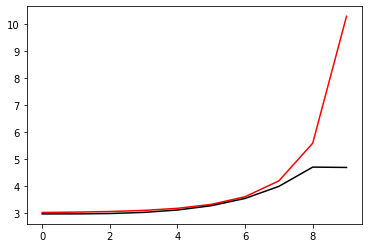

245300 0.0014289431766795059
[2.99864617 3.00938151 3.03569568 3.08866431 3.18694315 3.35893564
 3.64973679 4.13296789 4.8929003  4.85474382]


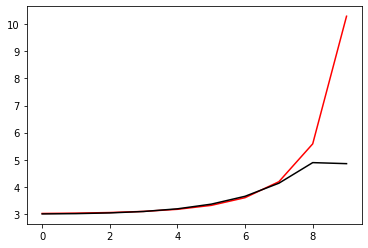

246400 0.021713653220700138
[3.0308039  3.0485825  3.08721046 3.15310652 3.26167403 3.44111858
 3.74020163 4.24042636 5.02587497 5.00564184]


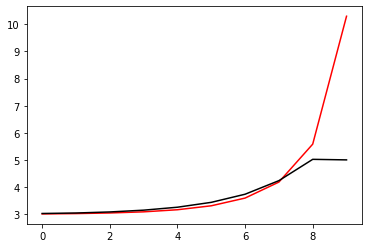

247500 0.0320684953421648
[2.9167586  2.91512741 2.93107448 2.97629806 3.06460063 3.21987654
 3.48205932 3.91033043 4.56963369 4.5628431 ]


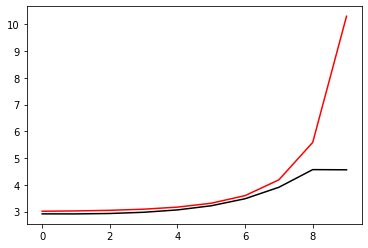

248600 0.05223287458197329
[2.98933941 2.99373954 3.01077963 3.05476507 3.14288022 3.3002214
 3.56798476 4.00998276 4.69016962 4.68559649]


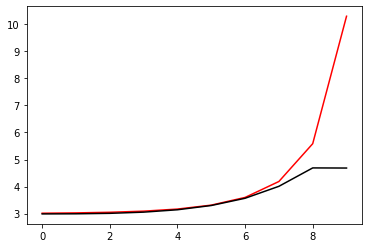

249700 0.020599322075200613
[2.93974433 2.9589275  2.99319724 3.05280763 3.15540696 3.32914316
 3.61942119 4.09767536 4.83014753 4.86251271]


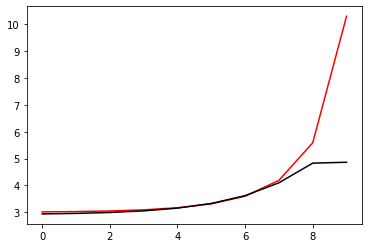

250800 0.015823527412582864
[3.03935241 3.05658052 3.09455561 3.16208122 3.27481989 3.46055832
 3.76785084 4.2761063  5.05641021 4.97483031]


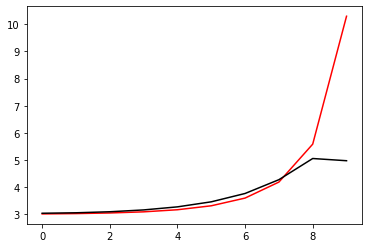

251900 0.03129013021011948
[3.02645482 3.04106047 3.07493934 3.13539814 3.23522131 3.39788015
 3.66657728 4.11762288 4.8302965  4.85779382]


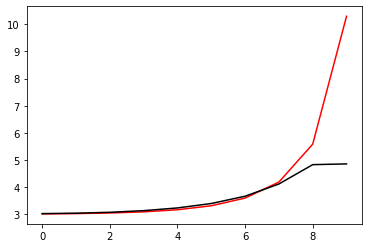

253000 0.02183631201008224
[2.99845332 3.02107816 3.07030598 3.1543922  3.28749079 3.49620653
 3.82821069 4.36277741 5.16800299 5.13423102]


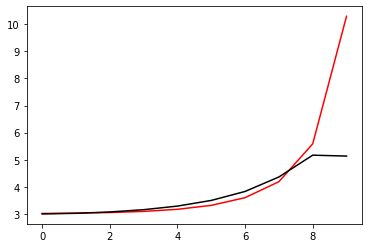

254100 0.04725329572205516
[2.94454659 2.93370637 2.94760264 2.99889537 3.10610318 3.30027603
 3.63128597 4.12538128 4.72503587 5.14256842]


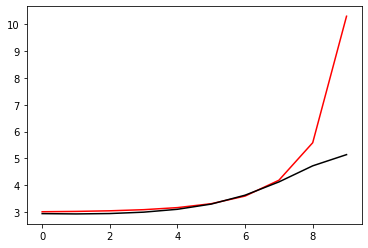

255200 0.03284967083497025
[2.95892281 2.96235617 2.98139399 3.03426095 3.14270629 3.33848602
 3.66962414 4.17749315 4.81761135 4.78763405]


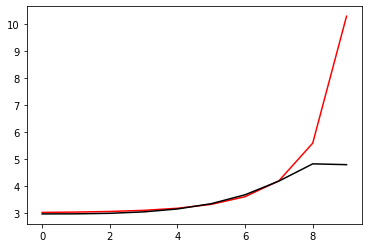

256300 0.0017706292281366158
[2.99007034 3.00292189 3.03429335 3.09709924 3.21315831 3.41598872
 3.75536588 4.28883943 4.99446443 5.00033322]


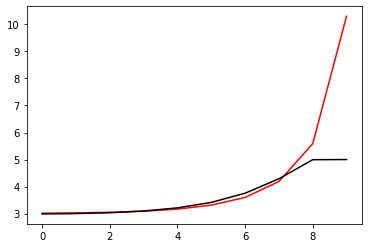

257400 0.02194341932758639
[3.02113642 3.03738361 3.07614667 3.14724731 3.26838538 3.47071717
 3.80585619 4.34705091 5.11006036 5.1226894 ]


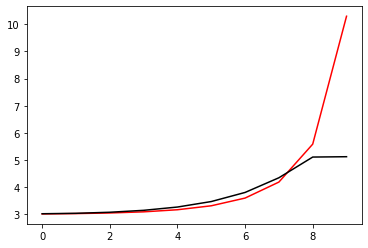

258500 0.032972419474758034
[2.91202858 2.89634218 2.90248654 2.94382407 3.03613672 3.20485382
 3.48924066 3.94459991 4.62444995 4.62292197]


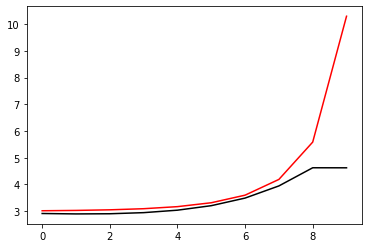

259600 0.054322391595320076
[3.02803216 3.01961205 3.02154437 3.05522539 3.14047944 3.30374809
 3.58585491 4.04633625 4.73768141 4.72745303]


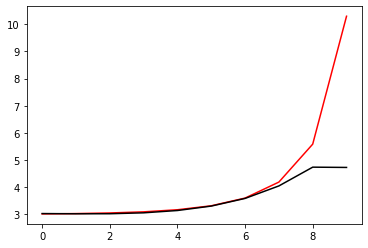

260700 0.02051287025942896
[2.94553034 2.95877487 2.98374246 3.035207   3.13547133 3.31577082
 3.62273101 4.1253366  4.87961986 4.89360117]


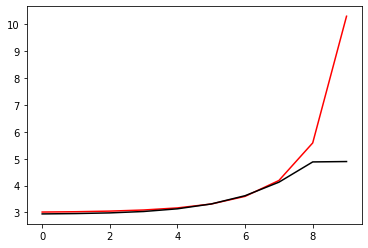

261800 0.047394264428694696
[2.83975061 2.86544619 2.91411603 2.99484622 3.12760506 3.34685777
 3.70887002 4.29791063 5.17508379 5.10027313]


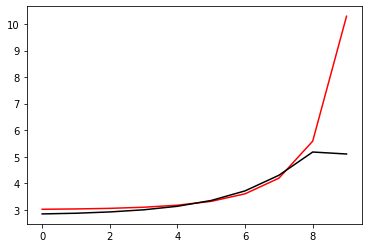

262900 0.022155883609438345
[2.90882935 2.91894165 2.94902105 3.00927797 3.11685149 3.30124538
 3.61396419 4.14110153 4.9661647  4.95082136]


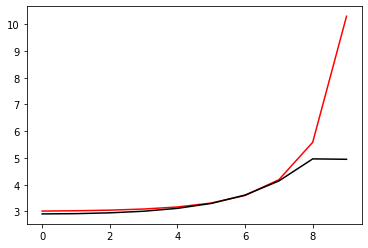

264000 0.0826523541563407
[2.84786135 2.85954603 2.89404727 2.96011572 3.07318437 3.26032419
 3.56869753 4.0854579  4.92532836 5.19697061]


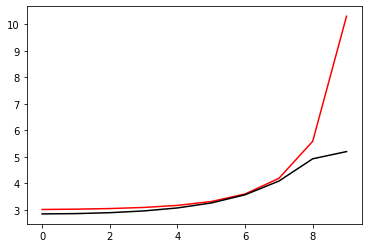

265100 0.03459336691986753
[2.95899207 2.97899649 3.02215861 3.09990527 3.22991114 3.44226125
 3.78923668 4.3585371  5.23811261 5.10445058]


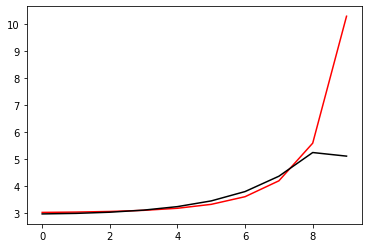

266200 0.03277880496864332
[2.98025366 3.00905749 3.0670501  3.16380394 3.31796842 3.56191666
 3.95197601 4.58112722 5.52958329 5.5823356 ]


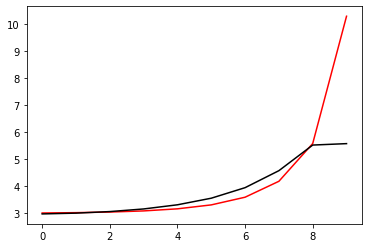

267300 0.0018064991341552278
[2.91852365 2.90088218 2.90970542 2.96082022 3.07220344 3.27239291
 3.60537399 4.13697558 4.98485051 5.014197  ]


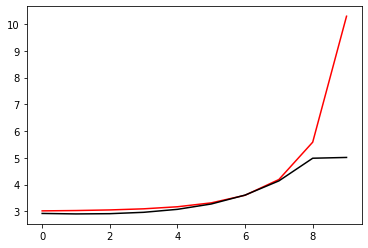

268400 0.03439601588887468
[2.97186183 2.96696193 2.97725786 3.0255538  3.13413977 3.33310444
 3.66898366 4.21375256 5.07523693 5.04306558]


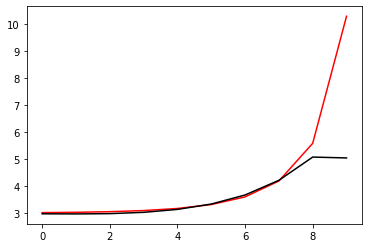

269500 0.021872869285493778
[3.03319731 3.04046283 3.06287556 3.11685385 3.22642116 3.42504571
 3.76335828 4.32103894 5.19598951 5.23013791]


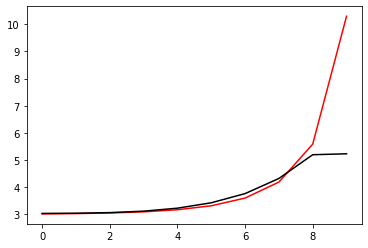

270600 0.05251152678865089
[2.94974294 2.964687   3.00140632 3.07187189 3.19754383 3.4145956
 3.78205004 4.39309398 5.34065149 5.29750656]


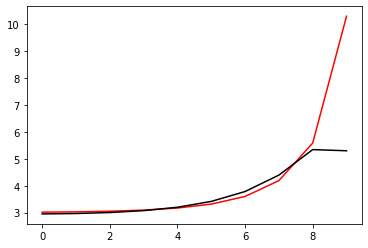

271700 0.062081205408569665
[2.75713787 2.78822757 2.84037344 2.92527033 3.06370252 3.29079638
 3.6676217  4.29732007 5.27954268 5.57719682]


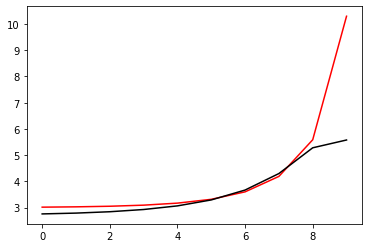

272800 0.013890607493523284
[2.89675674 2.91918272 2.96769363 3.04942126 3.18010565 3.3904703
 3.73812077 4.32481455 5.2472474  5.17374804]


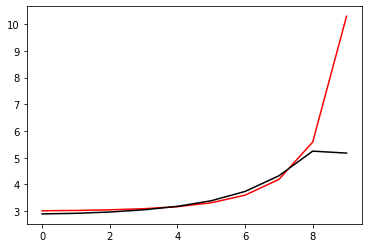

273900 0.023210036754012415
[2.8744854  2.89073486 2.93655988 3.02338768 3.17051272 3.41336438
 3.81727426 4.49213953 5.51878902 5.505278  ]


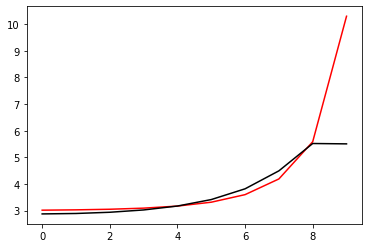

275000 0.03297248798579704
[2.88768526 2.90674771 2.95497075 3.04467236 3.19521545 3.44209541
 3.8496041  4.52845459 5.578039   5.62642629]


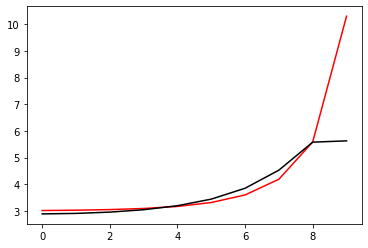

276100 0.03460083491607757
[2.98804642 3.03269038 3.10595874 3.21589581 3.37918125 3.62101858
 3.96262791 4.32203693 4.99903215 5.02730219]


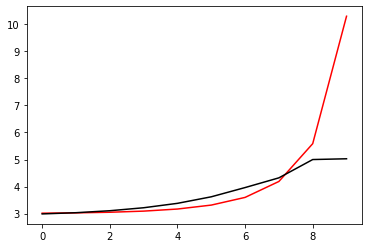

277200 0.03241666919135706
[2.96922641 3.00933354 3.08394195 3.19692318 3.36203115 3.60140058
 3.93994901 4.41916193 5.06214391 5.06615868]


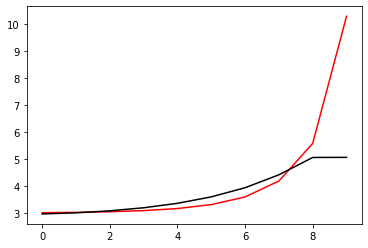

278300 0.0025976658477438906
[2.91302247 2.94533293 3.0145839  3.12560988 3.28939353 3.52779098
 3.88499924 4.44111135 5.17443599 5.19345137]


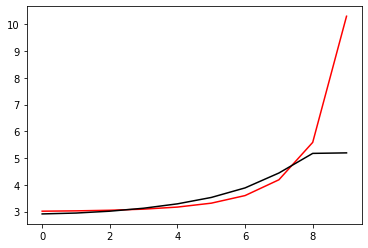

279400 0.02276402148431202
[2.99233875 3.01329888 3.06562327 3.16309243 3.32372215 3.57855759
 3.98610969 4.6149737  5.42149975 5.32808463]


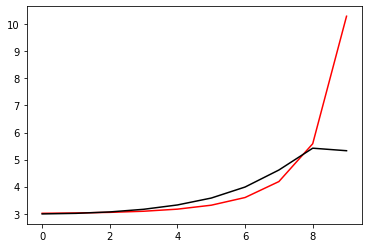

280500 0.021929041437538477
[3.02523378 3.03176282 3.05987226 3.1259405  3.25031401 3.46582908
 3.82791829 4.39310716 5.0453988  5.0524046 ]


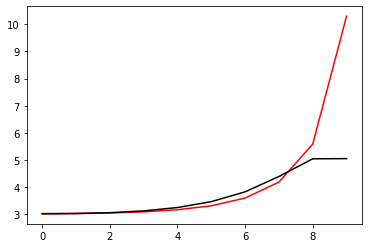

281600 0.05285527424113304
[2.95689034 2.97165443 3.01097329 3.08828203 3.22640612 3.46168149
 3.85116784 4.4657131  5.25325654 5.2231105 ]


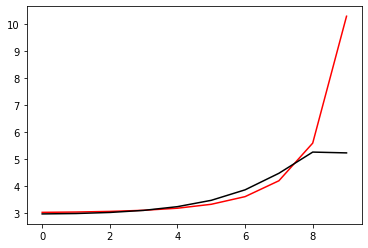

282700 0.019021000321393013
[2.89413197 2.90846739 2.95013387 3.03323324 3.18026705 3.42929806
 3.8430306  4.51043488 5.44114738 5.44258994]


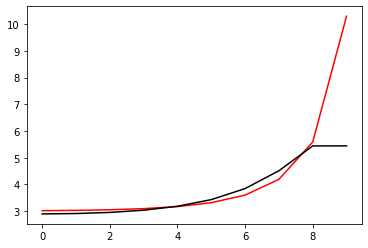

283800 0.014231685623713589
[3.0022147  3.02258784 3.06923189 3.15389379 3.29780943 3.53754113
 3.93530466 4.5902885  5.5718193  5.53398365]


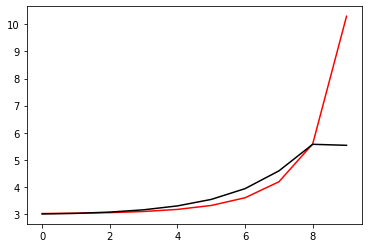

284900 0.02235906600322339
[2.89319454 2.90345079 2.9370933  3.00578384 3.12712143 3.33150327
 3.67164885 4.23703109 5.10881592 5.103342  ]


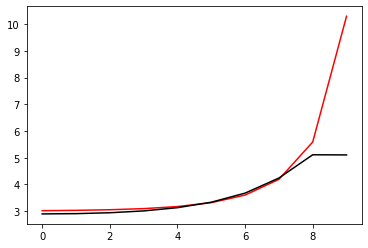

286000 0.03199286395980768
[2.93722692 2.95105904 2.98678844 3.05736114 3.18186451 3.39158915
 3.74062652 4.31971614 5.210329   5.21821202]


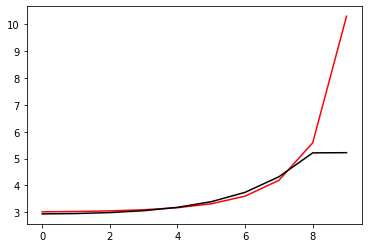

287100 0.03409099949743109
[2.96267063 2.98092559 3.02305523 3.10129734 3.23602331 3.46108909
 3.83421245 4.45019705 5.3909161  5.30002693]


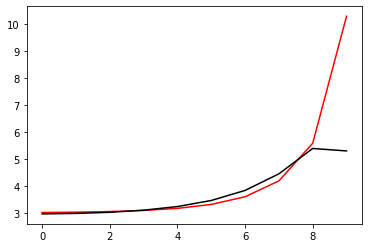

288200 0.03259768880315618
[2.97778215 2.99461337 3.03687411 3.11769707 3.25756937 3.49151333
 3.88043907 4.52548827 5.51498635 5.60276353]


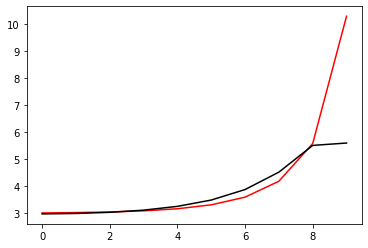

289300 0.0016728644946995045
[2.94133605 2.94847804 2.97107602 3.02742632 3.1368706  3.32720861
 3.6419178  4.15465409 4.99002778 5.16458128]


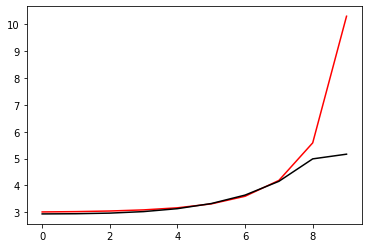

290400 0.02831170543438778
[2.97578715 2.98598416 3.01350356 3.07412796 3.18904831 3.38873227
 3.72112411 4.26008041 5.09412658 5.07071384]


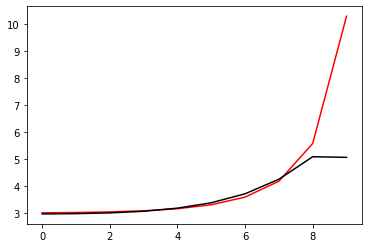

291500 0.021999851815979455
[3.00085915 3.01320946 3.04480155 3.10894163 3.22682771 3.43078302
 3.7719558  4.32778233 5.16733504 5.17990635]


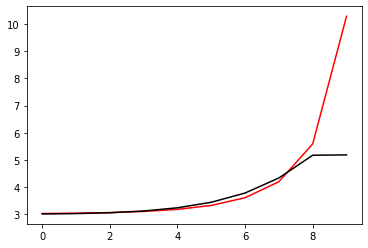

292600 0.05287185674343133
[2.96569658 2.98076253 3.0176819  3.08873758 3.21501015 3.43188329
 3.79877916 4.40738965 5.30855702 5.24434172]


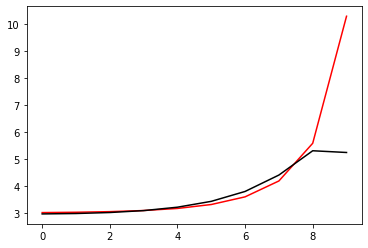

293700 0.019528284071672106
[2.90363586 2.92077456 2.96294404 3.04227416 3.17995412 3.41343972
 3.80904743 4.47449618 5.46801592 5.47626341]


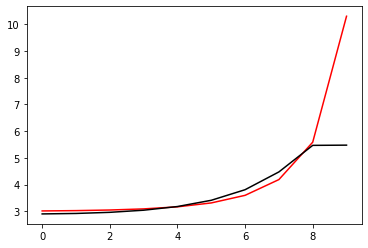

294800 0.016216307816371556
[2.95366581 2.93252831 2.92878967 2.96301988 3.05554546 3.23904262
 3.56516716 4.10035243 4.93331242 4.9206201 ]


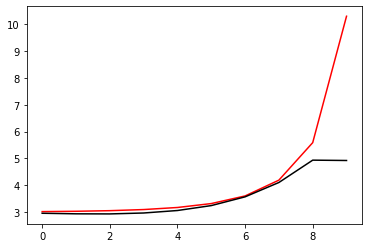

295900 0.023501967492932686
[2.95729821 2.95284336 2.95857442 2.99678861 3.09241474 3.27979075
 3.61228174 4.165119   5.0228322  5.01928839]


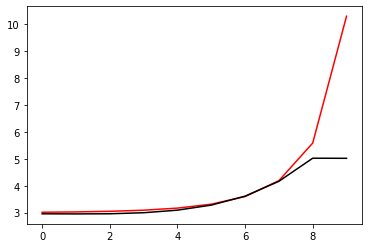

297000 0.03186897511185581
[2.9427962  2.94936217 2.96940229 3.01839576 3.12152368 3.31641218
 3.66096772 4.24186811 5.14250379 5.13288547]


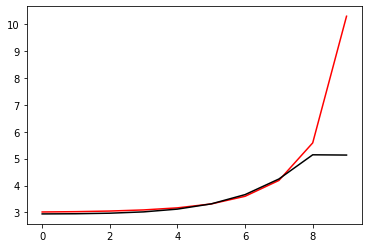

298100 0.04547518733098801
[2.90612552 2.91900762 2.95034577 3.01160699 3.122928   3.32001736
 3.66326486 4.25057975 5.17513036 5.38959158]


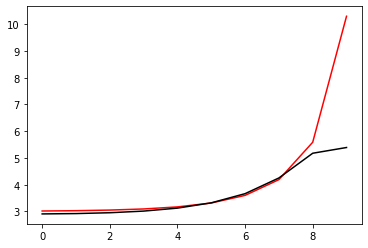

299200 0.0323716340187957
[2.98189342 2.99775994 3.03589058 3.10889937 3.23708041 3.45581327
 3.82745379 4.45598571 5.4367297  5.48007101]


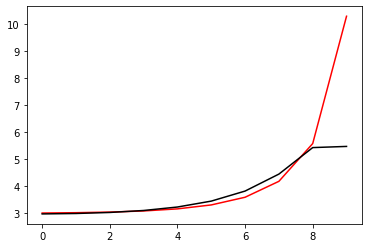

300300 0.0017547882650911712
[2.9177108  2.8977377  2.89861298 2.93695704 3.03207008 3.21473777
 3.53263815 4.05754755 4.92836167 4.94021348]


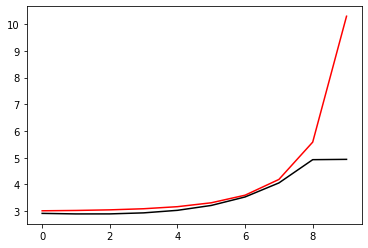

301400 0.032753677781853445
[3.0028229  2.99311083 2.99289312 3.02549751 3.11429818 3.29111343
 3.60558756 4.13576454 5.00858334 4.97726051]


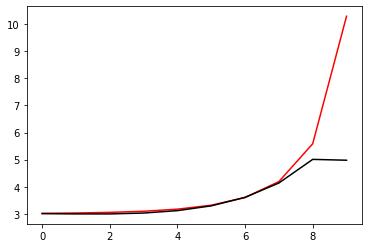

302500 0.02166365986914945
[3.05658864 3.06088769 3.07611319 3.1178815  3.21056636 3.38920573
 3.70760766 4.25218761 5.13809169 5.17236441]


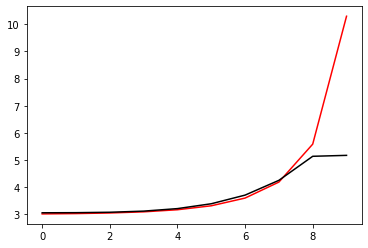

303600 0.052435892308195675
[2.95179621 2.96607975 3.00105792 3.06771089 3.18684889 3.39529167
 3.75512657 4.36677859 5.33829345 5.26625763]


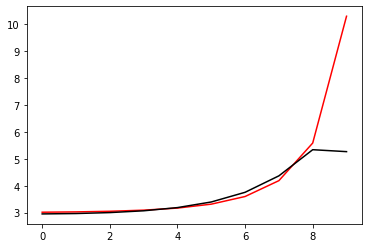

304700 0.01829611550866116
[2.89010571 2.90379622 2.94072991 3.01390708 3.14488591 3.37096103
 3.75791194 4.41679116 5.45566277 5.47341425]


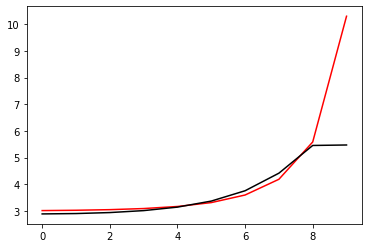

305800 0.01728520645641624
[2.96866473 2.97905635 3.00599838 3.06116705 3.16234542 3.33769825
 3.63731318 4.15934653 5.05568866 5.01696967]


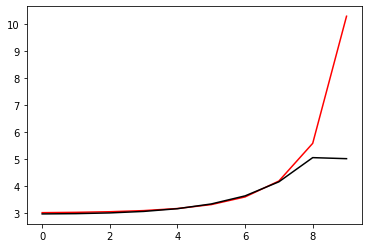

306900 0.03203134677832051
[3.02017822 3.03804587 3.07831202 3.1502156  3.27141541 3.47327599
 3.81132258 4.3820901  5.29325092 5.32116031]


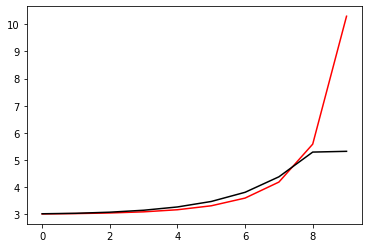

308000 0.03218810714556702
[2.92078967 2.93427953 2.97209696 3.04519188 3.17113811 3.38191767
 3.73576926 4.33370042 5.27575664 5.31507532]


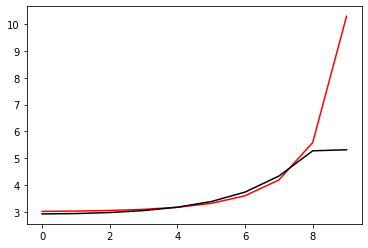

309100 0.034032709811666645
[2.95324647 2.96990831 3.01016107 3.08848195 3.22661869 3.46024866
 3.85146262 4.50464213 5.51524715 5.4436183 ]


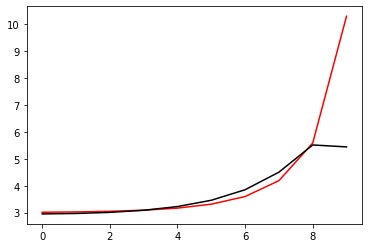

310200 0.040653276638294336
[2.92598071 2.91351021 2.92644759 2.97190039 3.06299862 3.22289925
 3.48835422 3.90921078 4.58891306 4.63170169]


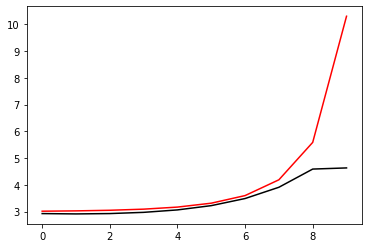

311300 0.0011340996370835603
[2.9512897  2.94685882 2.95813122 3.00076724 3.08975384 3.24831885
 3.51394934 3.94121097 4.62655238 4.6290459 ]


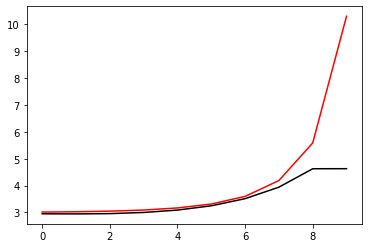

312400 0.03160421845912206
[2.99623331 3.00097429 3.01863521 3.06376276 3.15470149 3.31687351
 3.59007702 4.03577627 4.74236857 4.69965259]


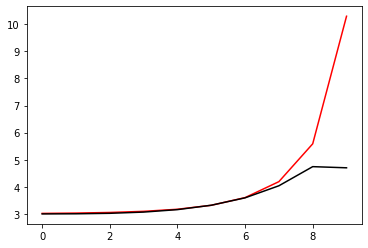

313500 0.021425875594698125
[3.05905026 3.0700522  3.09754038 3.15157497 3.24966831 3.41968326
 3.705851   4.17826094 4.91834924 4.94933152]


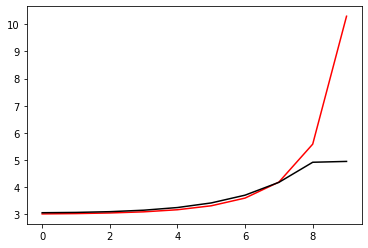

314600 0.06141955880654306
[3.05090383 3.06944163 3.10990951 3.17929609 3.29205722 3.47566597
 3.77820601 4.2790522  5.05857447 4.95807326]


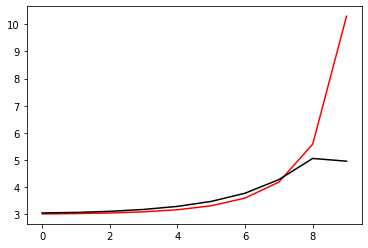

315700 0.031571005399625644
[3.03339791 3.05720291 3.10586121 3.1839409  3.30330048 3.48724638
 3.77910399 4.25528936 4.99532529 5.02717006]


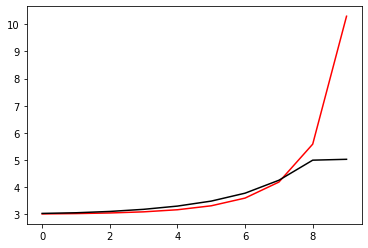

316800 0.01579218537599972
[3.02415653 3.04722219 3.09601291 3.17658279 3.30082952 3.49123875
 3.78941077 4.26801    4.99953166 4.95063812]


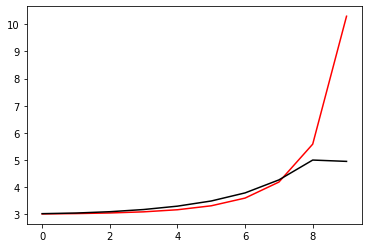

317900 0.03136359891365899
[3.01801181 3.03646143 3.07801444 3.14902961 3.26031248 3.43189263
 3.70125766 4.13537636 4.80109828 4.82276151]


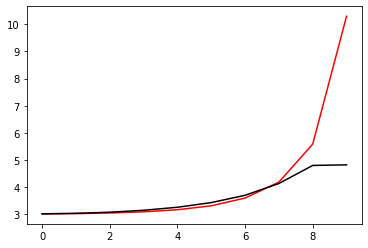

319000 0.07082918348038948
[3.0631898  3.09572262 3.15647854 3.25204425 3.39528541 3.61008921
 3.93835254 4.446783   5.1803759  5.0560094 ]


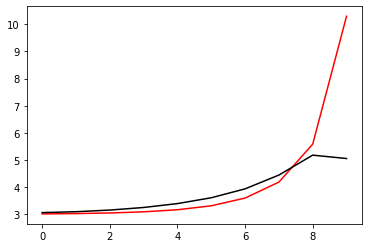

320100 0.03359364107081002
[2.98189158 3.01258631 3.0724148  3.17150515 3.32512554 3.55981792
 3.92159858 4.48275    5.2889113  5.09513126]


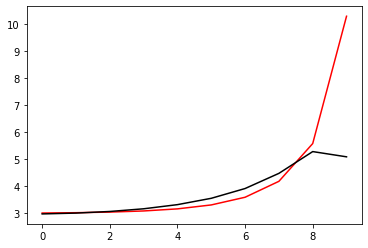

321200 0.03955390673149156
[2.92700396 2.91493698 2.93375963 2.99404675 3.10951885 3.30306956
 3.60966474 4.06889394 4.72008986 4.74920202]


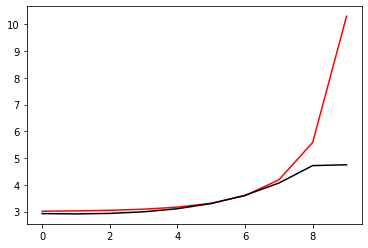

322300 0.0014897847230104793
[2.94693574 2.9467787  2.96637395 3.02451807 3.13831308 3.33155142
 3.64048064 4.11047602 4.7792747  4.78235426]


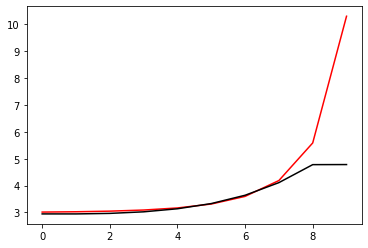

323400 0.022021079709381546
[3.02455242 3.03398684 3.06143613 3.12226664 3.23679301 3.43197205
 3.74706959 4.23530199 4.93400002 4.89371386]


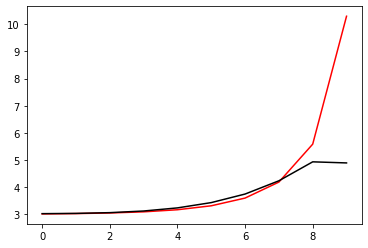

324500 0.02196238942661066
[3.00191642 3.01850187 3.05798355 3.13113394 3.25692486 3.46574521
 3.80406561 4.33800732 5.10945542 5.15475115]


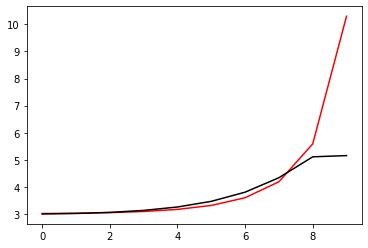

325600 0.05926726760912748
[3.05772829 3.07338538 3.11041616 3.18190338 3.30820363 3.52113869
 3.87267651 4.44300749 5.28676043 5.18086394]


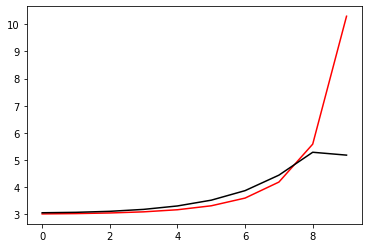

326700 0.03025654412064601
[3.01618739 3.0340693  3.07531289 3.14758348 3.26489854 3.45322746
 3.75932076 4.26361115 5.04480398 5.05928146]


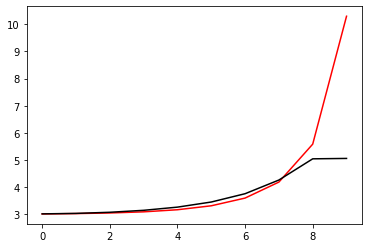

327800 0.0149454725137771
[2.95764203 2.98384966 3.04022749 3.13453104 3.28230535 3.51279133
 3.87794519 4.46189139 5.3298669  5.27415364]


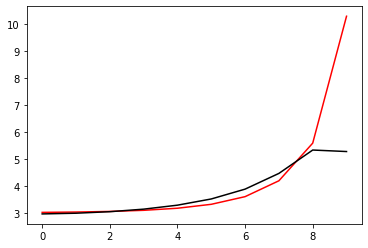

328900 0.023610582045623996
[2.86766062 2.88560805 2.93564239 3.0328361  3.19764776 3.46574434
 3.90132283 4.61238216 5.67374883 5.78370772]


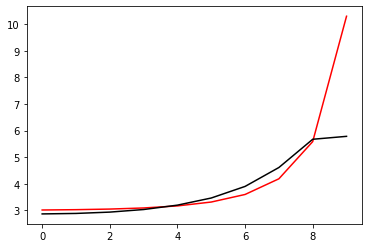

330000 0.03190280951264642
[2.90775802 2.94631133 3.0091181  3.10524188 3.25066449 3.46856813
 3.78167502 4.19006855 4.93647515 5.124986  ]


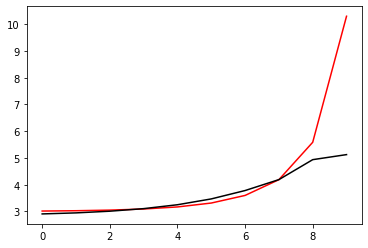

331100 0.034750468462922575
[2.92216489 2.95190613 3.01396636 3.11397539 3.26613373 3.49565987
 3.84255385 4.37284221 5.14210586 5.08581501]


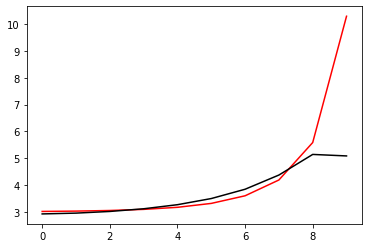

332200 0.03287914904509259
[2.95362549 2.97964452 3.03789676 3.13919444 3.30108732 3.55542148
 3.9612242  4.60668174 5.47221084 5.49155204]


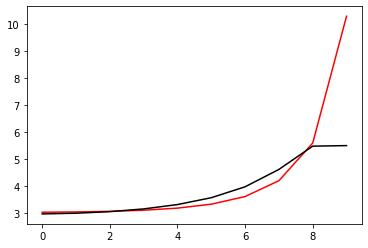

333300 0.0028034573143873634
[2.94529757 2.96538804 3.01401014 3.10393986 3.25528917 3.50103768
 3.89789041 4.54189984 5.51481292 5.5490355 ]


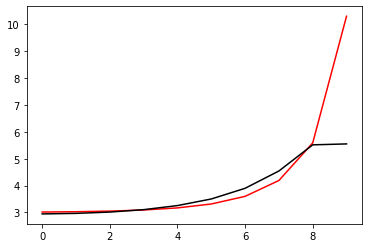

334400 0.022343257942683433
[2.97317388 3.01954906 3.09511872 3.20616815 3.37081433 3.61567901
 3.95585304 4.28560751 4.93188372 4.94121144]


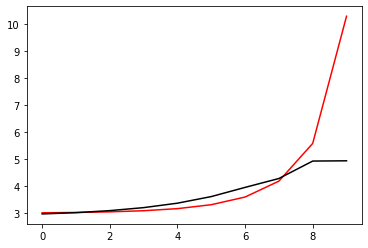

335500 0.022305482104089735
[2.97507459 3.01162691 3.08413427 3.19536834 3.35895602 3.59658201
 3.92585221 4.35743236 4.98516708 4.9937957 ]


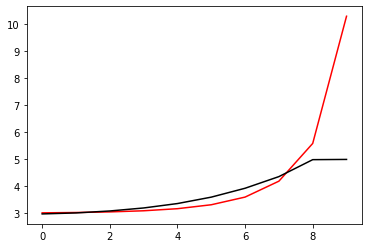

336600 0.053113157598324974
[2.91817416 2.94954    3.01834214 3.13057687 3.29846354 3.54649622
 3.92529732 4.53344914 5.22698419 5.19767702]


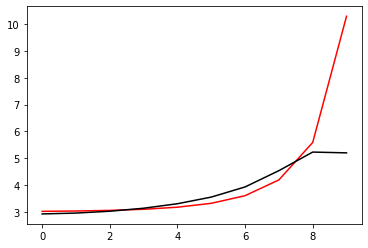

337700 0.020816564801497187
[2.90406448 2.928531   2.98692699 3.09030408 3.25549193 3.51242728
 3.91573496 4.55923689 5.43481404 5.43087951]


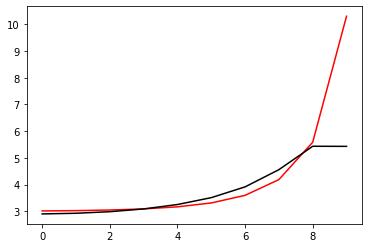

338800 0.0867930220294235
[2.79303053 2.81640818 2.86801596 2.96102563 3.11582142 3.36574715
 3.7643197  4.35982715 5.11913982 5.43834793]


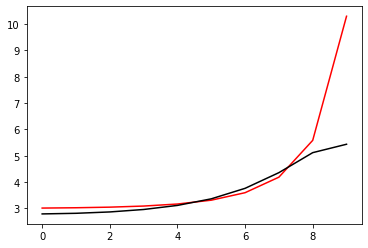

339900 0.02485447568479861
[2.9171213  2.9323686  2.97544087 3.06076403 3.20851401 3.45094676
 3.83813528 4.41974768 5.1662391  5.15494716]


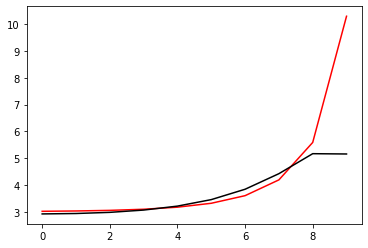

341000 0.0322664490034438
[2.9209575  2.93853141 2.98288051 3.06853888 3.2167059  3.46034982
 3.85047565 4.44752896 5.23378445 5.24098666]


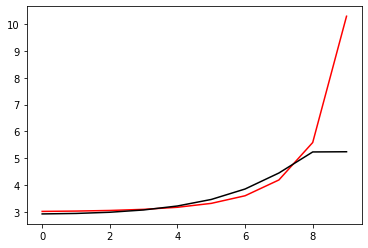

342100 0.03435863298424112
[2.92848319 2.94798478 2.99476178 3.08251167 3.23302945 3.48088777
 3.88056441 4.50548525 5.35653811 5.31539193]


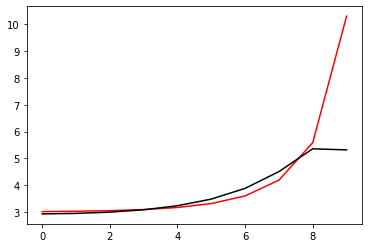

343200 0.03283549505193774
[2.9532406  2.97149835 3.0177831  3.10644388 3.25957576 3.51356463
 3.92813861 4.59139858 5.53279732 5.61030626]


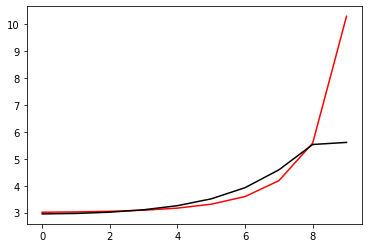

344300 0.002867153281598712
[2.91667501 2.93583526 2.98096771 3.066223   3.21396387 3.4597508
 3.86425168 4.53073441 5.55112558 5.59557189]


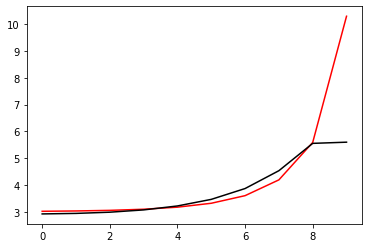

345400 0.023005119082396636
[3.00150738 3.02387177 3.07243979 3.1607469  3.31097972 3.56059889
 3.97367871 4.6584152  5.72348679 5.62252485]


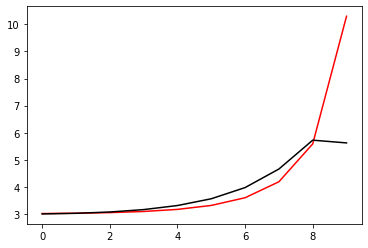

346500 0.022264870103107806
[2.98240012 3.0158088  3.07949126 3.17886335 3.33040225 3.56000823
 3.89603936 4.36146151 5.13753434 5.15424904]


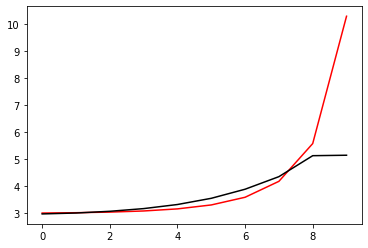

347600 0.053192411109239675
[2.93597009 2.9632165  3.02381244 3.12514267 3.28183759 3.52161367
 3.8962589  4.50569639 5.34788782 5.30976452]


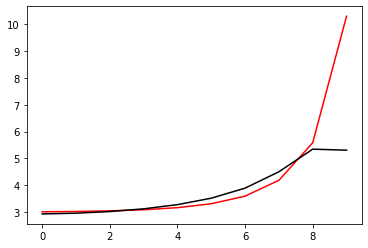

348700 0.020468406106996552
[2.90618539 2.9282358  2.98159531 3.07752769 3.23385336 3.48240043
 3.88257736 4.54195827 5.51623056 5.50738011]


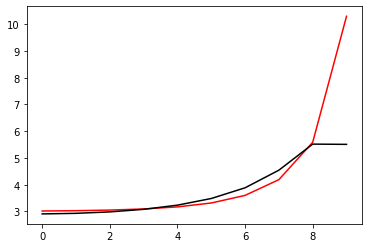

349800 0.6421633242112783
[3.2561596  3.26478788 3.30210944 3.38211573 3.52707807 3.77488606
 4.19235732 4.82599358 5.55317671 5.73946273]


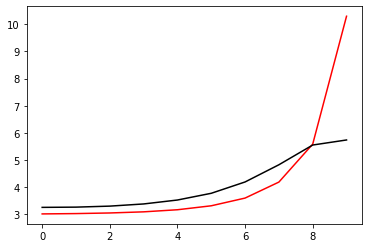

350900 0.022271737036599955
[2.90955982 2.91153616 2.93135513 2.98710838 3.10184152 3.31137841
 3.67433837 4.26149915 5.0525534  5.04495132]


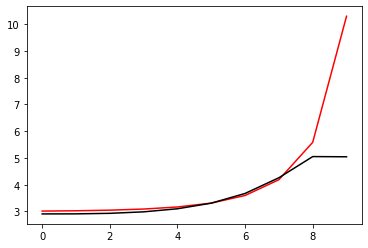

352000 0.0322552194352582
[2.92446382 2.93184482 2.96006429 3.02451627 3.14876574 3.3709356
 3.7522524  4.37900545 5.26803083 5.29689478]


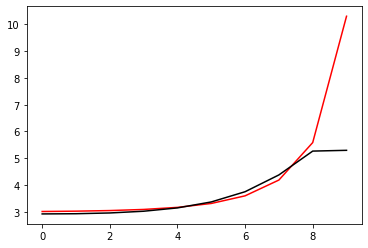

353100 0.03351661502062931
[3.00528881 3.02941212 3.07585952 3.16020444 3.30574813 3.55024003
 3.95594497 4.61868848 5.58922087 5.41285396]


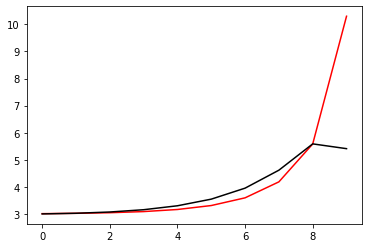

354200 0.032584881115999394
[2.95142732 2.98381421 3.04643527 3.14531579 3.29669658 3.53067966
 3.89930391 4.48496988 5.36031305 5.34780167]


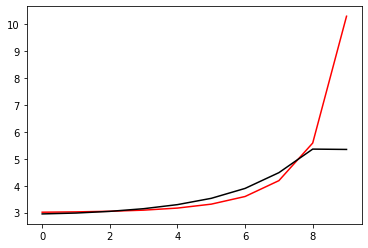

355300 0.002745789654666425
[2.96748392 2.99092244 3.04397498 3.13716725 3.28892565 3.53079267
 3.9184012  4.5454184  5.49066688 5.53445402]


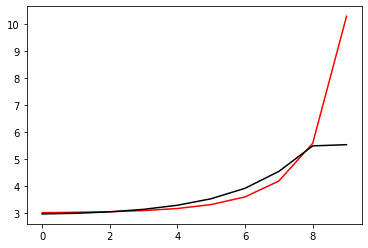

356400 0.022720055772470236
[3.05169963 3.0319856  3.03020252 3.06932347 3.16979122 3.36359818
 3.70463516 4.26949666 5.11092718 5.08871941]


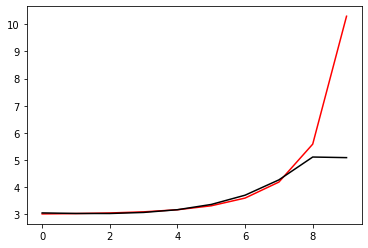

357500 0.021905713789646536
[3.03617304 3.03775314 3.05107677 3.09659249 3.20053629 3.39861158
 3.74689541 4.32971553 5.20664695 5.21503083]


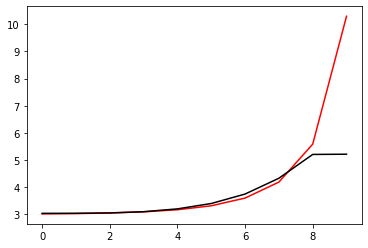

358600 0.05345127630672236
[2.98689191 2.99776555 3.02678016 3.08730093 3.20323851 3.41358795
 3.78086416 4.40091919 5.34539946 5.30509263]


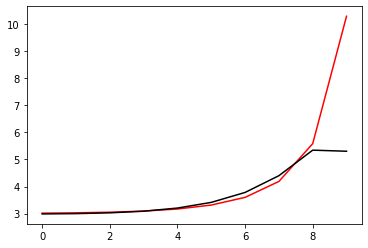

359700 0.017890850916451206
[2.88224781 2.89665302 2.93554285 3.01196731 3.14791558 3.38225608
 3.78285728 4.45944549 5.4998867  5.5012541 ]


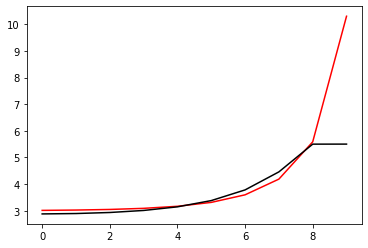

360800 0.08627325198807696
[2.76814567 2.7993535  2.86286957 2.96585279 3.13090578 3.39821211
 3.83789729 4.56427613 5.67725468 5.5563208 ]


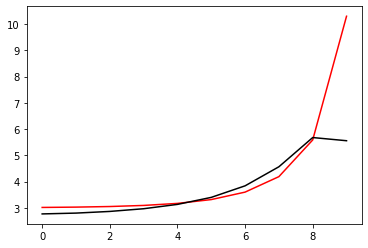

361900 0.026187880590750348
[2.97161184 2.96106844 2.97514779 3.02729134 3.13359127 3.32066908
 3.62829137 4.09968219 4.93774594 4.9279655 ]


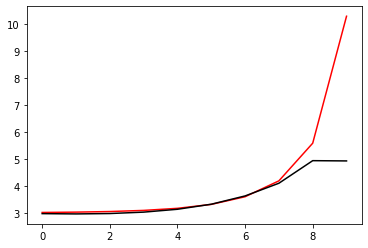

363000 0.03152849604826438
[2.96961985 2.97416774 2.99546633 3.05077826 3.16027399 3.35214987
 3.66912196 4.17244363 5.02679786 5.03434104]


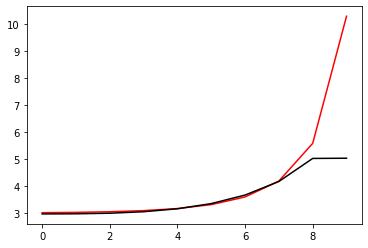

364100 0.0353628728292519
[2.94829055 2.96456308 3.00141291 3.07157677 3.19609882 3.40746048
 3.75616624 4.32191452 5.23202304 5.14410136]


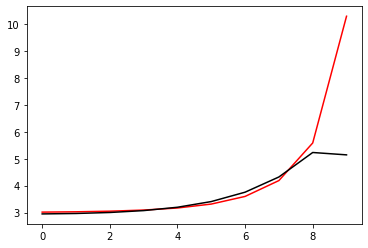

365200 0.032469468061654565
[3.00302781 3.02514485 3.07352688 3.15818528 3.29786173 3.52543893
 3.89736698 4.50712969 5.45962268 5.54771819]


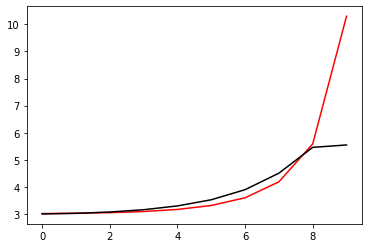

366300 0.0016554325822456892
[2.90650302 2.89656    2.91204822 2.96617266 3.0756838  3.26728428
 3.58025624 4.06646353 4.87132166 4.87895038]


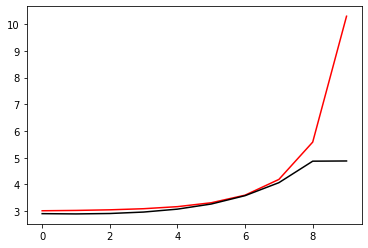

367400 0.02508807947642218
[3.0209928  3.01843009 3.0294414  3.07495756 3.17598145 3.36049441
 3.67047608 4.1679119  4.97677612 4.94040026]


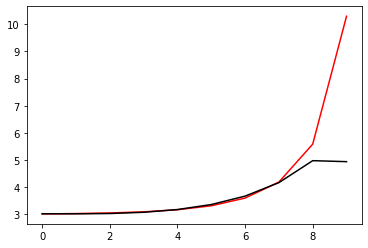

368500 0.0216891442347006
[3.04633045 3.05551026 3.07992836 3.13342554 3.23804508 3.42572793
 3.74450141 4.26900047 5.10346512 5.13652362]


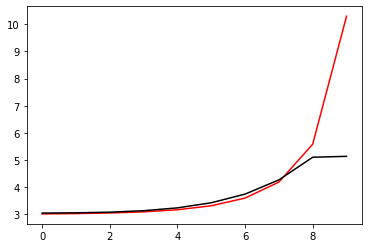

369600 0.05394058406016643
[2.98013406 2.99639898 3.03601423 3.10929326 3.23492223 3.44582682
 3.797843   4.38076078 5.2875258  5.23686005]


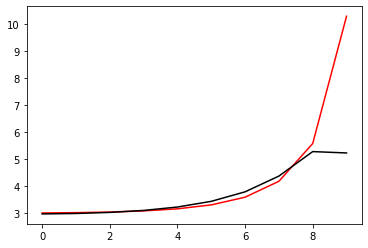

370700 0.01879438701495983
[2.91519978 2.90250529 2.90727097 2.94664801 3.03750022 3.20661452
 3.49734924 3.98125244 4.77330367 4.76842328]


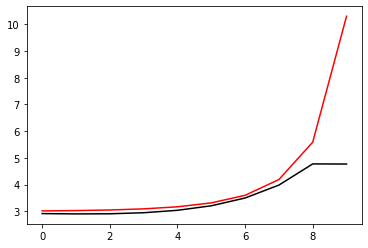

371800 0.018098725694395208
[2.99541434 2.99367746 3.00136039 3.03848165 3.1270968  3.29647181
 3.59297509 4.09332634 4.90373981 4.88905828]


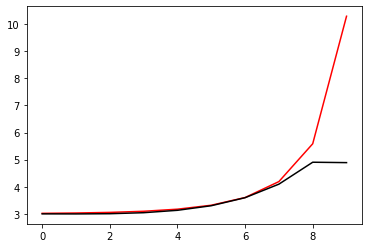

372900 0.03125922607263303
[3.00634261 3.01632374 3.04008335 3.08952255 3.18592954 3.36211614
 3.66986863 4.19354299 5.03230039 5.07894641]


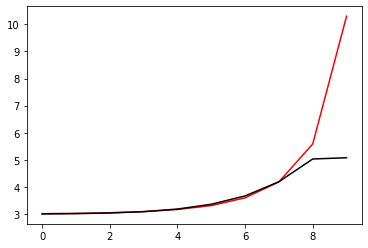

374000 0.06191771000675174
[3.09149181 3.10787824 3.14426519 3.20922286 3.31928792 3.50502922
 3.82094681 4.3593644  5.21825935 5.15774411]


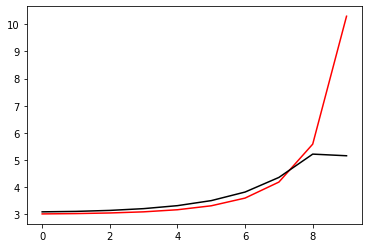

375100 0.03434623770769514
[2.98147764 2.99612328 3.03451887 3.10816518 3.23387996 3.44176734
 3.78654105 4.36267775 5.26470825 5.19344949]


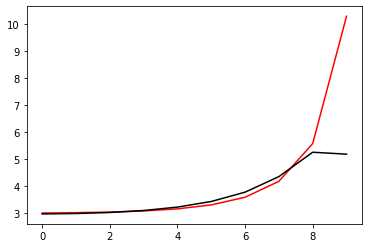

376200 0.07260204935605431
[2.76908763 2.79726641 2.852774   2.94258483 3.08302793 3.30387117
 3.65941158 4.24557852 5.16403102 5.1779329 ]


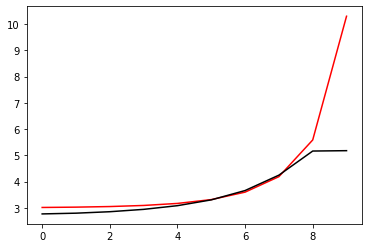

377300 0.05239266392340978
[2.81686474 2.81534328 2.83824659 2.89650036 3.00418293 3.18543673
 3.48058685 3.95690941 4.72025522 4.79075335]


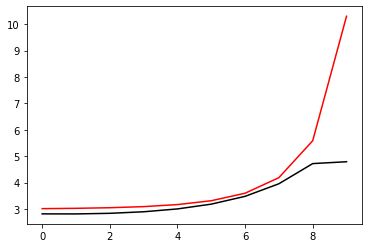

378400 0.03365105513720645
[2.98573745 2.98673423 3.00272749 3.0505806  3.14732806 3.31725304
 3.6007904  4.06659238 4.80962126 4.7683797 ]


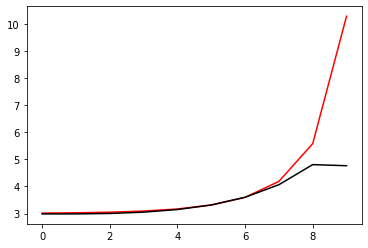

379500 0.0215410961182755
[3.04785751 3.05911549 3.08701035 3.14338335 3.24693751 3.42559111
 3.72422814 4.21786756 4.99405204 5.02187445]


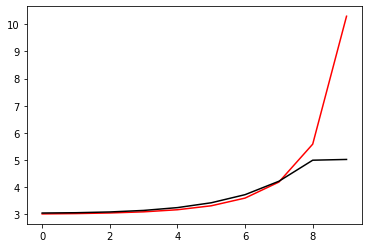

380600 0.055095958431811934
[2.99544111 3.00981165 3.04536546 3.11159492 3.22520124 3.41554119
 3.73343931 4.26400685 5.09470832 5.05261864]


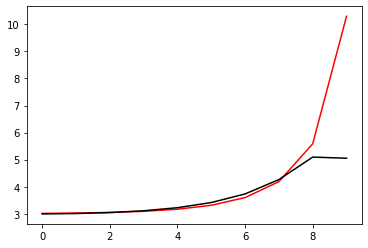

381700 0.019706199502048497
[2.94865433 2.93194695 2.93330046 2.96589445 3.04392734 3.19097443
 3.44564428 3.87237431 4.57202336 4.57071156]


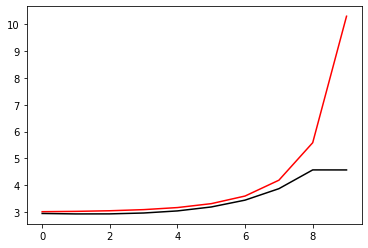

382800 0.018429909669348505
[2.95889332 2.95467908 2.96060277 2.99415284 3.07296587 3.22174399
 3.48085278 3.91807896 4.62954716 4.62004316]


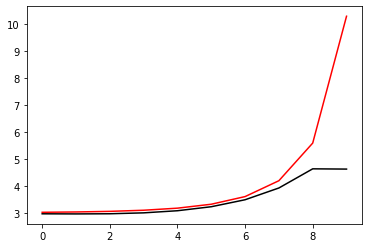

383900 0.024743347109954423
[2.95503647 2.96180273 2.980656   3.02447161 3.11299067 3.27471267
 3.55459083 4.02677225 4.78260597 4.80005314]


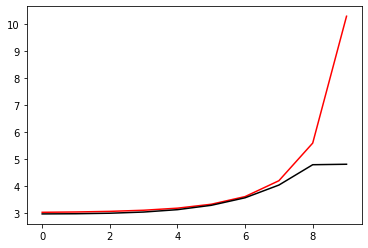

385000 0.031664926797833955
[2.91882844 2.93440244 2.96983775 3.03192042 3.13784888 3.3179318
 3.62295664 4.13622485 4.94703752 4.90391777]


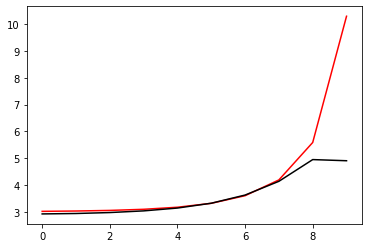

386100 0.07965694287813027
[2.7751025  2.80952197 2.86752418 2.9559002  3.08870101 3.29347204
 3.6211899  4.16071114 5.0030181  5.20764021]


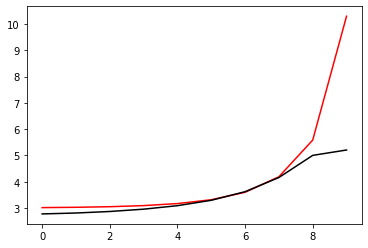

387200 0.03881520148685848
[2.8923033  2.91577367 2.96311116 3.03895349 3.15450746 3.33166381
 3.61248961 4.07516239 4.81127528 4.83005445]


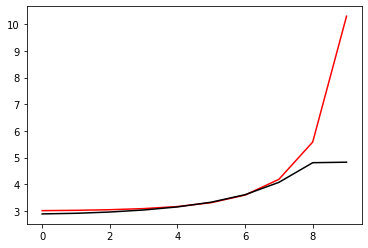

388300 0.002136680080945171
[2.97287319 2.99337593 3.04035654 3.1233811  3.25822459 3.47201809
 3.81308811 4.36347028 5.19507845 5.22907703]


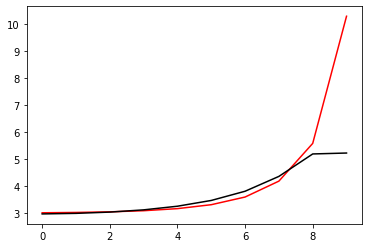

389400 0.02182867711551103
[3.03280215 3.03995627 3.06771284 3.1295161  3.24161368 3.42985152
 3.73434099 4.19859901 4.83543357 4.82684605]


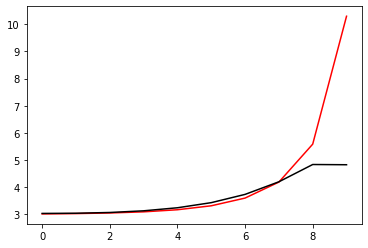

390500 0.021926535572249016
[2.99751949 3.01600296 3.0562836  3.13015988 3.25670798 3.46511094
 3.80035736 4.32286979 5.05040304 5.06597762]


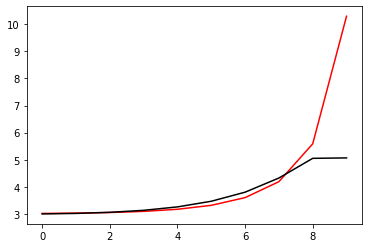

391600 0.05980187851037993
[3.01276438 3.02981423 3.07077327 3.14741849 3.27986321 3.50055547
 3.86193741 4.44148279 5.27423601 5.20704133]


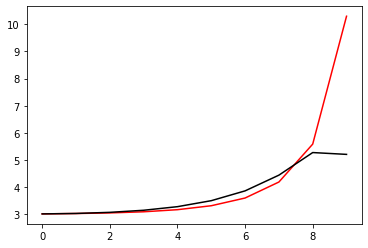

392700 0.01898220156382023
[2.91636674 2.90683514 2.9160393  2.96255658 3.0652024  3.25204745
 3.56222731 4.03814646 4.75826519 4.75357466]


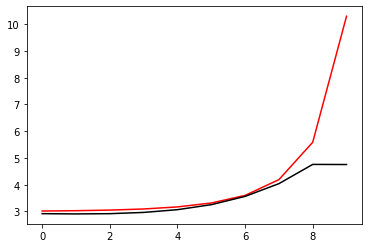

393800 0.017645073494281384
[2.98052426 2.98477605 3.00242684 3.05163348 3.15524496 3.34348611
 3.65914401 4.15715279 4.90476898 4.88403757]


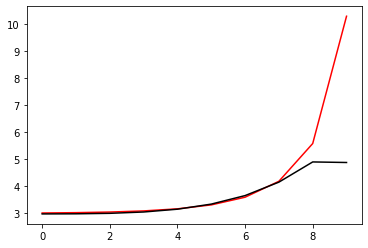

394900 0.031051308894531768
[2.982194   2.99680983 3.02967967 3.09181112 3.20397531 3.39883927
 3.72574428 4.25481446 5.04824428 5.08881386]


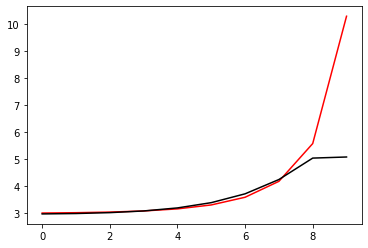

396000 0.16974673235675208
[2.74177439 2.75109166 2.78406883 2.84850879 2.96082529 3.15040027
 3.46889287 4.00298597 4.83336815 5.08405409]


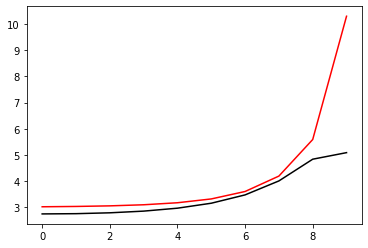

397100 0.04329317984024027
[2.93301539 2.94784781 2.98257816 3.0468375  3.15569781 3.33538573
 3.63213536 4.12304829 4.87808578 4.80540074]


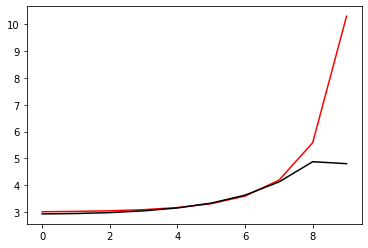

398200 0.03229530419832502
[2.97740047 3.00244473 3.05330612 3.13932551 3.27797825 3.4996845
 3.85708598 4.43382623 5.28760412 5.35107006]


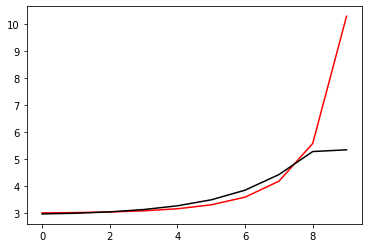

399300 0.059066107902719794
[2.8016437  2.79710971 2.81659501 2.87475757 2.98914452 3.18762869
 3.51065147 4.00915972 4.79606764 4.81507801]


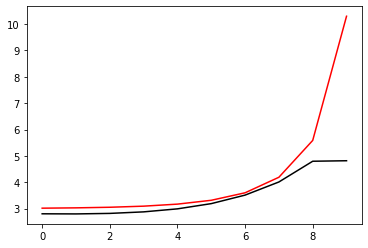

400400 0.041912283347744626
[2.95828887 2.94975681 2.95659195 2.99951495 3.09783542 3.2786127
 3.58201219 4.06292183 4.82266643 4.7956464 ]


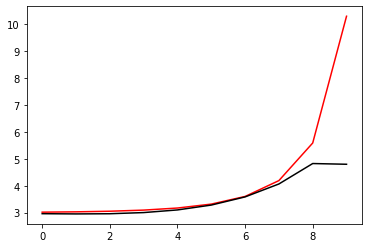

401500 0.021936697673484405
[3.01615696 3.02012942 3.03660078 3.08348655 3.18321696 3.36532711
 3.67315038 4.17027078 4.94735467 4.95866282]


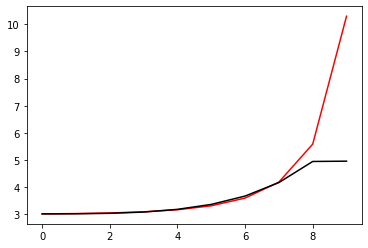

402600 0.05869227249665373
[3.02329992 3.03398932 3.06158729 3.11845034 3.22570533 3.41605008
 3.73958475 4.27252952 5.09845213 5.05690957]


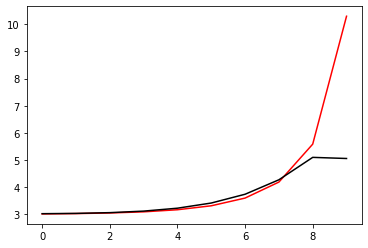

403700 0.020897140352378486
[2.94050487 2.95544874 2.99305492 3.06465155 3.18924054 3.3998899
 3.75339024 4.34123444 5.24776377 5.27909346]


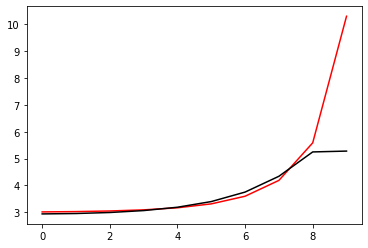

404800 0.01845208870991123
[2.97725619 2.96168948 2.96101698 2.99327268 3.07676485 3.23907569
 3.52374532 3.99726148 4.76439006 4.75271134]


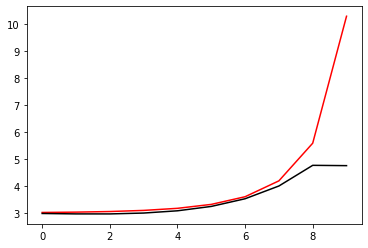

405900 0.025909643982876426
[2.96681504 2.96931563 2.98292814 3.02447138 3.11657079 3.29038774
 3.59392805 4.1023063  4.91103011 4.91461446]


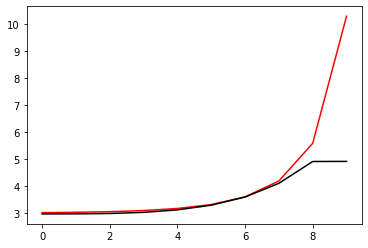

407000 0.021324399686270465
[3.08289709 3.09449498 3.12103279 3.1729101  3.26938136 3.44248311
 3.74432895 4.25842919 5.07513348 5.0063309 ]


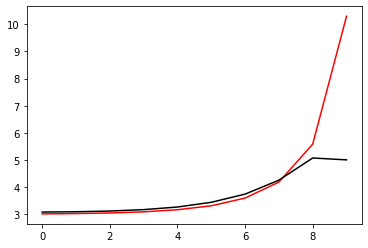

408100 0.03417351671777743
[3.01584333 3.03052712 3.06673218 3.13562668 3.25361541 3.4505197
 3.78017972 4.33444625 5.2060452  5.15533385]


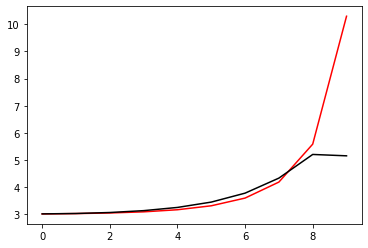

409200 0.038581827992131466
[2.94565219 2.93559289 2.94722987 2.99332366 3.09196946 3.27271748
 3.5803144  4.04902142 4.70149474 4.76005691]


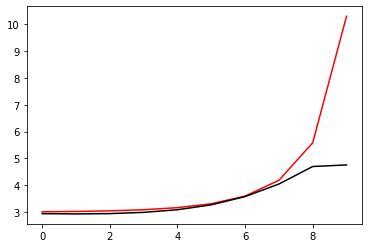

410300 0.0014296791711965223
[2.97096402 2.9745549  2.99247022 3.04150073 3.14246952 3.32556219
 3.63583248 4.12139568 4.80401495 4.81126612]


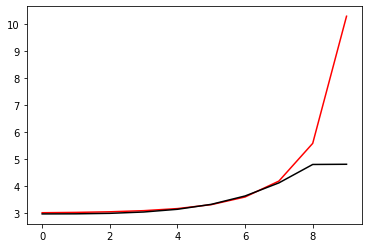

411400 0.021723532514794114
[3.03786521 3.05039816 3.08040769 3.1397553  3.2488577  3.43953906
 3.75995599 4.27305302 5.0060137  4.96850358]


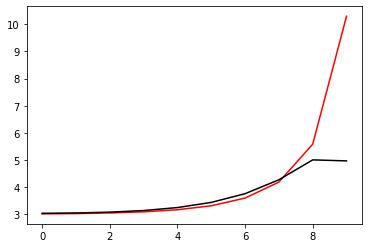

412500 0.02213145548544802
[3.03928586 3.05847404 3.10103812 3.17644378 3.30220939 3.50934809
 3.85000241 4.4022464  5.20932723 5.27421433]


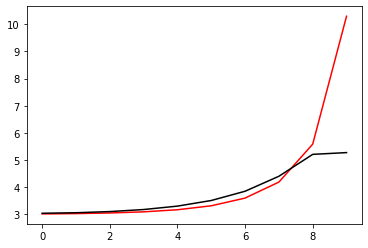

413600 0.05410221382449468
[2.96149768 2.98851922 3.04500305 3.13447634 3.26970836 3.47614177
 3.79877511 4.30926994 5.05462715 5.02478442]


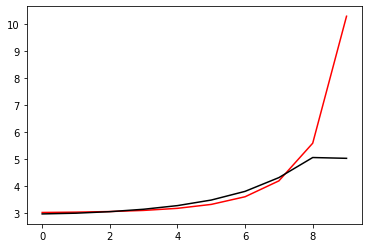

414700 0.048005072556158906
[2.78709784 2.82049855 2.88427567 2.98520007 3.13807176 3.37009947
 3.73044352 4.29988107 5.13345185 5.36382761]


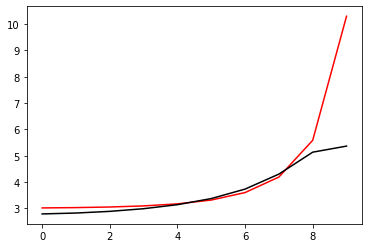

415800 0.014530592665847414
[2.90139735 2.92492324 2.97995692 3.07473803 3.22418967 3.45623189
 3.82107347 4.40076956 5.25400304 5.18272321]


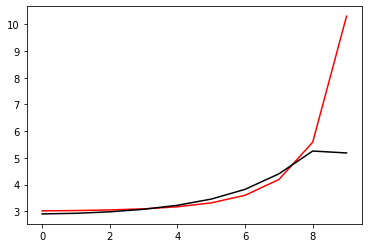

416900 0.0323841391713444
[2.85332224 2.86699978 2.91088291 2.99830902 3.15028925 3.40301927
 3.82042567 4.50415042 5.51059285 5.49117986]


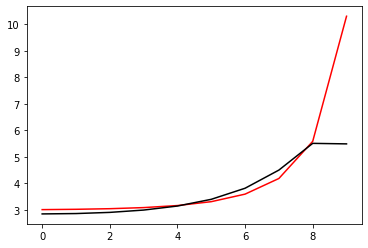

418000 0.0315064068267224
[2.96949489 2.97027265 2.98738815 3.04005231 3.14971998 3.34615617
 3.6716326  4.1647182  4.9010008  4.90652609]


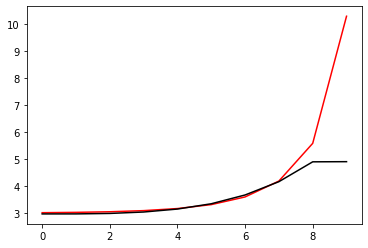

419100 0.03739278150481244
[2.92881645 2.94473236 2.98183189 3.05342657 3.18136961 3.39913594
 3.75585087 4.31515662 5.13025698 5.05924815]


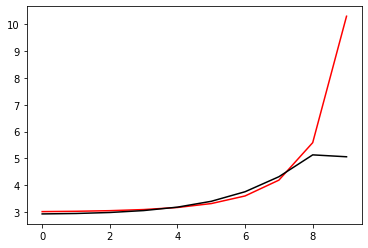

420200 0.041022793366816496
[2.92293675 2.90097688 2.90279031 2.94117468 3.03356501 3.20735578
 3.50313844 3.98009544 4.71624214 4.78496187]


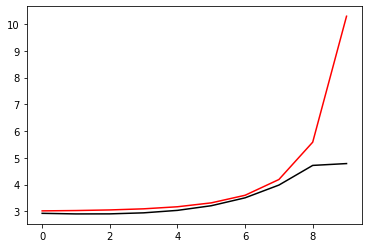

421300 0.0012659491305440278
[3.01425299 2.9996475  2.99503257 3.02342351 3.10564828 3.269752
 3.55825331 4.03471579 4.77287    4.78052619]


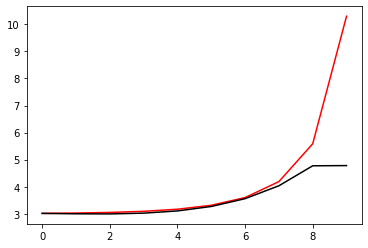

422400 0.021701982844906202
[3.05481432 3.05878481 3.07263313 3.11274163 3.2027482  3.37473892
 3.67618968 4.17879162 4.95386716 4.91226661]


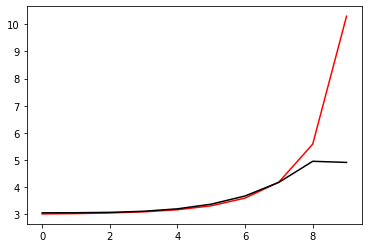

423500 0.021667409911523248
[3.03672307 3.04940219 3.0792994  3.13595658 3.2383521  3.41923418
 3.73194102 4.25950024 5.07682051 5.0928062 ]


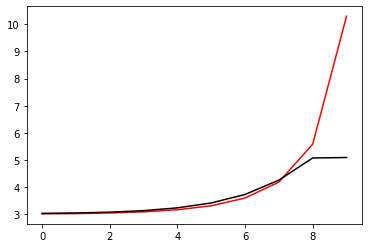

424600 0.06084473511833678
[3.03212237 3.04938617 3.08938584 3.16192931 3.2840466  3.48658767
 3.82498158 4.39247529 5.27419138 5.21163819]


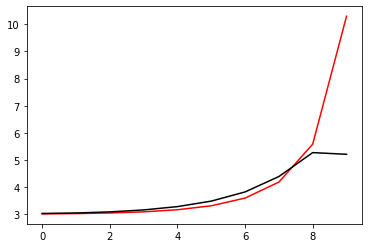

425700 0.02122568294498942
[2.96973752 2.99018907 3.03098598 3.09889129 3.20691813 3.37682794
 3.64288002 4.05781316 4.72579188 4.71896478]


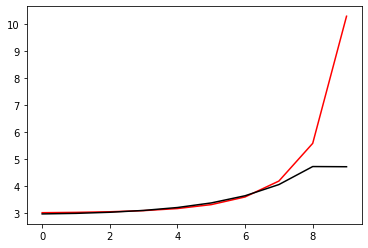

426800 0.017475014097953132
[2.96580727 2.98575682 3.02810651 3.09961953 3.21375995 3.39452684
 3.68317098 4.14453703 4.83485139 4.81454415]


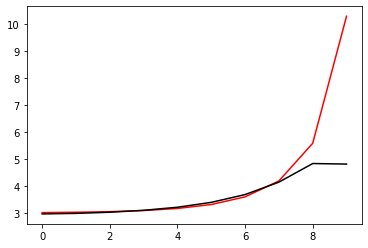

427900 0.025141987551066128
[2.92304305 2.94406975 2.9892259  3.06629054 3.19016331 3.38831045
 3.71114289 4.24018399 4.99594586 5.00238592]


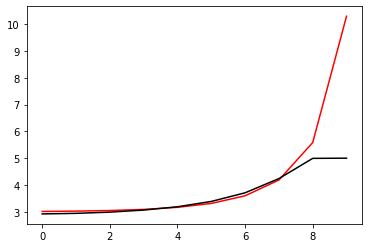

429000 0.03223597255173921
[2.90135513 2.92123305 2.96730569 3.04902336 3.18322866 3.4005406
 3.75672484 4.34277924 5.18434605 5.19655474]


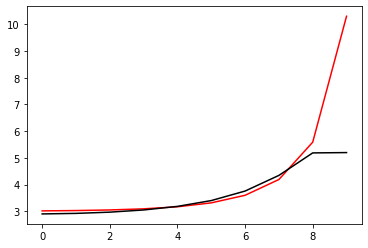

430100 0.09083451739678605
[2.80369652 2.79834159 2.82141634 2.88385288 3.00376817 3.21130557
 3.5515868  4.063608   4.83148654 5.23423981]


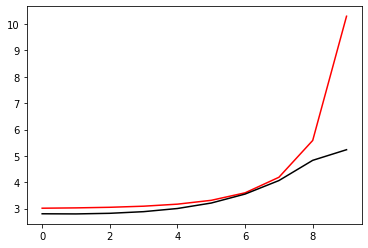

431200 0.03359600661820734
[2.9813956  2.96849293 2.97136806 3.01140042 3.10776624 3.2887073
 3.59686636 4.07796223 4.8053486  4.78553085]


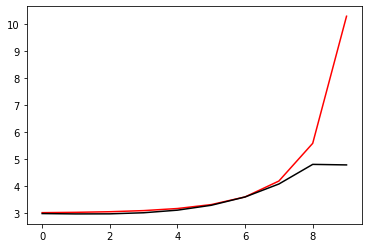

432300 0.0015008636680313267
[3.00501848 3.00790235 3.02311639 3.0689559  3.16861061 3.35285532
 3.66661437 4.16821018 4.92304955 4.92041055]


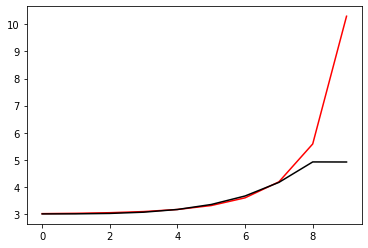

433400 0.022261492154660577
[3.00849438 3.02323823 3.05710652 3.12133965 3.2370924  3.43839147
 3.77723582 4.32816633 5.15436658 5.109089  ]


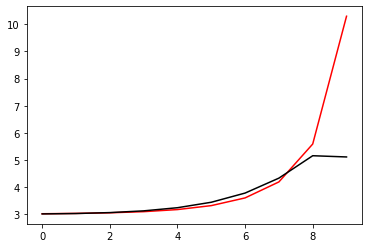

434500 0.02179896192375574
[3.04669828 3.05519539 3.0803382  3.13623414 3.24328209 3.43351275
 3.76115521 4.3148877  5.17270075 5.18366817]


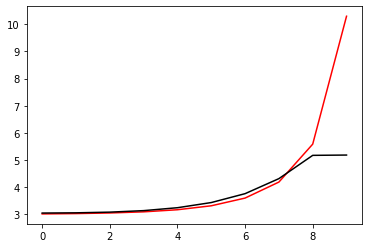

435600 0.054581451465587565
[3.03780933 3.02359948 3.02146646 3.0501016  3.12938207 3.28949186
 3.57818458 4.06424754 4.8051239  4.79253399]


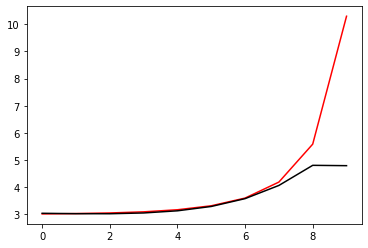

436700 0.020843828318783973
[2.97737259 2.98263524 2.99759586 3.03914403 3.13005863 3.30293541
 3.60869903 4.12323979 4.90807455 4.9028876 ]


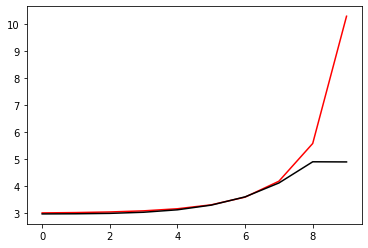

437800 0.016898271555662862
[2.96652623 2.97808449 3.0061088  3.06204337 3.16682985 3.35520493
 3.68318796 4.23650346 5.08367455 5.02485512]


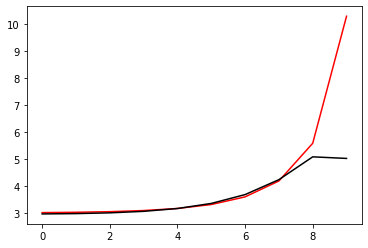

438900 0.027229237017946176
[2.85405436 2.87824684 2.92888088 3.01215657 3.14663312 3.36668606
 3.73220336 4.33953478 5.26766445 5.25468599]


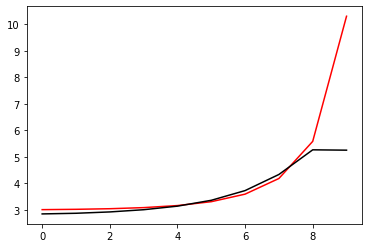

440000 0.03155720274141909
[2.95385037 2.94278882 2.94626486 2.97949045 3.05755213 3.20670051
 3.47274939 3.93352033 4.68284397 4.68123879]


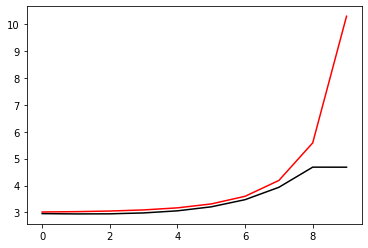

441100 0.047203967542223293
[2.95846138 2.95994917 2.97184842 3.0095919  3.09230179 3.24801382
 3.52427024 4.00203451 4.77367198 4.74970787]


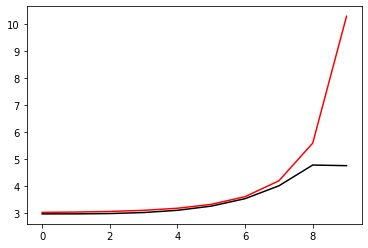

442200 0.03173963002350408
[2.977379   2.98920119 3.01647192 3.06949945 3.16726236 3.34094624
 3.64253196 4.15873106 4.98098288 5.03278882]


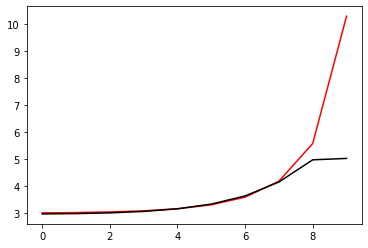

443300 0.0013120042263267408
[2.92239529 2.92943369 2.95282621 3.00151462 3.09009396 3.24503716
 3.5144337  3.98838188 4.78644811 4.8013572 ]


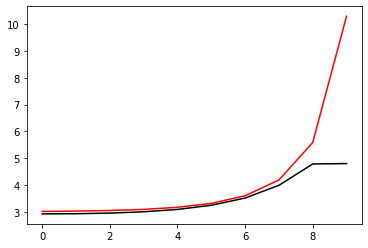

444400 0.02175480490832432
[3.02794012 3.04682099 3.08329075 3.14654776 3.25276261 3.42960168
 3.72613977 4.22918913 5.04061057 4.94705911]


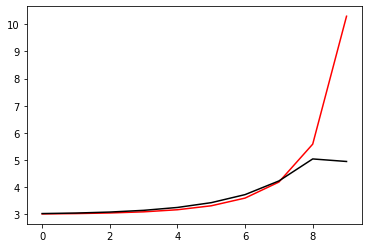

445500 0.03206946676689164
[2.92117466 2.91715077 2.92725453 2.96608082 3.0494856  3.20296037
 3.46992016 3.92819461 4.70876512 4.6931587 ]


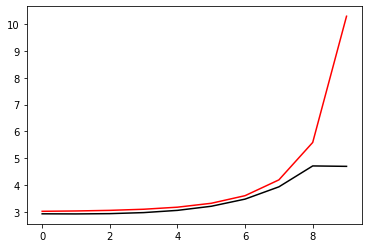

446600 0.062316604330699917
[3.07415296 3.07409449 3.08282817 3.11394004 3.18603173 3.32623549
 3.57977634 4.02680751 4.77673313 4.73277272]


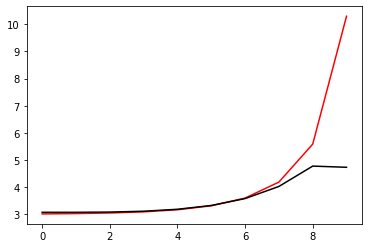

447700 0.025188193833967667
[3.00516131 3.02177539 3.05725733 3.11766162 3.21807788 3.38691438
 3.6743543  4.16717602 4.96249904 4.98026409]


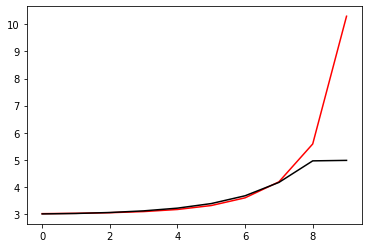

448800 0.013939525773238686
[2.88946658 2.91130259 2.95920974 3.03931097 3.16574891 3.36667154
 3.69437015 4.23861277 5.0840536  5.00104125]


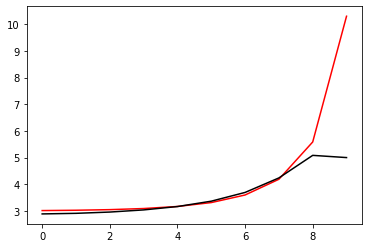

449900 0.04578459428463079
[2.84664373 2.85875978 2.89882845 2.97958986 3.12036413 3.35471535
 3.74280257 4.38235374 5.34462833 5.31619118]


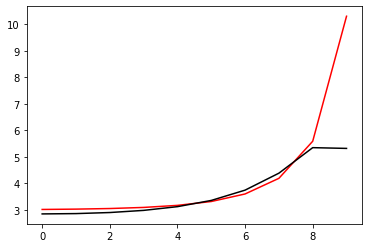

451000 0.03154107099067257
[2.95018053 2.93685953 2.93942011 2.97830311 3.07127533 3.24375273
 3.53390232 3.9871359  4.69168067 4.69146284]


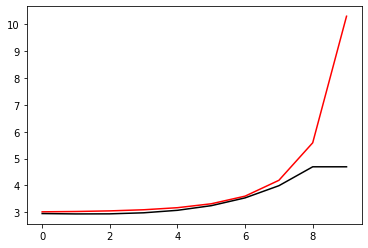

452100 0.03792028933646695
[2.99121023 2.99415642 3.00881766 3.05334767 3.14990498 3.32706042
 3.62615673 4.1037201  4.83683916 4.78412048]


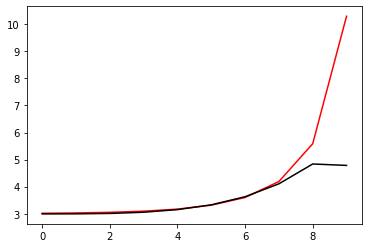

453200 0.031834332258308055
[2.97033308 2.9837284  3.01513779 3.07592358 3.18685342 3.38051451
 3.70616273 4.23550146 5.03867837 5.04643673]


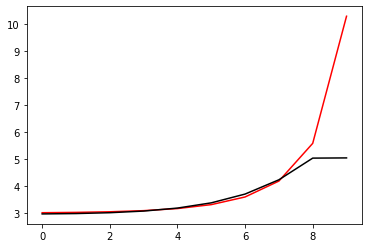

454300 0.0015717154748288898
[3.02869216 3.0505167  3.09275152 3.16109537 3.27044608 3.44747896
 3.73781308 4.21720844 4.96358605 4.95667551]


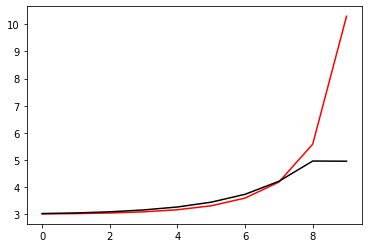

455400 0.02202754124811797
[3.00825754 3.02934361 3.07451429 3.1515287  3.27554033 3.47405855
 3.79655459 4.32749573 5.14502958 5.12671224]


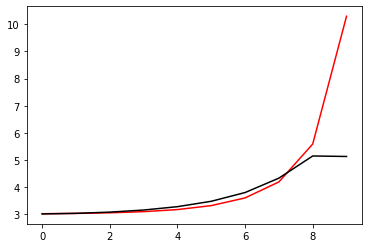

456500 0.03220401417690368
[2.92542081 2.90891282 2.91158876 2.95061342 3.04336836 3.21722248
 3.51315467 3.96865184 4.66178231 4.65346052]


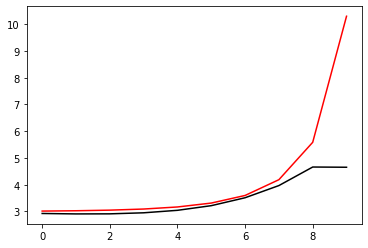

457600 0.05627001515021299
[3.04161944 3.03295589 3.03271766 3.06308362 3.14616381 3.31048131
 3.59766043 4.05689002 4.7553333  4.74297134]


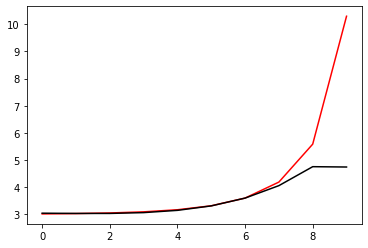

458700 0.020993813507215756
[2.9754427  2.98406639 3.00587735 3.05466877 3.15323415 3.33474262
 3.64749085 4.15761475 4.92691001 4.94712096]


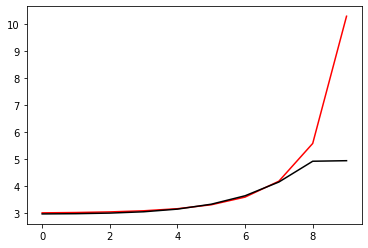

459800 0.015512594616114199
[3.02864012 3.04657697 3.08366011 3.14966384 3.26335609 3.45737324
 3.78549399 4.32926785 5.15405203 5.09690019]


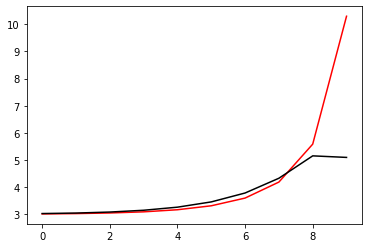

460900 0.02197477341933784
[2.91060537 2.92182363 2.95280447 3.01028707 3.10764078 3.27086833
 3.54993233 4.03737033 4.82437539 4.79865452]


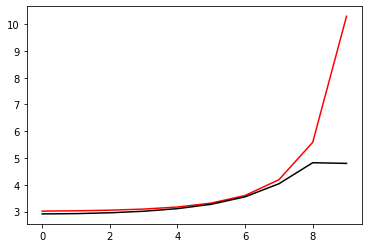

462000 0.03987538432757158
[2.902637   2.89670763 2.91420464 2.96359823 3.06008838 3.23095385
 3.51948124 3.97728346 4.71701827 5.106609  ]


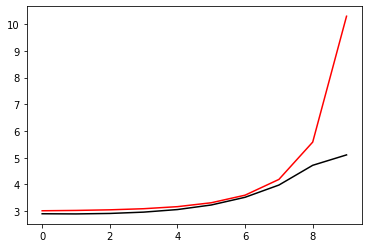

463100 0.04769640938153567
[2.93868559 2.94240027 2.95983472 3.00614782 3.09997609 3.2689914
 3.55775205 4.03318089 4.78858558 4.75985433]


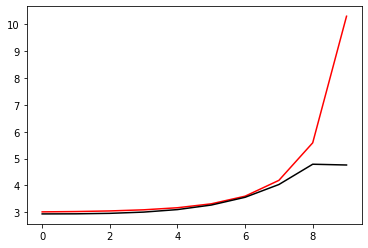

464200 0.03180016718974143
[2.98213004 2.99742751 3.03154387 3.09534172 3.20779096 3.40002165
 3.72326385 4.25904768 5.08719979 5.13500576]


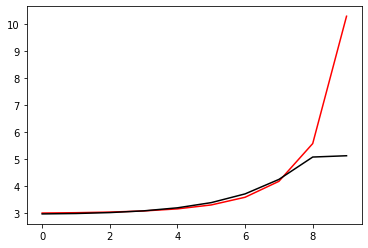

465300 0.0012516150565839456
[2.91531511 2.90223234 2.91294944 2.95593882 3.04487389 3.20439999
 3.47346275 3.90984089 4.60943104 4.63650376]


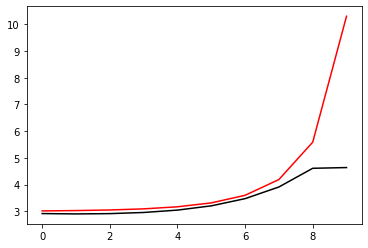

466400 0.03167889373794957
[3.01760828 3.01119945 3.01602551 3.05073549 3.1326428  3.28668472
 3.55317348 3.99482493 4.70015561 4.66946492]


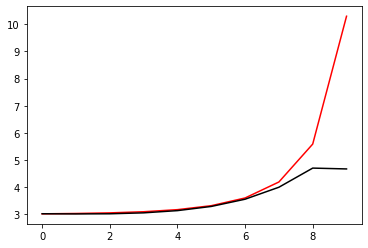

467500 0.021298005991346552
[3.06568379 3.0726898  3.09184182 3.13584383 3.22427681 3.38536837
 3.66306619 4.12732753 4.86046552 4.89326247]


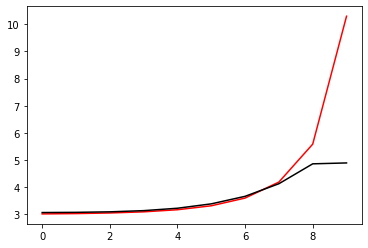

468600 0.05774267269412012
[3.01466575 3.02824265 3.06066179 3.11960042 3.22093859 3.39350424
 3.68619385 4.17848222 4.95163782 4.90411496]


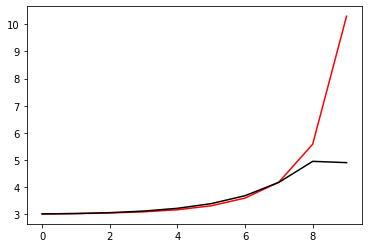

469700 0.02091430116970685
[2.96940765 2.98061846 3.00980765 3.06646053 3.16535914 3.3319299
 3.61196882 4.08637939 4.84756348 4.85809753]


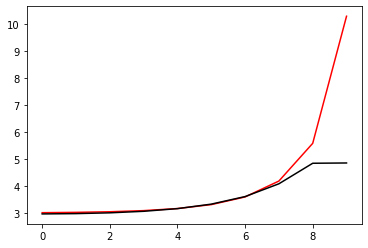

470800 0.015497840848881063
[3.02256372 3.04312945 3.08656046 3.16056612 3.28073683 3.47494928
 3.79223185 4.31578792 5.12844186 5.08382757]


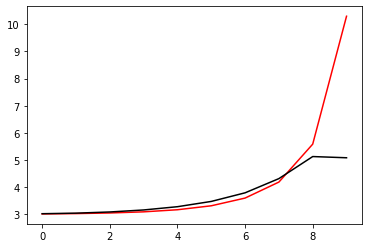

471900 0.024668778625976384
[2.86240283 2.88011956 2.92757143 3.01352392 3.15449422 3.38095982
 3.74697451 4.34119948 5.23910285 5.21005434]


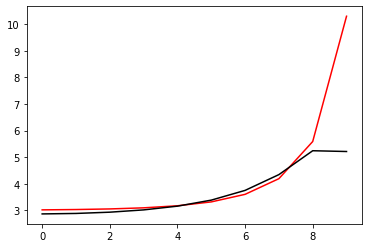

473000 0.031614801131530486
[2.92212604 2.92830018 2.95237312 3.00781657 3.11130651 3.28848706
 3.58403735 4.07707371 4.86478511 4.87445098]


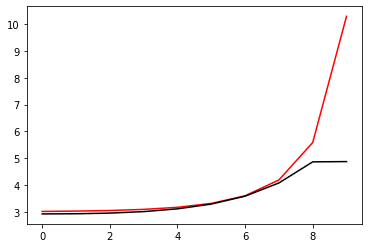

474100 0.03449042206990788
[3.0013064  3.01105185 3.04219097 3.10739305 3.22532034 3.42715531
 3.76584049 4.32885487 5.19972767 5.12783392]


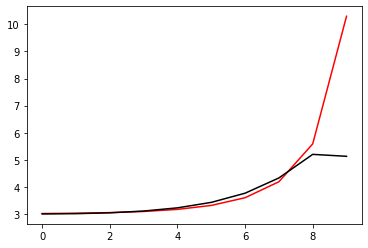

475200 0.031860605366815245
[2.98004631 2.99520345 3.03081595 3.09750151 3.2132578  3.40760427
 3.73121914 4.27230543 5.13078839 5.23949093]


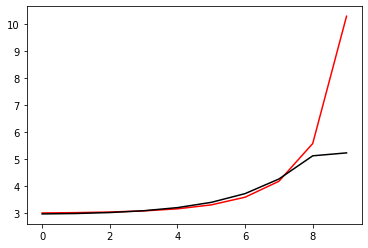

476300 0.0022788267662249635
[2.98018231 2.99907489 3.04176991 3.11866534 3.24865997 3.46411194
 3.82150618 4.41641306 5.33830402 5.38355456]


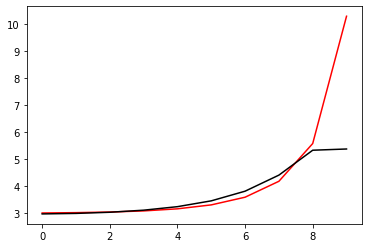

477400 0.044315280957504116
[2.93908474 2.92754003 2.93113795 2.96964704 3.06352555 3.24438238
 3.56292955 4.09773828 4.97359864 4.93711626]


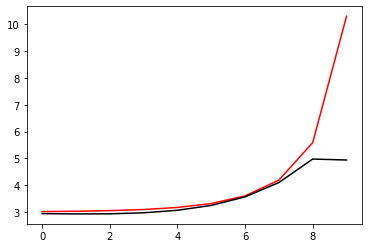

478500 0.021695925132270647
[3.04087509 3.04625604 3.06306279 3.10725238 3.20224114 3.38187402
 3.69989183 4.24432464 5.1220182  5.12904723]


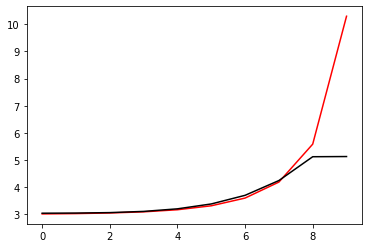

479600 0.07343295984469199
[3.07744513 3.09597314 3.13360228 3.20099435 3.3189926  3.52358422
 3.87573312 4.47563832 5.42282632 5.34088369]


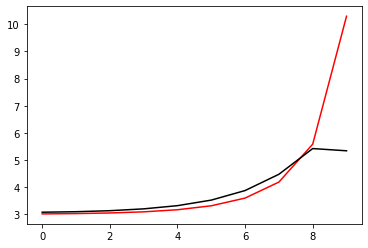

480700 0.019775091660208716
[2.90121238 2.92228353 2.96793197 3.0449376  3.1685666  3.36893607
 3.70199113 4.26527671 5.15814038 5.12742086]


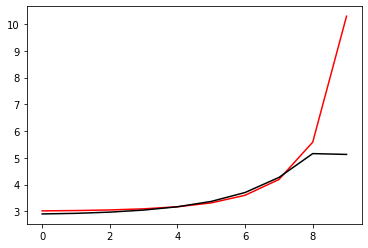

481800 0.015231895260151637
[2.9414663  2.96090775 3.0065401  3.08836338 3.2238924  3.44537173
 3.81176777 4.42299659 5.36408065 5.29443235]


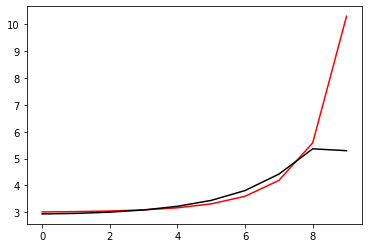

482900 0.023202092705876656
[2.91457445 2.92911496 2.96839532 3.0414496  3.164876   3.36725086
 3.69702742 4.23414581 5.06487539 5.14686652]


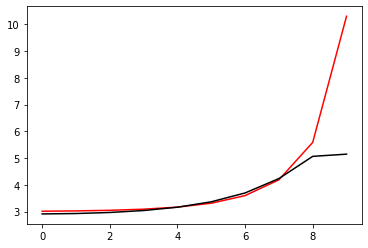

484000 0.032255756093235326
[2.9103441  2.92746745 2.96950105 3.04771748 3.18042625 3.39905114
 3.75859144 4.35045883 5.25305211 5.26987865]


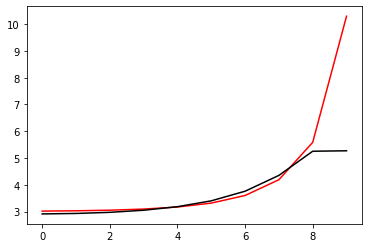

485100 0.03352347650512389
[2.98705992 3.00801964 3.05551607 3.14284863 3.29073028 3.53424804
 3.93377192 4.58603819 5.56373239 5.40501415]


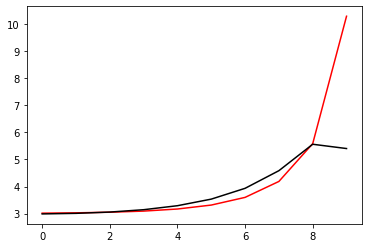

486200 0.03144806557203946
[3.05839388 3.04738847 3.05807411 3.10398369 3.20324793 3.38504512
 3.6926926  4.16459321 4.94718544 5.04889173]


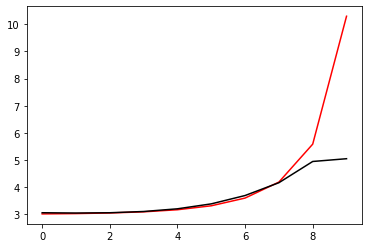

487300 0.0015697821936852575
[3.0046095  3.01076119 3.03167907 3.08278473 3.18522707 3.36946523
 3.68162958 4.18586826 4.99086869 5.00513003]


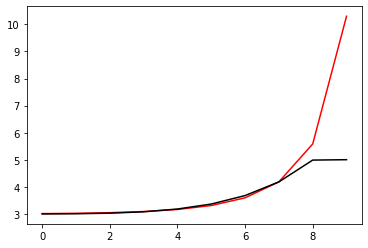

488400 0.021893048109979368
[3.02148252 3.03944664 3.0782589  3.14637719 3.26103417 3.45225042
 3.77029946 4.29644751 5.11959774 5.10399603]


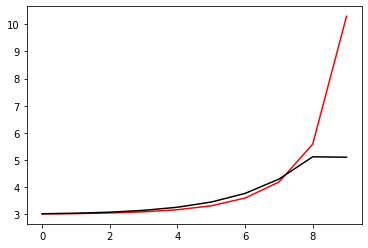

489500 0.03230210713096394
[2.92786857 2.91144608 2.91404222 2.95116493 3.03903524 3.20323591
 3.48212647 3.92812596 4.64105194 4.63303699]


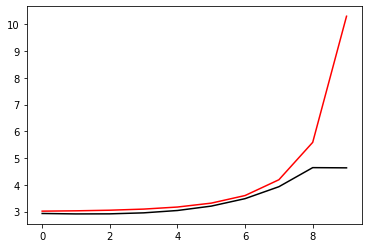

490600 0.05434514598508228
[3.0278935  3.02128573 3.02366003 3.05598273 3.13907939 3.30006216
 3.57968065 4.03759757 4.76315653 4.75239297]


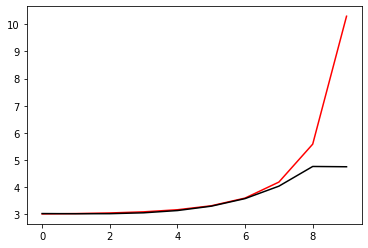

491700 0.02072770237855133
[2.95933246 2.97061426 2.99443375 3.04421456 3.1417707  3.31880427
 3.62274087 4.12517355 4.90797324 4.93420704]


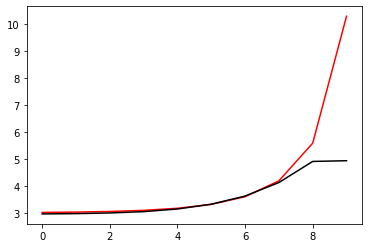

492800 0.01549196514571935
[3.03870785 3.05426105 3.08917409 3.1533341  3.26519109 3.4568373
 3.78186761 4.32471117 5.16485428 5.10878182]


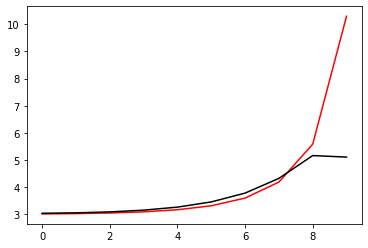

493900 0.022649328733308098
[2.88026296 2.89771762 2.9413673  3.02103356 3.1536987  3.37079915
 3.72867716 4.3207869  5.23053281 5.24980348]


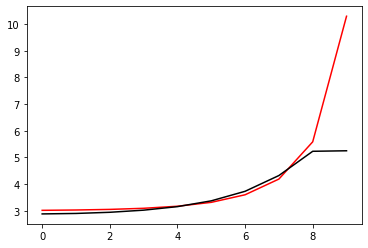

495000 0.030844738744518638
[2.9644102  2.97520979 3.00779573 3.07770899 3.20532471 3.42358259
 3.79027453 4.40644455 5.36752563 5.38031196]


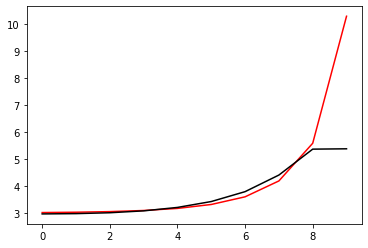

496100 0.0669897481392004
[2.79967663 2.82580184 2.87338551 2.95737067 3.10114442 3.3411802
 3.74251876 4.41572851 5.45783464 5.51394561]


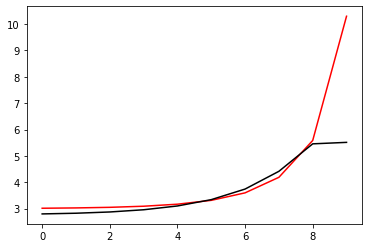

497200 0.07618268057619335
[2.76206585 2.78061938 2.82245116 2.90239209 3.04303341 3.27955389
 3.67258291 4.33573547 5.41298115 5.47294918]


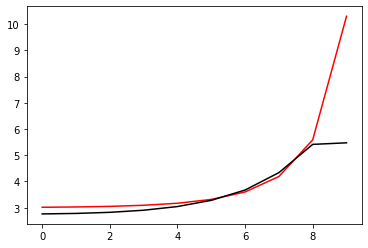

498300 0.0017974297638177863
[2.92822228 2.94335853 2.98003686 3.04711062 3.16036406 3.34727685
 3.6577907  4.18585188 5.06274794 5.08110114]


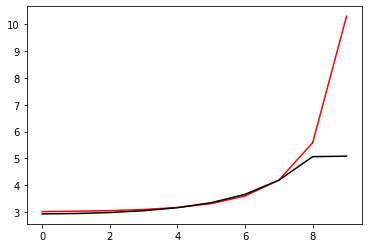

499400 0.021955236697158306
[3.02980874 3.04213584 3.07442948 3.13883244 3.25327018 3.44732505
 3.77396819 4.32958318 5.23033568 5.24745975]


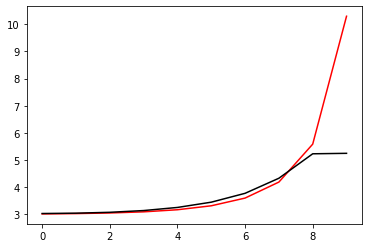

In [12]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

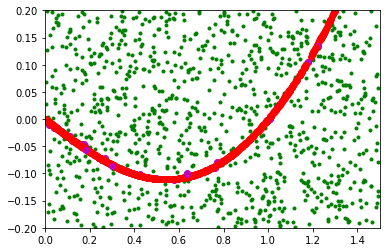

In [14]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()